## Downloading required libraries

In [ ]:
# pip install imbalanced-learn # used to install imbalanced learn
# pip install xgboost # to install xgboost_model

# Make sure the version of anaconda is the latest 

In [ ]:
import sklearn  # importing sklearn
print(sklearn.__version__)  # printing sklearn version

### Importing the relevent libraries

In [ ]:
import numpy as np  # Allows us to work with arrays.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt  # Allows working with plots.
from mpl_toolkits import mplot3d  # plotting 3d plots

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.
from sklearn.model_selection import train_test_split  # Splits dataset into test set and traning set. 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer  # Perform the feature scaling.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, multilabel_confusion_matrix  # creates a 
                                                                            # confusion matrix  # creates a confusion matrix
from sklearn.metrics import accuracy_score  # Returns accury score of a model.
from collections import Counter  # Allows the counting the items in an iterable list.

from sklearn.linear_model import LogisticRegression  # Performs logistic regression.
from sklearn.neighbors import KNeighborsClassifier  # applies  K Neariesst Neighobour.
from sklearn.neural_network import MLPClassifier  # applies Multilayer Perceptrons neural network
from sklearn.impute import KNNImputer  # imputes missing values using KNN.
from sklearn.svm import SVC  # applies svm
from sklearn.naive_bayes import GaussianNB  # applies  naive_bayes gaussianNB.
from sklearn.tree import DecisionTreeClassifier  # applies  decision tree classification model.
from sklearn.ensemble import RandomForestClassifier  # applies random forest classification.
from xgboost import XGBClassifier  # applies  xgboost classification. gradiant decision trees.
from sklearn.decomposition import PCA  # applies PCA


from sklearn.model_selection import cross_val_score  # performs cross validation. Helps in model selection.
from sklearn.model_selection import GridSearchCV  # helps select the best hyper parameters
from imblearn.over_sampling import RandomOverSampler  # Uses over sampling techniques to Sample the data correctly.
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score 
                                                                                 # Allows the usage of a classification report
from sklearn.metrics import precision_recall_fscore_support  # gives precison, recall, f1 score, and support
from sklearn.model_selection import RandomizedSearchCV  # performs randomized search cv

import warnings  # allows to ignore warnings
warnings.filterwarnings("ignore")  # ignores warnings

#%matplotlib inline  # helps in showing plots on the browser.

### Importing the dataframe

In [ ]:
sucidedataframe = pd.read_csv("suicidedataextrafestures.csv")  # opens csv files and assighns them to a variable.

### Checking the data from the dataframe before pre-processing

In [ ]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

## 1. Data pre-processing

In [ ]:
# Below relevent data is selected that will be used in this project.
sucidedataframe = sucidedataframe[["country", "age" ,"sex", "population",  \
"Individuals using the Internet (% of population)", "Labor force, total", \
"Mobile cellular subscriptions (per 100 people)", "GDPpyear","GDPpcapital","Expense (% of GDP)",\
"Physicians (per 1,000 people)","Refugee population by country or territory of origin" ,"suicidesper100k"]]## 1. Data 
                                                                                                          # pre-processing

In [ ]:
sucidedataframe.head(5)  # out puts data from dataframe

In [ ]:
# Below the col names are renamed.
sucidedataframe = sucidedataframe.set_axis(["Country", "Age", "Gender", "Population", \
"Internet_Usage_per_percent_Population", "Total_Labour_force", "Cellular_subscriptions_per_100_people", \
"GDPpyear","GDPpcapital","Expense_percent_of_GDP)",\
"Physicians_per_1,000_people)","Refugee_population_by_country_or_territory_of_origin" ,"Suicidesper100k"],axis=1)

In [ ]:
sucidedataframe.columns  # The columns of the dataframe are viewed.

In [ ]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

### Dealing with null values

In [ ]:
sns.heatmap(sucidedataframe.isnull())  # shows null values

In [ ]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

In [ ]:
sucidedataframe.info()  # checking basic information on dataframe

In [ ]:
#df['Internet_Usage_per_percent_Population'] = df['DataFrame Column'].fillna(mean(column))

In [ ]:
print(len(sucidedataframe.Internet_Usage_per_percent_Population))  # printing lenghth of the column.

In [ ]:
print(len(sucidedataframe.Refugee_population_by_country_or_territory_of_origin))  # printing lenghth of the column.

In [ ]:
print(len(sucidedataframe["Expense_percent_of_GDP)"]))  # printing lenghth of the column.

In [ ]:
print(len(sucidedataframe["Physicians_per_1,000_people)"]))  # printing lenghth of the column.

#  Function to replace missing values Using KNN

In [ ]:
def missng_values_filler_knn(missingdataframevalue,colname):  # function replaces missing values using KNN's. function 
                                                              # name specified and paramaters given
    columntobereplaced = missingdataframevalue.to_numpy()   # The column to be replaced is stored in a variable.

    imputer = KNNImputer(n_neighbors=10, weights="uniform")  # creating instance of the object.
    replaced = imputer.fit_transform(columntobereplaced)  # fitting the model and replaing missing values
                                                                       
    print(len(replaced))  # printing replaced lenght
    dataframe=pd.DataFrame(replaced, columns=colname)  # adding replaced values in a dataframe column and giving the column a 
                                                      # name.
    print("null values ", dataframe.isnull().sum()) # Checking the dataframe for null values.
    print(dataframe.head(5))  # printing head of new data frame
    return dataframe  # returning the dataframe

# Replacing missing values

In [ ]:
sucidedataframe[["Internet_Usage_per_percent_Population"]] = \
missng_values_filler_knn(sucidedataframe[["Internet_Usage_per_percent_Population"]], ["Internet_Usage_per_percent_Population"])

In [ ]:
# replacing null values using KNN function
sucidedataframe[["Expense_percent_of_GDP)"]] = \
missng_values_filler_knn(sucidedataframe[["Expense_percent_of_GDP)"]], ["Expense_percent_of_GDP)"])

In [ ]:
# replacing null values using KNN function
sucidedataframe[["Refugee_population_by_country_or_territory_of_origin"]] = \
missng_values_filler_knn(sucidedataframe[["Refugee_population_by_country_or_territory_of_origin"]],\
                         ["Refugee_population_by_country_or_territory_of_origin"])

In [ ]:
# replacing null values using KNN function
sucidedataframe[["Physicians_per_1,000_people)"]] = \
missng_values_filler_knn(sucidedataframe[["Physicians_per_1,000_people)"]],["Physicians_per_1,000_people)"])

In [ ]:
sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

In [ ]:
sucidedataframe = sucidedataframe.dropna() # droping all rows with at least one null values.

In [ ]:
# sucidedataframe.isnull().sum()  # Checking the dataframe for null values.

In [ ]:
sucidedataframe.shape  # The Entries and the columns of the dataframe are viewed.

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

# Reseting index

In [ ]:
sucidedataframe.reset_index(drop=True, inplace=True)  # reseting index.

### Looking at outliers.

In [ ]:
def outliers_check(fig,columnnametocheck):   # function with parameters given.
    """ 
    The outlier_check fuction plots outliers for the sucidedataframe.
    
    The first parameter fig takes a number as argument which is the number of the figure bening plotted.
    
    
    The second parameter columnnametocheck takes a column anme from sucidedataframe to plot its outliers.

    """
    plt.figure(fig)  # number of the figure being plotted.
    plt.title("Outliers",fontsize=18)  # Displays plot title
    plt.boxplot(sucidedataframe[[columnnametocheck]])  # Displays description of the plots x and y labels.
    plt.xlabel(columnnametocheck)  # Displays the x axis for the plot
    plt.ylabel(columnnametocheck)  # Displays the y axis for the plot.
    plt.grid()  # adds a gird to the plot

In [ ]:
plot_values_list = ["Population","Internet_Usage_per_percent_Population", "Total_Labour_force",\
"Cellular_subscriptions_per_100_people" , "GDPpyear", "GDPpcapital", "Expense_percent_of_GDP)", "Physicians_per_1,000_people)",\
                     "Refugee_population_by_country_or_territory_of_origin",  "Suicidesper100k"] # a list of column names in 
                                                                                         # sucidedataframe to use for plotting.
for i in range(len(plot_values_list)):  # looping in a range of the length of plot_values_list.
    outliers_check(i+1,plot_values_list[i])  # Arguemnts given to the function.

In [ ]:
 def relationageandgender(fig,columnnametocheck):  # function with parameters given.
        
    """ 
    
     The relationageandgender plots the relationship between a given column from the sucidedatafame with the 
     Age and Gender column form the same dataframe.
    
    The first parameter fig takes a number as argument which is the number of the figure bening plotted.
    
    
    The second parameter columnnametocheck takes a column name from sucidedataframe to check its relationship with the 
    Age and Gender column form the same dataframe.

    """

    print("plot in respect to ", columnnametocheck)  # printing the name of column to be plotted.
    plt.figure(fig)  # number of the figure being plotted.
    plt.style.use('seaborn-white')  # style to use for seaborn.
    sns.catplot(x='Gender', y=columnnametocheck, col="Age", col_wrap=3, sharey=True, \
                data=sucidedataframe, alpha=0.5, palette = 'hot')  # plots gender and Age in relationship with columnnametocheck.
    plt.xticks(rotation = 90)  # rotates plot to 90 degree
    plt.show()  # shows plot.

In [ ]:
for i in range(len(plot_values_list)):  # looping in a range of the length of plot_values_list.
    relationageandgender(i+1,plot_values_list[i])  # Arguemnts given to the function.

In [ ]:
def relationsucide100kwithage(fig,columnnametocheck):  # function with parameters given.
    
    """ 
    The relationsucide100kwithage plots the relationship between a given column from the sucidedatafame with the 
    Suicidesper100k, Gender and Age column form the same dataframe.
    
    The first parameter fig takes a number as argument which is the number of the figure bening plotted.
    
    
    The second parameter columnnametocheck takes a column name from sucidedataframe to check its relationship with the 
    Suicidesper100k, Gender and Age column form the same dataframe.

    """
    
    
    plt.figure(fig)   # number of the figure being plotted.
    My_plot_object = sns.FacetGrid(sucidedataframe , row = 'Gender',col = 'Age',margin_titles=True)
    My_plot_object.map(plt.scatter,"Suicidesper100k",columnnametocheck,edgecolor = 'w')  # plots "Suicidesper100k"  column in 
                                                             # relation to columnnametocheck from sucidedataframe.
    plt.show()  # shows plot.

In [ ]:
for i in range(len(plot_values_list)-1):  # looping in a range of the length of plot_values_list.
    relationsucide100kwithage(i+1,plot_values_list[i])   # Arguemnts given to the function.

# Function to perform OneHotEncoding

In [ ]:
def encodingoh(required_column,dropped_column,column_rename):  # function to perform the one hot encoding with parameters given.
    
    """
    encodingoh fuction perfoms OneHotEncoding on a given dataset column.
    
    The first parameter required_column is the column to be OneHotEncoded.
    
    The second parameter dropped_column checks if the is a column to be dropped when OneHotEncoding.
    for example the arguemnt None drops no columns.
                the argement "first" drops the fist column when OneHotEncoding.
                
    The Third parameter column_rename is the new names of the colums after OneHotEncoding
    
    The encodingoh function returns a one hot encoded dataframe.
    
    """
    
    oh = OneHotEncoder(drop=dropped_column,dtype=np.int)  # creates the instace of the object.
    newdf = required_column  # creates a new data frame from the column to be one hot encoded
    newdf = oh.fit_transform(newdf).toarray()  # one hot enocdes the new dataframe as a array
    newdf = pd.DataFrame(newdf)  # converts the newly created array to a dataframe.
    newdf.columns = column_rename  # renames the newly encoded column
    print(newdf.head(5))  # outputs the head of the dataframe.
    return newdf  # returns the one hot encoded data frame

### One Hot Encoding

In [ ]:
sucidedataframe.nunique()  # outputs unique values in each column in a data frame.

In [ ]:
sucidedataframe.duplicated().sum()  # gives the sum of duplicate dvalues

In [ ]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

In [ ]:
print(sucidedataframe.pivot_table(columns=['Country'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

In [ ]:
sucidedataframe.head(1)  # outputs the head of the dataframe

In [ ]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # counts duplicates in the selected dataframe column.

In [ ]:
sucidedataframe.index = pd.RangeIndex(len(sucidedataframe.index))  # outputs indext of the data frame

In [ ]:
sucidedataframe.head()

### One Hot Encoding

In [ ]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))  # prints the unique values of the column.

In [ ]:
print(sucidedataframe.pivot_table(columns=['Age'], aggfunc='size'))  # prints the unique values of the column.

In [ ]:
#  one hot enocdes the column using the created function.
age = encodingoh(sucidedataframe[["Age"]], None, ['15-24 years',"25-34 years", "35-54 years", \
                                                  "5-14 years", "55-74 years", "75+ years"])

In [ ]:
#  one hot enocdes the column using the created function.
gender = encodingoh(sucidedataframe[["Gender"]], "first", ["Gender"])

In [ ]:
sucidedataframe = sucidedataframe.drop('Age', 1)  # column is dropped

In [ ]:
sucidedataframe = sucidedataframe.drop('Gender', 1)   # column is dropped

In [ ]:
sucidedataframe.head(5)  # dataframe head is printed.

In [ ]:
sucidedataframe = pd.concat([ gender,sucidedataframe],axis=1)  # column is concatanated to dataframe
sucidedataframe.head()  # fisrt elements of the dataframe are outptted

In [ ]:
sucidedataframe = pd.concat([age,sucidedataframe],axis=1)  # column is concatanated to dataframe
sucidedataframe  # fisrt elements of the dataframe are outptted

In [ ]:
print(sucidedataframe.pivot_table(columns=['Gender'], aggfunc='size'))   # prints the unique values of the column.

In [ ]:
print(sucidedataframe.pivot_table(columns=['15-24 years'], aggfunc='size'))  # counts duplicates in the selected 
                                                                             # dataframe column.

In [ ]:
print(sucidedataframe.pivot_table(columns=["25-34 years"], aggfunc='size'))  # counts duplicates in the selected 
                                                                             # dataframe column.

In [ ]:
print(sucidedataframe.pivot_table(columns=["35-54 years"], aggfunc='size'))  # counts duplicates in the 
                                                                        # selected dataframe column.

In [ ]:
print(sucidedataframe.pivot_table(columns=["5-14 years"], aggfunc='size'))  # counts duplicates in the
                                                                            # selected dataframe column.

In [ ]:
print(sucidedataframe.pivot_table(columns=["55-74 years"], aggfunc='size'))  # counts duplicates in the 
                                                                            # selected dataframe column.

In [ ]:
print(sucidedataframe.pivot_table(columns=["75+ years"], aggfunc='size'))  # counts duplicates in the 
                                                                        # selected dataframe column.

In [ ]:
sucidedataframe.head()  # the first elements of the data frame are outputted

In [ ]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. 

# Checking and selecting higly correlated features

In [ ]:
plt.figure(figsize = (15,10))  # sets the size of the matrix
correlation_matrix = sucidedataframe.corr().round(2)  # creates the correlation matrix
sns.heatmap(data = correlation_matrix, annot = True)  # shows correlation matrix

In [ ]:
Features_after_corelation_matrix = sucidedataframe[[ "Gender", "5-14 years", "15-24 years", "75+ years"]]  # higher correlated 
                                                                                                       # features are selected

In [ ]:
Features_after_corelation_matrix.head()  # first elements of the dataframe are outputted.

In [ ]:
# count duplicates function learned from: https://datatofish.com/count-duplicates-pandas/
sucidedataframe.pivot_table(columns=['Country'], aggfunc='size')  # counts duplicates in the selected dataframe column.

In [ ]:
each_country = np.unique(sucidedataframe[["Country"]].values) # unique country rows are selected.
each_country  # array is outputted

In [ ]:
Country = encodingoh(sucidedataframe[["Country"]], None, each_country)  # each country is one hot encoded at a time.2

In [ ]:
sucidedataframe = pd.concat([Country,sucidedataframe],axis=1)  # each new country is concatanated to original data frame.
sucidedataframe.head() # first elements of the data frame are out putted

In [ ]:
Features_after_corelation_matrix = pd.concat([Country,Features_after_corelation_matrix],axis=1)  # each new country is 
                                                                     # concatanated to highly correlate data frame.
Features_after_corelation_matrix.head()   # first elements of the data frame are out putted

In [ ]:
print(sucidedataframe.columns)  # columns of the data frame are printed

In [ ]:
sucidedataframe = sucidedataframe.drop('Country', 1)  # country column is dropped.

In [ ]:
print(sucidedataframe.columns)  # columns of the data frame are printed

# Making lables

In [ ]:
sucidedataframe.describe().round()  # Shows the count, mean, std, min, 25%, 50%, 75% and 
                                    # max of a datframe. 

#  Selecting the values for the labels

In [ ]:
print("max :   ", 178 )  # prints the given input.
print("high :  ", round(178 / 2))  # prints the given input.
print("medium :", round(89 / 2))  # prints the given input.
print("low :   ", round(44 / 2))  # prints the given input.
print("min :   ", round(22 / 2))  # prints the given input.

# Coverting the values to catagories

In [ ]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] < 11), "Suicidesper100k"] = 1 # Encoding values below 11 as 1.

In [ ]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 11) & (sucidedataframe["Suicidesper100k"] < 22),\
                    "Suicidesper100k"] = 2  
# Encoding values aboveor equal to 11 as and below 22 to 2.

In [ ]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 22) & (sucidedataframe["Suicidesper100k"] < 44),\
                    "Suicidesper100k"] = 3 
# Encoding values equal to and above 22 and below 44 to 3.

In [ ]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 44) & (sucidedataframe["Suicidesper100k"] < 89),\
                    "Suicidesper100k"] = 4  
# Encoding values above or equal to 44 as and below 89 to 4.

In [ ]:
sucidedataframe.loc[(sucidedataframe["Suicidesper100k"] >= 89) & (sucidedataframe["Suicidesper100k"] <= 178), \
                    "Suicidesper100k"] = 5 
# Encoding values above or equal to 89 as and below 178 to 4.

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

# Label Encoding

In [ ]:
le = LabelEncoder()  # creating the instance of the object.
sucidedataframe.Suicidesper100k = le.fit_transform(sucidedataframe.Suicidesper100k)  # label encoing the require dcolumn.

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

In [ ]:
print(sucidedataframe.pivot_table(columns=['Suicidesper100k'], aggfunc='size'))  # counts duplicates in the selected 
                                                                                # dataframe column.

In [ ]:
9264 + 2850 + 2177 + 678 + 141  # calculation

In [ ]:
sucidedataframe.head()  # outputting dataframe head.

In [ ]:
one = str(round(100 * (9264/15110),2)) + "%"   # percentage of the value is checked from label column.
two  = str(round(100 * (2850/15110),2)) + "%"  # percentage of the value is checked from label column.
three = str(round(100 * (2177/15110),2)) + "%"  # percentage of the value is checked from label column.
four = str(round(100 * (678/15110),2)) + "%"  # percentage of the value is checked from label column.
five = str(round(100 * (141/15110),2)) + "%"  # percentage of the value is checked from label column.

In [ ]:
print("1 is represented ", one, "\n2 is represented ", two, "\n3 is represented ", three, "\n4 is represented ", four, "\n5 is represented ", five)
# percentage of the value is printed of label column.

In [ ]:
plt.bar([1,2,3,4,5],[9262, 2850, 2177, 678, 141])  # bar chart is outputted to show the difference in values.

In [ ]:
sucidedataframe.head()  # dataframe head is outputted.

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

### selecting X and Y values 

In [ ]:
sucidedataframe.head(1)  # the fisrt elements of the data frame are outputted

In [ ]:
Features_after_corelation_matrix.head(1)  # the fisrt elements of the data frame are outputted

In [ ]:
X = sucidedataframe.iloc[:, :-1].values  # selecting the values for the X variable.

In [ ]:
X2 = Features_after_corelation_matrix.iloc[:, :].values # selecting the 
                                                                                        # values for the X2 variable.

In [ ]:
y = sucidedataframe.iloc[:, -1].values # selecting the values for the Y variable. # done using .to_numpy and not 
                                                       # .iloc as .to_numpy creates a horizontal bar while .iloc creates a 
                                                       # horizontal bar which will not alighn with the x values.

In [ ]:
print("X ", X, "\n", "X2 " , X2 , "\n", "y ", y)  # priting arrays

# Function to check principal Components

In [ ]:
def pcafuntion(X,pcomponents ,pcolumns, y_value, y_var, plot_labels):  # A function to perfrom PCA with paramenters given.
    
    
    """
    
    The pcafunction gives the principal components of a given datafame with respect to the selected label.
    It also plots a 2d and 3d PCA plot if the number of pca are 2 or 3 respectively.
    
    The first parameters X is the columns from a dataframe as a array to be converted to principal components.
    
    The second parameter pcomponents is the name of the principal componets that are to be added as a list.
    For example ['principal component 1','principal component 2'].
    
    The third parameter y_value is the column from the dataframe to be used as the y variable.
    For example df[["y_var"]]
    
    The fourth parameter y_var is the name of the y column for the dataframe.
    
    The fifth parameter plot_labels is the legends for the plot.
    
    The pcafunction function returns the given dataframes required principal comonents concanated with the 
    y label as a dataframe.
    
    """
    
    
    # Normalizing data before applying pca
    sc = StandardScaler()  # creating an instance of the object.
    X = sc.fit_transform(X)   # selecting vaues to perfom transformation on  

    pca = PCA(n_components=pcomponents)  # selecting number of principal components
    principalComponents = pca.fit_transform(X)  #  # selecting values to perfom transformation on  
    principalDf = pd.DataFrame(data = principalComponents  # creating a new dataframe with principal components.
                 , columns =pcolumns)
    finalDf = pd.concat([principalDf, y_value], axis = 1)  # concnating principal componenets with Class.
    print(finalDf)  # looking at the out put from pca.
    print("\n",pca.explained_variance_ratio_)# shows how much information is reatined from the pca

    missing = 0  # setting variable to 0.
    for i in range(len(pca.explained_variance_ratio_)):  # for looping in length of the array pca.explained_variance_ratio_
        missing = missing  + pca.explained_variance_ratio_[i]  # adding pca.explained_variance_ratio_[i] 
                                                              # varables values to missing variable
    print("Total values :  ", missing, "%")  # total data left 
    missing = 1 - missing  # subtracting missing variables value from 1.
    print("missing values :", missing, "%")  # total data lost
    
    
    
    if pcomponents == 2:  # checks the number of principal components.
        plot = sns.relplot(
            x='principal component 1',   # selecting first princal component.
            y='principal component 2',   # selecting second princal component.
            hue=y_var, # sets hue to the y variable.
            data=finalDf, # selects where to get data from.
            facet_kws={'legend_out': False}  # helps in selecting a custom legend.
        )  # plots a scatter plot of principal components.

        plt.title('Dataset with pca')  # Title of the plot
        # check axes and find which is have legend
        leg = plot.axes.flat[0].get_legend()
        new_title =y_var  # Legend title.
        leg.set_title(new_title)  # setting title to legend.
        leg.get_frame().set_alpha(255) # setting transparency level for legend box
        labels = plot_labels  # label list for legend
        for t, l in zip(plot._legend.texts, labels):  # looping through a touple.
            t.set_text(l)  # adding label to list
    
    elif pcomponents == 3:  # checks the number of principal components.
        
        fig = plt.figure(figsize=(15,10))  # setting plot size
        ax = plt.axes(projection='3d')  # specifying that it is a 3d plot.
        plt.title('Dataset with pca', fontsize=20)  # adding a title to the plot
        # Data for three-dimensional scattered points
        xdata = finalDf['principal component 1']  # selecting first princal component.
        ydata = finalDf['principal component 2']  # selecting second princal component.
        zdata = finalDf['principal component 3']  # selecting third princal component.
        ax.scatter3D(xdata, ydata, zdata, c=y_value)  # plotting princhpla components

        ax.set_xlabel("First Principal Component",fontsize=15)  # setting label for first principal componenet.
        ax.set_ylabel("Second Principal Component",fontsize=15)  # setting label for second principal componenet.
        ax.set_zlabel("Third Principal Component",fontsize=15)  # setting label for third principal componenet.

        plt.show()  # making plot visible.
        
    return finalDf  # returning finalDf


# Principal component analysis

## Using continues variables 

In [ ]:
X_pca = sucidedataframe.iloc[:, 55:].values

In [ ]:
pcafuntion(X_pca,2 ,['principal component 1','principal component 2'], sucidedataframe[["Suicidesper100k"]], \
           "Suicidesper100k", [1,2,3,4,5])

In [ ]:
pcafuntion(X_pca,3 ,['principal component 1','principal component 2', 'principal component 3'], \
           sucidedataframe[["Suicidesper100k"]], "Suicidesper100k", [1,2,3,4,5])

In [ ]:
pcom = "principal component "
plist = ['principal component 1','principal component 2', 'principal component 3']
for i in range(4,10):
    plist.append(pcom + str(i))
    print("Number of Components ", i)
    pcafuntion(X_pca,i ,plist, sucidedataframe[["Suicidesper100k"]], "Suicidesper100k", [1,2,3,4,5])
    print("\n\n")

## Over-sampling

In [ ]:
print('Original dataset shape %s' % Counter(y))  # original data set rows counted

In [ ]:
ros = RandomOverSampler(random_state=42)  # instance of object created.
X_over, y_over = ros.fit_resample(X, y)  # oversampling model fitting
print('Resampled dataset shape %s' % Counter(y_over))  # oversampled data set rows counted

## Spliting the datasets into a training and test set 

## Original x and y values.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [ ]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train is ",len(X_train), " and the length of y_train is ", len(y_train))  
print("The length of X_test is ",len(X_test), " and the length of y_test is ", len(y_test))

## Original x and y values after they have been over Sampled.

In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [ ]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X_train_over is ",len(X_train_over), " and the length of y_train_over is ", len(y_train_over))  
print("The length of X_test_over is ",len(X_test_over), " and the length of y_test_over is ", len(y_test_over))

## x2 and y2  values choosend by using the corelation matrix.

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.2, random_state = 1)
# test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                            # to get the best results.                                                           
# random_state = 1         # resetting the  random seed

In [ ]:
# print the lenghth of both test and train set to see if there equally split.
print("The length of X2_train is ",len(X2_train), " and the length of y2_train is ", len(y2_train))
print("The length of X2_test is ",len(X2_test), " and the length of y2_test is ", len(y2_test))

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

# Different models are evaluated.

# Function to evaluate different models

In [ ]:
def Classifier_function(model, X_train, y_train,X_test,y_test, title):  # function takes the name of the 
    
    
  """
    The Classifier_function Checks, predicted/actual results , checks testing and traning scores, 
    Checks Actual values classified correctly and wrongly Checks accuracy, precision, recall,  f1 
    scores and area under the curve.
    It plots a confusion matix with accuracy, precision, recall,  f1 scores given.
    
    The first parameter is model the model to evaluate.
    
    The secound parameter X_train is the variable contaning training datas features.
    
    The third parameter y_train is the variable contaning training datas label.
    
    The fourth parameter X_test is the variable contaning testing datas features.
    
    The fifth parameter y_test is the variable contaning testing datas label.
    
    The sixth parameter is the string which will be used as the title for the confusion matrix.
    
    The Classifier_function function returns the train_accuracy,test_accuracy , precision, recall,
    f1_score and Area_under_the_curve of a given model. 
    
  """
                                                               # model used, the x and y traning and testing sets.
  model.fit(X_train, y_train)  # Building the k-nearest neighbors classification model.


  y_test_p = model.predict(X_test)  # Predicted results.
  print("  results\npred-Actual")  # printing predicted and real values.
  print(np.concatenate((y_test_p.reshape(len(y_test_p),1),y_test.reshape(len(y_test),1)),1))  # Predicted results and 
                                                                                       #  real results in a np array.
   

  train_accuracy = round(model.score(X_train,y_train),2) * 100  # Getting traing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100
  test_accuracy = round(model.score(X_test,y_test),2) * 100  # Getting testing accuracy multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100

  print("Model train accuracy: ", train_accuracy, "%")  # printing the model accurcy. 
  print("Model test accuracy: ", test_accuracy, "%")  # printing the model accurcy. 


  print("\n\n")  # printing a new line.
  # getting Accuracy or recall or precision or specificity
  y_test_pred = model.predict(X_test)  # predicted results
  
  cReport = classification_report(y_test,y_test_pred)  # creating a Classification report
  print(cReport)  # creating a Classification report
  
  cm = confusion_matrix(y_test, y_test_p)  # creating the confusion matrix
  cm2 = multilabel_confusion_matrix(y_test, y_test_pred)  # creating a mutable confusion matrix


  precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_test_pred)  # getting the precision,
                                                                                          # recall and f1score for later use.
  accuracy  = round(np.trace(cm) / float(np.sum(cm)), 2) * 100  # getting aaccuracy and multipling it by 100 after 
                                                                # rounding it by 2 to get a score between 0 to 100.
  precision = round(np.mean(precision),2) * 100  # multipling precision variables mean by 100 after rounding it by
                                                #  2 to get a score between 0 to 100.
  recall = round(np.mean(recall),2) * 100  # multipling recall variables mean by 100 after rounding it by 2 to 
                                           # get a score between 0 to 100.
  f1_score = round(np.mean(f1_score),2) * 100  # multipling f1_score variables mean by 100 after rounding 
                                               # it by 2 to get a score between 0 to 100.

  lable_list = []  # creating a empty list

  for i in range(len(cm)):  # looping in the range of the length of the confusion matrix.
    for j in range(len(cm)):  # looping in the range of the length of the confusion matrix.
        if j == i:  # if the value of j is equal to the value of i.
            # the below code appends the Actual Values Classified correctly to the variable lable_list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) +"\n" + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

        else:   # otherwise
            #  the below function appends the actual values classified wrongly to the variable lable list.
            lable_list.append("Actual "+ str(i) +"\n" + "calssified as "+ str(j) + "\n"  + str(cm[i][j]) + "\n"+ \
                              str(round(cm[i][j]/np.sum(cm),2)) + " %")

            
  lable_list = np.asarray(lable_list).reshape(len(cm),len(cm))  # resahping the label list as a numpy array to be 
                                                                # used in plotting the confusion matrix
  
  #  the variable function will be will be used to display the results of the evaluation to the confusion matrix.
  total_score = ("Accuracy:   " + str(accuracy) +" %" + "\nPrecison:    "  + str(precision)  +" %" + "\nRecall:        " +\
                 str(recall)  +" %" + "\nF1 score:    "  + str(f1_score) +" %") 


  # Below is the code used to plot the confusion matrix.
  plt.figure(figsize = (12,9))  # sets the size of the matrix
  disp = sns.heatmap(cm, annot=lable_list, fmt='', cmap='Blues')  # displays the results of the actual values 
                                                                 #  classified wrongly and correctly.                       
  disp.plot()  # displaying data in plot
  plt.title(title, fontsize=25)  # adding a title to plot
  plt.ylabel('True label', fontsize=20)  # adding a y axis to the plot.
  plt.xlabel('Predicted label' +"\n\nScores\n" +total_score, fontsize=20)  # adding a x axis to the plot
  plt.show()  # showing the plot


    
  y_pred_proba = model.predict_proba(X_test) 
  Area_under_the_curve = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
  print("Area under the curve: ", Area_under_the_curve)   
  result_list = train_accuracy,test_accuracy , precision, recall, f1_score,Area_under_the_curve  # returning the results


  

  return result_list  # returns the results from the model.

# Feature Scaling and testing function

In [ ]:
def featurescaling(Scaler, X_train, X_test, y_train, y_test, Modelandprams ,Modelname):
    
    """
    The featurescaling fundtion feature scales given features and then Checks, predicted/actual results , checks testing and traning scores, 
    Checks Actual values classified correctly and wrongly Checks accuracy, precision, recall,  f1 
    scores and area under the curve.
    It plots a confusion matix with accuracy, precision, recall,  f1 scores given.
    
    The first parameter is typpe of scaling technique to use.
    
    The secound parameter X_train is the variable contaning training datas features.
    
    The third parameter y_train is the variable contaning training datas label.
    
    The fourth parameter X_test is the variable contaning testing datas features.
    
    The fifth parameter y_test is the variable contaning testing datas label.
    
    The sixth parameter is parameter is model the model to evaluate.
    
    The seventh parameter is the string which will be used as the title for the confusion matrix.
    
    The featurescaling function returns the train_accuracy,test_accuracy , precision, recall,
    f1_score and Area_under_the_curve of a given model after feature scaling. 
    
    
    """
    
    sucidedataframe.info()  # checking Basic information on the dataframe being procesed.
    
    sc = Scaler # creating an instance of the object.
    
    print("Before scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets before feature scaling.

    X_train[:, 55:] = sc.fit_transform(X_train[:, 55:])  # Scaling x_train
    X_test[:,55:] = sc.transform(X_test[:, 55:])  # Scaling y_train
    
    print("After scaling:\nX_test ", X_test,"\n\nX_train ", X_train)  # printing the sets after feature scaling.
    print("\nThe result of the model")  
    train_accuracy,test_accuracy , precision, recall, f1_score, Area_under_the_curve =Classifier_function(Modelandprams ,\
                X_train, y_train,X_test, y_test, Modelname)  
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score
    return train_accuracy,test_accuracy , precision, recall, f1_score, Area_under_the_curve 
    
    

# Evaluating different models to choose which one to use

# Logistic Regression

# X and y un_edited

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(LogisticRegression(), X_train,y_train,X_test, y_test, "Logistic Regression")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,LogisticRegression() ,"Logistic Regression")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, LogisticRegression() ,"Logistic Regression")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,LogisticRegression() ,"Logistic Regression")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, LogisticRegression() ,"Logistic Regression")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(LogisticRegression(), X_train_over, y_train_over, X_test_over, y_test_over, "Logistic Regression")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train_over,X_test_over, y_train_over, y_test_over,LogisticRegression() ,\
               "Logistic Regression")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,LogisticRegression() ,\
               "Logistic Regression")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,LogisticRegression() ,\
               "Logistic Regression")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
logistic_train_accuracy,logistic_test_accuracy , logistic_precision, logistic_recall, \
logistic_f1_score, logistic_Area_under_the_curve = featurescaling(Normalizer(), X_train_over, X_test_over, \
                                       y_train_over, y_test_over,LogisticRegression() ,"Logistic Regression")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(LogisticRegression(), X2_train, y2_train,X2_test, y2_test, "Logistic Regression")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# KNN

# X and y un_edited

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(KNeighborsClassifier(), X_train, y_train,X_test, y_test, "KNN Model")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,KNeighborsClassifier() ,"KNN Model")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test,KNeighborsClassifier() ,"KNN Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,KNeighborsClassifier() ,"KNN Model")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, KNeighborsClassifier() ,"KNN Model")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(KNeighborsClassifier(), X_train_over, y_train_over, X_test_over, y_test_over, "KNN Model")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,KNeighborsClassifier() ,"KNN Model")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
KNN_train_accuracy,KNN_test_accuracy , KNN_precision, KNN_recall, KNN_f1_score, \
KNN_Area_under_the_curve = featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over,\
                                          y_test_over,KNeighborsClassifier() ,"KNN Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,KNeighborsClassifier() ,"KNN Model")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,KNeighborsClassifier() ,"KNN Model")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(KNeighborsClassifier(), X2_train, y2_train,X2_test, y2_test, "KNN Model")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Naive bayes 

# Better Usage in catagorical instances
# Fastest model
# won't be as effective as data is catagorical and continues

# X and y un_edited

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(GaussianNB(), X_train, y_train,X_test, y_test, "naive bayes")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,GaussianNB() ,"naive bayes")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, GaussianNB() ,"naive bayes")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,GaussianNB() ,"naive bayes")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, GaussianNB() ,"naive bayes")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(GaussianNB(), X_train_over, y_train_over, X_test_over, y_test_over,"naive bayes")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,GaussianNB() ,"naive bayes")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,GaussianNB() ,"naive bayes")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
naive_bayes_train_accuracy,naive_bayes_test_accuracy , naive_bayes_precision, naive_bayes_recall, naive_bayes_f1_score, \
naive_bayes_Area_under_the_curve = featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
                                                  GaussianNB() ,"naive bayes")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,GaussianNB() ,"naive bayes")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(GaussianNB(), X2_train, y2_train,X2_test, y2_test,"naive bayes")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# SVM

# Not to use takes a large time is costly

# Requires Large RAM

# X and y un_edited

In [ ]:
# Classifier_function(SVC(), X_train, y_train,X_test, y_test, "SVM"")  
# # Performs traing, testing prediction.
# # performs precision, recall, f1-score and support prediction
# # plots a confusion matrix
# # returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

In [ ]:
# Classifier_function(SVC(), X_train_over, y_train_over,X_test_over, y_test_over, "SVM")  
# # Performs traing, testing prediction.
# # performs precision, recall, f1-score and support prediction
# # plots a confusion matrix
# # returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

In [ ]:
# Classifier_function(SVC(), X2_train, y2_train,X2_test, y2_test, "SVM"")  
# # Performs traing, testing prediction.
# # performs precision, recall, f1-score and support prediction
# # plots a confusion matrix
# # returns the traing, testing, precision, recall, f1-score

# Neural networks mlp

# X and y un_edited

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(MLPClassifier(), X_train, y_train,X_test, y_test, "Neural Networks")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,MLPClassifier() ,"Neural Networks")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, MLPClassifier() ,"Neural Networks")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,MLPClassifier() ,"Neural Networks")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, MLPClassifier() ,"Neural Networks")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(MLPClassifier(), X_train_over, y_train_over, X_test_over, y_test_over, "Neural Networks")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
Neural_Networks_train_accuracy,Neural_Networks_test_accuracy , Neural_Networks_precision, Neural_Networks_recall,\
Neural_Networks_f1_score, Neural_Networks_Area_under_the_curve = featurescaling(StandardScaler(), X_train_over, X_test_over,\
     y_train_over, y_test_over,MLPClassifier() ,"Neural Networks")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,MLPClassifier() ,"Neural Networks")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,MLPClassifier() ,"Neural Networks")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,MLPClassifier() ,"Neural Networks")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(MLPClassifier(), X2_train, y2_train,X2_test, y2_test, "Neural Networks")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

In [ ]:
Classifier_function(MLPClassifier(), X_train_over, y_train_over,X_test_over, y_test_over, "Neural Networks")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

In [ ]:
Classifier_function(MLPClassifier(), X2_train, y2_train,X2_test, y2_test, "Neural Networks")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Tree Models

# Decision Tree

# X and y un_edited

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(DecisionTreeClassifier(), X_train, y_train,X_test, y_test, "Decision Tree")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,DecisionTreeClassifier() ,"Decision Tree")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, DecisionTreeClassifier() ,"Decision Tree")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,DecisionTreeClassifier() ,"Decision Tree")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, DecisionTreeClassifier() ,"Decision Tree")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(DecisionTreeClassifier(), X_train_over, y_train_over, X_test_over, y_test_over, "Decision Tree")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,DecisionTreeClassifier() ,"Decision Tree")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
Decision_Tree_train_accuracy,Decision_Tree_test_accuracy , Decision_Tree_precision, Decision_Tree_recall,\
Decision_Tree_f1_score, \
Decision_Tree_Area_under_the_curve = featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over,\
                                                    y_test_over,DecisionTreeClassifier() ,"Decision Tree")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,DecisionTreeClassifier() ,"Decision Tree")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,DecisionTreeClassifier() ,"Decision Tree")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(DecisionTreeClassifier(), X2_train, y2_train,X2_test, y2_test, "Decision Tree")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Random Forest

# X and y un_edited

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(RandomForestClassifier(), X_train, y_train,X_test, y_test, "Random Forest")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,RandomForestClassifier() ,"Random Forest")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, RandomForestClassifier() ,"Random Forest")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,RandomForestClassifier() ,"Random Forest")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, RandomForestClassifier() ,"Random Forest")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(RandomForestClassifier(), X_train_over, y_train_over, X_test_over, y_test_over, "Random Forest")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,RandomForestClassifier() ,"Random Forest")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,RandomForestClassifier() ,"Random Forest")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,RandomForestClassifier() ,"Random Forest")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
Random_Forest_train_accuracy,Random_Forest_test_accuracy , Random_Forest_precision, Random_Forest_recall,\
Random_Forest_f1_score, Random_Forest_Area_under_the_curve = featurescaling(Normalizer(), \
X_train_over, X_test_over, y_train_over,y_test_over,RandomForestClassifier() ,"Random Forest")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(RandomForestClassifier(), X2_train, y2_train,X2_test, y2_test, "Random Forest")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# XGBoost

# X and y un_edited

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(XGBClassifier(verbosity = 0), X_train, y_train,X_test, y_test, "XGBoost")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,XGBClassifier(verbosity = 0),"XGBoost")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, XGBClassifier(verbosity = 0),"XGBoost")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,XGBClassifier(verbosity = 0),"XGBoost")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, XGBClassifier(verbosity = 0),"XGBoost")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
XGBoost_train_accuracy,XGBoost_test_accuracy , XGBoost_precision, XGBoost_recall, XGBoost_f1_score, \
XGBoostt_Area_under_the_curve = Classifier_function(XGBClassifier(verbosity = 0), X_train_over, \
                                                    y_train_over, X_test_over, y_test_over,"XGBoost")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,XGBClassifier(verbosity = 0),"XGBoost")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,XGBClassifier(verbosity = 0),"XGBoost")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,XGBClassifier(verbosity = 0),"XGBoost")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,XGBClassifier(verbosity = 0),"XGBoost")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(XGBClassifier(verbosity = 0), X2_train, y2_train,X2_test, y2_test, "XGBoost")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  Best Overall results

In [ ]:
model_name = ["Logistc Regression", "KNN", "Naive Bayes", "Neural Networks", "Decision Tree", "Random Forest", "XGBoost"]
# a list of models used.
Sampling = ["Over Sampled", "Over Sampled", "Over Sampled", "Over Sampled", "Over Sampled", "Over Sampled", "Over Sampled"]
# a list of sampling techniwues used.
scalars = ["Standard Scalar", "MInMax Scalar", "Robust Scalar", "Standard Scalar", "MinMax Scalar", "Normalizer", "Unscalled"]
# a list of types of scaling techniques used.
train_accuracy = [logistic_train_accuracy, KNN_train_accuracy, naive_bayes_train_accuracy,Neural_Networks_train_accuracy,\
                 Decision_Tree_train_accuracy, Random_Forest_train_accuracy, XGBoost_train_accuracy]  # a list of model 
                                                                                                    # train accuracy
test_accuracy = [logistic_test_accuracy, KNN_test_accuracy , naive_bayes_test_accuracy, Neural_Networks_test_accuracy,\
               Decision_Tree_test_accuracy, Random_Forest_test_accuracy, XGBoost_test_accuracy]  # a list of model 
                                                                                                    # test accuracy
precision = [logistic_precision,KNN_precision, naive_bayes_precision, Neural_Networks_precision,\
           Decision_Tree_precision, Random_Forest_precision, XGBoost_precision]  # a list of model 
                                                                               # precision score.
recall = [logistic_recall,KNN_recall, naive_bayes_recall, Neural_Networks_recall,\
         Decision_Tree_recall, Random_Forest_recall, XGBoost_recall]  # a list of model 
                                                                     # recall score.
f1_score = [logistic_f1_score, KNN_f1_score, naive_bayes_f1_score, Neural_Networks_f1_score,\
          Decision_Tree_f1_score,  Random_Forest_f1_score,XGBoost_f1_score]  # a list of model 
                                                                            # f1 score.
Area_under_curve = [logistic_Area_under_the_curve, KNN_Area_under_the_curve, naive_bayes_Area_under_the_curve,\
                    Neural_Networks_Area_under_the_curve, Decision_Tree_Area_under_the_curve, \
                    Random_Forest_Area_under_the_curve ,XGBoostt_Area_under_the_curve]  # a list of model 
                                                                                # area uder the curve score

In [ ]:
Evaluation = pd.DataFrame({
    'Model':model_name,
    'Sampling': Sampling,
    'scalar type':scalars,
    'Train Accuracy':train_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision':precision,
    'Recall':recall, 
    'f1 score':f1_score,
    'Area under curve':Area_under_curve   
})  # using lists to make a dataframe

In [ ]:
Evaluation  # viewing dataframe information

In [ ]:
Evaluation.sort_values(by='f1 score', ascending=False)  # viewing dataframe information by f1 score in decending order.

In [ ]:
Evaluation.sort_values(by='Recall', ascending=False) # viewing dataframe information by recall in decending order.

In [ ]:
def plot_graph(list_for_plot, list_for_plot2,Accuracy_type, colour):  # funstion with given parameters.
    
    """
    The function plot_graph plots a bar graph.
    
    The first parameter list_for_plot is the x axis.
    
    The second parameter list_for_plot2 is the y axis.
    
    The third parameter Accuracy_type takes a string. 
    for example "F1 score"
    
    The fourth parameter colour is the color for the bar plot.
    
    """
    
    
    plt.figure()  # plots figure
    plt.title("Model Evaluation",fontsize=18)  # Displays plot title
    plt.bar(list_for_plot, list_for_plot2, color = colour)  # Displays description of the plots x and y labels.
    plt.xlabel("Models")  # Displays the x axis for the plot
    plt.ylabel(Accuracy_type)  # Displays the y axis for the plot.
    plt.grid()  # adds a gird to the plot

In [ ]:
plot_graph(model_name, f1_score , "f1 score", "red")  # functions argents given. plots output using given data.

In [ ]:
plot_graph(model_name, recall , "Recall", "blue")  # functions argents given. plots output using given data.

## k-fold cross-validation

In [ ]:
def crossvalscore(model, X, y, cv_val):  # function to perform cross validation with model X, y and cv_val as parameters
    """
    The crossvalscore function prints the avarage coross validation accuracy of a model and its standard deveation.
    
    The first parameter model is the type of model to perform the cross validation on.
    
    The second parameter X is the features.
    
    The third parameter y is the labels.
    
    the foruth parameter cv_val is the number of times to cross validate the given model.
    
    The crossvalscore function returns the mean accuracy of the model.
    
    """
    score = cross_val_score(estimator = model, X = X, y = y, cv = cv_val)   # performs different tests to get best accurecy.
    print("Accuracy: {:.2f} %".format(score.mean()*100))  # accuracy printed.
    print("Standard Deviation: {:.2f} %".format(score.std()*100))  # standard deveation printed (std -avarage or std+ avarage )
    return round(score.mean(),2)*100, round(score.std(),2)*100 

In [ ]:
Accuracy_list = []  # making empty list
std_list = []  # making empty list

In [ ]:
Accuracy, std = crossvalscore(LogisticRegression(), X_over, y_over, 10)  # Performs cross validation.
Accuracy_list.append(Accuracy)  # appending to list
std_list.append(std)  # appending to list

In [ ]:
Accuracy, std = crossvalscore(KNeighborsClassifier(), X_over, y_over, 10)  # Performs cross validation.
Accuracy_list.append(Accuracy)  # appending to list
std_list.append(std)  # appending to list

In [ ]:
Accuracy, std = crossvalscore(GaussianNB(), X_over, y_over, 10)  # Performs cross validation.
Accuracy_list.append(Accuracy)  # appending to list
std_list.append(std)  # appending to list

In [ ]:
Accuracy, std = crossvalscore(MLPClassifier(), X_over, y_over, 10)  # Performs cross validation.
Accuracy_list.append(Accuracy)  # appending to list
std_list.append(std)  # appending to list

In [ ]:
Accuracy, std = crossvalscore(DecisionTreeClassifier(), X_over, y_over, 10)  # Performs cross validation.
Accuracy_list.append(Accuracy)  # appending to list
std_list.append(std)  # appending to list

In [ ]:
Accuracy, std = crossvalscore(RandomForestClassifier(), X_over, y_over, 10)  # Performs cross validation.
Accuracy_list.append(Accuracy)  # appending to list
std_list.append(std)  # appending to list

In [ ]:
Accuracy, std = crossvalscore(XGBClassifier(verbosity = 0), X_over, y_over, 10)  # Performs cross validation.
Accuracy_list.append(Accuracy)  # appending to list
std_list.append(std)  # appending to list

In [ ]:
Evaluation2 = pd.DataFrame({
    'Model':model_name,
    'Crossvaladation Accuracy':Accuracy_list,
    'Standard deveation':std_list,
})  # using lists to make a dataframe

In [ ]:
Evaluation2 

In [ ]:
Evaluation2.sort_values(by='Crossvaladation Accuracy', ascending=False) # viewing dataframe information by recall in decending order.

In [ ]:
Evaluation2.sort_values(by='Standard deveation', ascending=True) # viewing dataframe information by recall in decending order.

In [ ]:
plot_graph(model_name, Accuracy_list , "accuracy", "red")  # functions argents given. plots output using given data.

In [ ]:
plot_graph(model_name, std_list , "standard deveation", "blue")  # functions argents given. plots output using given data.

# KNN Model

## k-fold cross-validation Graph

In [ ]:
def subplot(list_for_plot, ave_scores, hyper_pram_to_use_name):   # A function with parameters given.
    
    """
    
    The function subplot plots a linear plot and shows the best results using two lists 
    the fist one acting as a label to the second list and the second list being scores.
    
    The first parameter list_for_plot is the X label.
    
    The second parameter ave_scores is the y label.
    
    The thrid paramater hyper_pram_to_use_name is the the titile for the plot.
    
    
    """
    
    print(hyper_pram_to_use_name + " ", list_for_plot,"\nAverage " + hyper_pram_to_use_name +\
          " scores", ave_scores)  # printing the average score of the model
    for i in range(len(ave_scores)):  # looping to the legth of  list
        if ave_scores[i] == max(ave_scores):  # if the first value is equal to the second value
            print("The hyperparameter",list_for_plot[i], "gives the best result :", ave_scores[i])  # print output.
    print("\n\n")  # print new line
    
    plt.figure()  # plot a figure
    plt.title("Best " + hyper_pram_to_use_name + " Selection",fontsize=18)  # Displays plot title
    plt.plot(list_for_plot, ave_scores)  # Displays description of the plots x and y labels.
    plt.xlabel(hyper_pram_to_use_name +" values")  # Displays the x axis for the plot
    plt.ylabel("Average CV model accuracy")  # Displays the y axis for the plot
    plt.legend([hyper_pram_to_use_name], loc="lower right")  # adds a legend to the plot.
    plt.grid()  # adds a gird to the plot
    

In [ ]:
def K_NN_plot_Values(X,y):  # A function with parameters given.
    
    """
    The K_NN_plot_Values performs cross valadation on the KNN models all hyperparametes, prints 
    the best hyperparameters that give the best reults and plots the results
    
    The first parameter X takes the features.
    
    The first parameter y takes the lables.
    
    
    
    """
    
    
    ave_scores = []  # Creating a empty list
    k_list = k_list = list(range(1,50))  # Setting the values for the list  variable.
    for single_val in k_list:  # looping through each value in the k_list variable
        model = KNeighborsClassifier(n_neighbors = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    
    subplot(k_list, ave_scores, "n_neighbors") # using the function to plot x and y values.
    

    
    ave_scores = []  # Creating a empty list
    weight_list = ["uniform", "distance"]  # weights list uniform and distance
    for single_val in weight_list:  # looping through each value in the list variable
        model = KNeighborsClassifier(weights = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    
    subplot(weight_list, ave_scores, "weights") # using the function to plot x and y values 
    
    
    
    
    ave_scores = []  # Creating a empty list
    metric_list =  ['minkowski','euclidean','manhattan']  # a list of KNN metrics 
    for single_val in metric_list:  # looping through each value in the list variable
        model = KNeighborsClassifier(metric = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
            
    
    subplot(metric_list, ave_scores, "metric") # using the function to plot x and y values 
    
    
    ave_scores = []  # Creating a empty list
    algorithm_list = ['auto', 'ball_tree', 'kd_tree', 'brute']
    for single_val in algorithm_list:  # looping through each value in the list variable
        model = KNeighborsClassifier(algorithm = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    subplot(algorithm_list, ave_scores, "algorithm") # using the function to plot x and y values 
    
    
    ave_scores = []  # Creating a empty list
    leaf_size_list = list(range(1,30)) # a list of KNN metrics 
    for single_val in leaf_size_list:  # looping through each value in the list variable
        model = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    subplot(leaf_size_list, ave_scores, "Algorithm Ball tree leaf_size") # using the function to plot x and y values 
    
    
    ave_scores = []  # Creating a empty list
    leaf_size_list = list(range(1,30)) # a list of KNN metrics 
    for single_val in leaf_size_list:  # looping through each value in the list variable
        model = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size = single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5,scoring="accuracy")  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    subplot(leaf_size_list, ave_scores, "Algorithm Kd leaf_size") # using the function to plot x and y values 

# X and y un_edited

## Plotting the KNN's with a average Cross-val score

In [ ]:
K_NN_plot_Values(X,y)  # PLots KNN Cross Val score

# Over Sampled X and y values

## Plotting the KNN's with a average Cross-val score

In [ ]:
K_NN_plot_Values(X_over,y_over)  # PLots KNN Cross Val score

#  X and y obtained by using Corelation matrix

## Plotting the KNN's with a average Cross-val score

In [ ]:
K_NN_plot_Values(X2,y)  # PLots KNN Cross Val score

# X and y un_edited

# Without any model Tuning

In [ ]:
crossvalscore(KNeighborsClassifier(), X, y, 10)  # Performs cross validation.

# Using Cross Validation hyperparameter selection

In [ ]:
crossvalscore(KNeighborsClassifier(weights = 'uniform', n_neighbors = 30), X, y, 10)  # Performs cross validation.

# Over Sampled X and y values

# Without any model Tuning

In [ ]:
crossvalscore(KNeighborsClassifier(), X_over, y_over, 10)  # Performs cross validation.

# Using Cross Validation hyperparameter selection

In [ ]:
crossvalscore(KNeighborsClassifier(weights = 'distance', n_neighbors = 1), X_over, y_over, 10)  # Performs cross validation.

#  X and y obtained by using Corelation matrix

# Without any model Tuning

In [ ]:
crossvalscore(KNeighborsClassifier(), X, y, 10)  # Performs cross validation.

# Using Cross Validation hyperparameter selection

In [ ]:
leaf_size_list =   [1,24,25,26,27,28,29]  # a list of leaf sizes.
for lsz in leaf_size_list:  # looping in a list.
    print("When Leaf Size = ", lsz)  # printing output
    crossvalscore(KNeighborsClassifier(weights = 'uniform', n_neighbors = 17,algorithm = 'ball_tree', \
                                       leaf_size = lsz), X, y, 10)  # Performs cross validation.
    print("\n")  # printing a new line. 

In [ ]:
leaf_size_list =   [1,24,25,26,27,28,29]   # a list of leaf_size
for lsz in leaf_size_list:   # looping through a list
    print("When Leaf Size = ", lsz)  # printing output
    crossvalscore(KNeighborsClassifier(weights = 'distance', n_neighbors = 17,algorithm = 'ball_tree', \
                                       leaf_size = lsz), X, y, 10)  # Performs cross validation.
    print("\n")  # printing new line

In [ ]:
leaf_size_list =   [24,25,26,27,28,29]  # a list of leaf_size
for lsz in leaf_size_list:  # looping through a list
    print("When Leaf Size = ", lsz)  # printing output
    crossvalscore(KNeighborsClassifier(weights = 'uniform', n_neighbors = 17,algorithm = 'ball_tree', \
                                       leaf_size = lsz), X, y, 10)  # Performs cross validation.
    print("\n") # printing new line

In [ ]:
leaf_size_list =   [24,25,26,27,28,29] 
for lsz in leaf_size_list:
    print("When Leaf Size = ", lsz)
    crossvalscore(KNeighborsClassifier(weights = 'distance', n_neighbors = 17,algorithm = 'ball_tree', \
                                       leaf_size = lsz), X, y, 10)  # Performs cross validation.
    print("\n")

# Random Search plot

In [ ]:
def Random_search_plot(sorted_list1, sorted_list2, sorted_uniform, sorted_distance, single_val):
    
    """
    The function Random_search_plot is used to make a plot for the random search out put for KNN.
    
    The first parameter sorted_list1 is a list used for the first x axis.
    
    The secound parameter sorted_list2 is a list used for the secound x axis.
    
    The third parameter sorted_uniform is a list  used for the first y axis.
    
    The fourth parameter sorted_distance is a list  used for the second y axis.
    
    The fifth parameter single_val is used as the title of the plot
    
    """
    plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
    plt.title("Random Search Hyper parameter Comparison with " + single_val + " metric",\
              fontsize=25, color="blue")  # setting the plot title.
    plt.plot(sorted_list1,sorted_uniform , "--",marker = "o", label="weights uniform", color="red")  # setting the 
                                                                                                     # uniform variables 
                                                                # values to the plot on the y axis and K_list  on the x axis.
    plt.plot(sorted_list2,sorted_distance , ":",marker = "*", label="weights distant", color="blue")  # setting the distant 
                                                            # variables values to the plot on the y axis and K_list  
                                                           # on the x axis.
    plt.xlabel("Number of nearest neighbours", fontsize=20)  # Setting the x label.
    plt.ylabel("Avarage CV Score", fontsize=20)  # setting the y label.
    plt.legend(loc='upper left')   # setting the legend.
    plt.grid()  # setting a grid

# sub function to preform Random Search

In [ ]:
def rand_search_fun(typeofmodelandprams, dict_prams,crossval, X, y):  # Function takes in the model type, 
                                                            # number of crossvalidation sand X and y values as hyperparameters.
        

    """
    The function rand_search_fun performs random search on a model. It prints the best results and 
    the hyperparametrs used to obtain those results and then it plots those results.
    
    The first parameter typeofmodelandprams is the type of model used on which random search is performed on.
    
    The secound parameter dict_prams is a dictinory of hyperparameters to be used in the random search.
    
    The third parameter crossval is the number of cross validations to be performed.
    
    The fourth parameter X is the features.
    
    The fifth parameter y is the labels.
    
    
    The function rand_search_fun returns the results of the random search.
    
    """

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the random search 
    rand_search = RandomizedSearchCV(
                           model,
        #estimator = model,  # model
                           #param_distributions = parameters,  # hyper paramaters 
                           parameters,
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, # selecting all possible paramaters to go through to get the best model possible 
                           return_train_score=False, # train score is false as it can be computationaly 
                                                  # expensive. without storing the traning score the grd search is fater
                           n_iter=10,  # setting the number of iterations
                           random_state=5)  
    rand_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(rand_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(rand_search.cv_results_)) # to print the whole result

    best_accuracy = rand_search.best_score_  # the best accuracy 
    best_parameters = rand_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    
    print(parameters)  # prininting the parameters 


    return rand_search  # return random search value.
    



# Performs full Random Search on KNN Model

In [ ]:
def KNN_full_rand_search(X, y):  # performs randomized search

    """
    The function KNN_full_rand_search performs random search on KNN model. It prints the best results and 
    the hyperparametrs used to obtain those results and then it plots those results.
    
    The first parameter X is the features.
    
    The secound parameter y is the labels.
    
    """

    metric_list =  ['minkowski','euclidean','manhattan']
    k_list = list(range(1,31))  # list from 1 - 30 (will be used as KNN's)
    for single_val in metric_list:
        weight_list = ["uniform"]  # weights list uniform and distance
        para_rand = dict(n_neighbors=k_list,weights=weight_list, metric=[single_val])  # adding the above lists in a dictinorr.
        rand_search = rand_search_fun(KNeighborsClassifier(), para_rand, 5, X, y)  # Using the grid search gunction with
                                                                                                       # arguments given 

        uniform = []  # creating a empty list
        k_list1 = []  # creating a empty list
        for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                          # the mean_test_score

                uniform.append(rand_search.cv_results_["mean_test_score"][i])  # appending the uniform values ot the 
                                                                               # uniform variable.
                k_list1.append(rand_search.cv_results_["param_n_neighbors"][i])  # appedning the KNN's to the K_list1.

        sorted_uniform = []  # creating a empty list
        sorted_list1 = k_list1.copy()  # creating a copy of the K_list1 variables values.
        sorted_list1.sort()   # sorting the KNNs
        for i in range(len(sorted_list1)):  # Looping through the lenght of the sorted_list1 variable.
            for j in range(len(k_list1)):  # Looping through the lenght of the K_list1 variable.
                if sorted_list1[i] == k_list1[j]:  # checking that if the values of sorted_list1[i] is equal to k_list1[j]
                    sorted_uniform.append(uniform[j])  # appeding the unifrom[j] values to the sorted_uniform list.

        weight_list = ["distance"]  # weights list distance
        para_rand = dict(n_neighbors=k_list,weights=weight_list,metric=[single_val])  # adding the above lists in a dictinory.
        
        print("\nunsorted kNN ",k_list1) # checking out put of  the given variables values 
        print("sorted KNN ", sorted_list1)  # checking out put of  the given variables values 
        print("unsorted Uniform ", uniform)  # checking out put of  the given variables values 
        print("sorted uniform ", sorted_uniform, "\n")  # checking out put of  the given variables values  



        rand_search = rand_search_fun(KNeighborsClassifier(), para_rand, 5, X, y)  # Using the grid search gunction with 
                                                                                  # arguments given 

        distance = []  # creating a empty list
        k_list2 = []  # creating a empty list
        for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                          # the mean_test_score
                distance.append(rand_search.cv_results_["mean_test_score"][i])  # appending the distance values ot the 
                                                                               # distance variable.
                k_list2.append(rand_search.cv_results_["param_n_neighbors"][i])  # appedning the KNN's to the K_list2.

        sorted_distance = []  # creating a empty list
        sorted_list2 = k_list2.copy()   # creating a copy of the K_list2 variables values.
        sorted_list2.sort()  # sorting the KNNs
        for i in range(len(sorted_list2)):  # Looping through the lenght of the sorted_list2 variable.
            for j in range(len(k_list2)):  # Looping through the lenght of the K_list2 variable.
                if sorted_list2[i] == k_list2[j]:  # checking that if the values of sorted_list2[i] equal  k_list2[j]
                    sorted_distance.append(distance[j])  # appeding the unifrom[j] values to the sorted_uniform list.


        print("\nunsorted KNN ", k_list2)  # checking out put of  the given variables values  
        print("sorted KNN ", sorted_list2) # checking out put of  the given variables values 
        print("unsorted distance ", distance)  # checking out put of  the given variables values  
        print("sorted distance ", sorted_distance,"\n")  # checking out put of  the given variables values 
        
        Random_search_plot(sorted_list1, sorted_list2, sorted_uniform, sorted_distance, single_val)



# X and y un_edited

## Random search 

In [ ]:
KNN_full_rand_search(X, y)  # performs random search.

# Over Sampled X and y values

## Random search 

In [ ]:
KNN_full_rand_search(X_over, y_over)  # performs random search.

#  X and y obtained by using Corelation matrix

## Random search 

In [ ]:
KNN_full_rand_search(X2, y)  # performs random search.

# Grid Search plot

In [ ]:
def grid_search_plot(distance, uniform, k_list, single_val):
    
    
        """
        The function grid_search_plot is used to make a plot for the grid search out put for KNN.

        The first parameter distance is a list used for the second y axis.

        The secound parameter uniform is a list used for the first y axis.

        The third parameter k_list is a list used for the first x and second axis.

        The fourth parameter single_val is used as the title of the plot


        """ 

    
        print("distance ", distance)   # printing the values distace variable.

        print("uniform ", uniform)  # printing the values uniform variable.
        print("\n\n\n")

        plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
        plt.title("Grid Search Hyper parameter Comparison with " + single_val + " metric",\
              fontsize=25, color="blue")  # setting the plot title.
        plt.plot(k_list,uniform , "--", marker = "o", label="weights uniform", color="red")  # setting the uniform 
                                                      # variables values to the plot on the y axis and K_list  on the x axis.
        plt.plot(k_list,distance ,":", marker = "*", label="weights distant", color="blue")  # setting the distant 
                                                         # variables values to the plot on the y axis and K_list  on the x axis.
        plt.xlabel("Number of nearest neighbours",fontsize=20)  # Setting the x label.
        plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
        plt.legend(loc='lower left')  # setting the legend.
        plt.grid()  # setting a grid

# Sub function to preform Grid Search

In [ ]:
def Grid_search_fun(typeofmodelandprams, dict_prams, crossval, X, y):  # Function takes in the model type,
                                                           # number of crossvalidation sand X and y values as hyperparameters.
        

    """
    The function Grid_search_fun performs grid search on a model. It prints the best results and 
    the hyperparametrs used to obtain those results and then it plots those results.
    
    The first parameter typeofmodelandprams is the type of model used on which random search is performed on.
    
    The secound parameter dict_prams is a dictinory of hyperparameters to be used in the random search.
    
    The third parameter crossval is the number of cross validations to be performed.
    
    The fourth parameter X is the features.
    
    The fifth parameter y is the labels.
    
    
    The function Grid_search_fun returns the results of the gird search.
    
    """

    model = typeofmodelandprams  # creating an instance of the object.
    parameters = [dict_prams]  # hyper parameters for the grid search
    grid_search = GridSearchCV(estimator = model,  # model
                           param_grid = parameters,  # hyper paramaters 
                           scoring = 'accuracy',  # score measurement
                           cv = crossval, # number of cross validations 
                           n_jobs = -1, return_train_score=False)  # selecting all possible paramaters to go 
    # through to get the best model possible # train score is false as it can be computationaly expensive. 
    # without storing the traning score the grd search is fater
    grid_search.fit(X, y)  # applying the search on our model.
    #print(pd.DataFrame(grid_search.cv_results_)[["mean_test_score","params"]])
    print(pd.DataFrame(grid_search.cv_results_)) # to print the whole result

    best_accuracy = grid_search.best_score_  # the best accuracy 
    best_parameters = grid_search.best_params_  # the best paramaters that gave the best accurecy
    print("Best Accuracy: {:.2f} %".format(best_accuracy*100))  # printing best accuracy
    print("Best Parameters:", best_parameters)  # printing the best parameters
    


    return grid_search  # returns grid search value
    



# Performs full grid search for KNN model

In [ ]:
def KNN_full_grid_search(X, y):  # Performs grid search.

        """
        The function KNN_full_grid_search performs grid search on KNN model. It prints the best results and 
        the hyperparametrs used to obtain those results and then it plots those results.

        The first parameter X is the features.

        The secound parameter y is the labels.

        """
        
        metric_list =  ['minkowski','euclidean'] 
        for single_val in metric_list:
            
            k_list = list(range(1,31))  # list from 1 - 31 (will be used as KNN's)
            weight_list = ["uniform", "distance"]  # weights list uniform and distance
            para_grid = dict(n_neighbors=k_list,weights=weight_list,metric=[single_val])  
                                                                           # adding the above lists in a dictinary.



            grid_search = Grid_search_fun(KNeighborsClassifier(n_neighbors=k_list), para_grid, 5, X, y)  # Using the grid 
                                                                                     # search function with arguments given 

            grid_search.cv_results_["mean_test_score"] # looking at mean test score

            uniform = []  # a empty list is created
            for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all even number 
                                                                                   # indexes using a for loop.
                if grid_search.cv_results_["param_weights"][i] == "uniform":

                    uniform.append(grid_search.cv_results_["mean_test_score"][i])  # appending the unifrom values to the
                                                                                  # varibale unifrom.

            distance = []  # a empty list is created
            for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                                   # using a for loop.
                if grid_search.cv_results_["param_weights"][i] == "distance":
                    distance.append(grid_search.cv_results_["mean_test_score"][i])  # appending the distance values to the 
                                                                                # varibale distance.
                        
            grid_search_plot(distance, uniform, k_list, single_val)


# X and y un_edited

## Grid Search

In [ ]:
KNN_full_grid_search(X, y)  # performs grid search.

# Over Sampled X and y values

## Grid Search

In [ ]:
KNN_full_grid_search(X_over, y_over)  # performs grid search.

#  X and y obtained by using Corelation matrix

## Grid Search

In [ ]:
KNN_full_grid_search(X2, y)  # performs grid search.

# Model Evaluation using hyperparameters obtained using.
# Cross Valadation
# Random Search
# Grid Search

# X and y un_edited

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
for neighbour in [1, 11, 29]:  # looping from a list.
    print("When neighbour = ", neighbour)  # printing output
    Classifier_function(KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour), X_train,\
                        y_train,X_test, y_test, "KNN Model")  
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
for neighbour in [1, 11, 29]:  # looping from a list.
    print("When neighbour = ", neighbour) # printing output
    featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
for neighbour in [1, 11, 29]:  # looping from a list.
    print("When neighbour = ", neighbour) # printing output
    featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")
    # performs Minmax scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
for neighbour in [1, 11, 29]:  # looping from a list.
    print("When neighbour = ", neighbour) # printing output
    featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")
    # performs robust scaling 
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
for neighbour in [1, 11, 29]:  # looping from a list.
    print("When neighbour = ", neighbour) # printing output
    featurescaling(Normalizer(), X_train, X_test, y_train, y_test,\
                   KNeighborsClassifier(weights = 'uniform', n_neighbors = neighbour) ,"KNN Model")
    # Performs normalization scaling 
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
for neighbour in [1, 3, 15]:  # looping from a list.
    print("When neighbour = ", neighbour)  # printing output
    Classifier_function(KNeighborsClassifier(n_neighbors = neighbour, weights ='distance'), X_train_over,\
                    y_train_over, X_test_over, y_test_over, "KNN Model")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
for neighbour in [1, 3, 15]:  # looping from a list.
    print("When neighbour = ", neighbour)  # printing output
    featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
for neighbour in [1, 3, 15]:  # looping from a list.
    print("When neighbour = ", neighbour)  # printing output
    featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
for neighbour in [1, 3, 15]:  # looping from a list.
    print("When neighbour = ", neighbour)  # printing output
    featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score


# Normalizer

In [ ]:
for neighbour in [1, 3, 15]:  # looping from a list.
    print("When neighbour = ", neighbour)  # printing output 
    featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,\
               KNeighborsClassifier(n_neighbors = neighbour, weights ='distance') ,"KNN Model")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
for neighbour in [17,19]:  # looping through a list
    print("When neighbour = ", neighbour)  # printing output
    Classifier_function(KNeighborsClassifier(n_neighbors = neighbour, weights = "uniform"), X2_train, y2_train,\
                    X2_test, y2_test, "KNN Model")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

In [ ]:
leaf_size_list =   [24,25,26,27,28,29]  # creating a list    
for lsz in leaf_size_list:  # looping through a list
    print("When Leaf Size = ", lsz)  # printing output
    crossvalscore(KNeighborsClassifier(weights = 'uniform', n_neighbors = 19,algorithm = 'ball_tree', \
                                       leaf_size = lsz), X, y, 10)  # Performs cross validation.
    print("\n")  # printing new line

In [ ]:
leaf_size_list =   [24,25,26,27,28,29]  # creating a list  
for lsz in leaf_size_list:  # looping through a list
    print("When Leaf Size = ", lsz)  # printing output
    Classifier_function(KNeighborsClassifier(n_neighbors = 19, weights = "uniform", algorithm = 'ball_tree', \
                                       leaf_size = lsz), X2_train, y2_train,X2_test, y2_test, "KNN Model")
    print("\n")  # printing new line
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results

# Original results without hyperparameter Improvement

In [ ]:
Classifier_function(KNeighborsClassifier(), X_train, y_train,X_test, y_test, "KNN Model")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Best Score and model

# Over Sampled X and y values

# MinMaxScaler

# results with hyparameters improved

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
           KNeighborsClassifier(n_neighbors = 3, weights ='distance') ,"KNN Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
           KNeighborsClassifier(n_neighbors = 15, weights ='distance') ,"KNN Model")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Checking Best Results with different Random_states

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

# Checking Original results with different random states

In [ ]:
def un_edited_model_evaluation(modeltotestwithparameters,model_name):  # function with parameters given.
    
    """
    The Function un_edited_model_evaluation  Checks, predicted/actual results , checks testing and traning scores, 
    Checks Actual values classified correctly and wrongly Checks accuracy, precision, recall,  f1 
    scores and area under the curve on using oversampledlabels with thier repective y labels using different random states.
    
    It plots a confusion matix with accuracy, precision, recall and f1 scores.
    # Checking Original results with different random states
    it prints mean of all differnt radomstates train accuracy, test accuracy, precision, recall,  f1 scores and areea 
    under the curve.
    
    The function takes the parameter modeltotestwithparameters which is the model with hyperparameters used for evaluation.
    
    The second parameter is the models name.
    
    """
    
    train_accuracy_list = []   # creating a empthy list
    test_accuracy_list = []   # creating a empthy list
    precision_list = []   # creating a empthy list
    recall_list =[]   # creating a empthy list
    f1_score_list =[]   # creating a empthy list
    Area_under_the_curve_list = []   # creating a empthy list

    for random_num in [1,7,26,14,66]:  # looping through a list.
        for nested_random_num in [1,7,26,14,66]:  # looping through a list.
            print("when Random state over sampler = ", random_num)
            print("when Random state train test split = ", nested_random_num)
            print('Original dataset shape %s' % Counter(y))  # original data set rows counted

            ros = RandomOverSampler(random_state=random_num)  # instance of object created.
            X_over, y_over = ros.fit_resample(X, y)  # oversampling model fitting
            print('Resampled dataset shape %s' % Counter(y_over))  # oversampled data set rows counted

            X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, \
                                                                y_over, test_size = 0.2, random_state = nested_random_num)
            # test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                                        # to get the best results.                                                           
            # random_state = 1         # resetting the  random seed
            

            
            train_accuracy,test_accuracy , precision, recall, f1_score, Area_under_the_curve = \
            Classifier_function(modeltotestwithparameters, X_train_over,y_train_over, X_test_over,y_test_over, \
                                model_name)  
                
            # performs Minmax scaling
            # Performs traing, testing prediction.
            # performs precision, recall, f1-score and support prediction
            # plots a confusion matrix
            # returns the traing, testing, precision, recall, f1-score

            
            train_accuracy_list.append(train_accuracy)  # appending item to list
            test_accuracy_list.append(test_accuracy)  # appending item to list
            precision_list.append(precision)  # appending item to list
            recall_list.append(recall)  # appending item to list
            f1_score_list.append(f1_score)  # appending item to list
            Area_under_the_curve_list.append(Area_under_the_curve)  # appending item to list
            

    print("\n\nArea_under_the_curve ", np.mean(Area_under_the_curve))   # printing output.
    print("Standard Deviation : ", np.std(Area_under_the_curve))  # printing output.
    print("\n\nTrain Accuracy ", np.mean(train_accuracy_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(train_accuracy_list),"%")  # printing output.
    print("\nTest Accuracy ", np.mean(test_accuracy_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(test_accuracy_list),"%")   # printing output.
    print("\nprecision ", np.mean(precision_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(precision_list),"%")   # printing output.
    print("\nrecall ", np.mean(recall_list),"%")   # printing output. 
    print("Standard Deviation: ", np.std(recall_list),"%")   # printing output.
    print("\nf1_score ", np.mean(f1_score_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(f1_score_list),"%")   # printing output.

# Checking Best Results with different Random_states

In [ ]:
def model_evaluation(modeltotestwithparameters,model_name):  # function with parameters given.
    
    """
    The Function model_evaluation feature scales using Minmax scaler, Checks, predicted/actual results , checks testing 
    and traning scores, Checks Actual values classified correctly and wrongly Checks accuracy, precision, recall,  f1 
    scores and area under the curve on using oversampledlabels with thier repective y labels using different random states.
    
    It plots a confusion matix with accuracy, precision, recall and f1 scores.
    
    it prints mean of all differnt radomstates train accuracy, test accuracy, precision, recall,  f1 scores and areea 
    under the curve.
    
    The function takes one parameter modeltotestwithparameters which is the model with hyperparameters used for evaluation.
    
    """
    
    train_accuracy_list = []  # creating a empthy list
    test_accuracy_list = []  # creating a empthy list
    precision_list = []   # creating a empthy list
    recall_list =[]   # creating a empthy list
    f1_score_list =[]   # creating a empthy list
    Area_under_the_curve_list = []   # creating a empthy list# Checking Best Results with different Random_states

    for random_num in [1,7,26,14,66]:  # looping through a list.
        for nested_random_num in [1,7,26,14,66]:  # looping through a list.
            print("when Random state over sampler = ", random_num)  # printing output.
            print("when Random state train test split = ", nested_random_num)   # printing output.
            print('Original dataset shape %s' % Counter(y))  # original data set rows counted

            ros = RandomOverSampler(random_state=random_num)  # instance of object created.
            X_over, y_over = ros.fit_resample(X, y)  # oversampling model fitting
            print('Resampled dataset shape %s' % Counter(y_over))  # oversampled data set rows counted

            X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, \
                                                                y_over, test_size = 0.2, random_state = nested_random_num)
            # test_size = 0.2               # splitting the data into 80 and 20 percent between the training and test set           
                                                        # to get the best results.                                                           
            # random_state = 1         # resetting the  random seed
            
            sc = MinMaxScaler() # creating an instance of the object.

            print("Before scaling:\nX_test ", X_test_over,"\n\nX_train ", X_train_over)  # printing the sets before 
                                                                                         # feature scaling.

            X_train_over[:, 55:] = sc.fit_transform(X_train_over[:, 55:])  # Scaling x_train
            X_test_over[:,55:] = sc.transform(X_test_over[:, 55:])  # Scaling y_train

            print("After scaling:\nX_test ", X_test_over,"\n\nX_train ", X_train_over)  # printing the sets after 
                                                                                       # feature scaling.
            print("\nThe result of the model")    # printing output. 
            

            
            train_accuracy,test_accuracy , precision, recall, f1_score, Area_under_the_curve = \
            Classifier_function(modeltotestwithparameters, X_train_over,y_train_over, X_test_over,y_test_over, \
                                model_name)  
                
            # performs Minmax scaling
            # Performs traing, testing prediction.
            # performs precision, recall, f1-score and support prediction
            # plots a confusion matrix
            # returns the traing, testing, precision, recall, f1-score

            
            train_accuracy_list.append(train_accuracy)  # appending item to list
            test_accuracy_list.append(test_accuracy)  # appending item to list
            precision_list.append(precision)  # appending item to list
            recall_list.append(recall)  # appending item to list
            f1_score_list.append(f1_score)  # appending item to list
            Area_under_the_curve_list.append(Area_under_the_curve)  # appending item to list
            

    print("\n\nArea_under_the_curve ", np.mean(Area_under_the_curve))   # printing output.
    print("Standard Deviation : ", np.std(Area_under_the_curve))  # printing output.
    print("\n\nTrain Accuracy ", np.mean(train_accuracy_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(train_accuracy_list),"%")  # printing output.
    print("\nTest Accuracy ", np.mean(test_accuracy_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(test_accuracy_list),"%")   # printing output.
    print("\nprecision ", np.mean(precision_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(precision_list),"%")   # printing output.
    print("\nrecall ", np.mean(recall_list),"%")   # printing output. 
    print("Standard Deviation: ", np.std(recall_list),"%")   # printing output.
    print("\nf1_score ", np.mean(f1_score_list),"%")   # printing output.
    print("Standard Deviation: ", np.std(f1_score_list),"%")   # printing output.
            

# Un_edited full model evaluation

In [ ]:
un_edited_model_evaluation(KNeighborsClassifier(), "KNN")  # function with argumnts given

In [ ]:
crossvalscore(KNeighborsClassifier(), X_over, y_over, 10)  # Performs cross validation.

# Improved model full Evaluation with feature scaling

# With 15 neighbours

In [ ]:
model_evaluation(KNeighborsClassifier(n_neighbors = 15, weights ='distance'), "KNN")  # function with argumnts given

In [ ]:
crossvalscore(KNeighborsClassifier(n_neighbors = 15, weights ='distance'), X_over, y_over, 10)  # Performs cross validation.

# With 3 neighbours

In [ ]:
model_evaluation(KNeighborsClassifier(n_neighbors = 3, weights ='distance'), "KNN")  # function with argumnts given

In [ ]:
crossvalscore(KNeighborsClassifier(n_neighbors = 3, weights ='distance'), X_over, y_over, 10)  # Performs cross validation.

# With 1 neighbour

In [ ]:
model_evaluation(KNeighborsClassifier(n_neighbors = 1, weights ='distance'), "KNN")  # function with argumnts given

In [ ]:
crossvalscore(KNeighborsClassifier(n_neighbors = 1, weights ='distance'), X_over, y_over, 10)  # Performs cross validation.

# Random forest Model

## k-fold cross-validation Graph

In [ ]:
def subplot(list_for_plot, ave_scores, hyper_pram_to_use_name):   # A function with parameters given.
    
    """
    
    The function subplot plots a linear plot and shows the best results using two lists 
    the fist one acting as a label to the second list and the second list being scores.
    
    The first parameter list_for_plot is the X label.
    
    The second parameter ave_scores is the y label.
    
    The thrid paramater hyper_pram_to_use_name is the the titile for the plot.
    
    
    """
    
    print(hyper_pram_to_use_name + " ", list_for_plot,"\nAverage " + hyper_pram_to_use_name +\
          " scores", ave_scores)  # printing the average score of the model
    for i in range(len(ave_scores)):  # looping to the legth of  list
        if ave_scores[i] == max(ave_scores):  # if the first value is equal to the second value
            print("The hyperparameter",list_for_plot[i], "gives the best result :", ave_scores[i])  # print output.
    print("\n\n")  # print new line
    
    plt.figure()  # plot a figure
    plt.title("Best " + hyper_pram_to_use_name + " Selection",fontsize=18)  # Displays plot title
    plt.plot(list_for_plot, ave_scores)  # Displays description of the plots x and y labels.
    plt.xlabel(hyper_pram_to_use_name +" values")  # Displays the x axis for the plot
    plt.ylabel("Average CV model accuracy")  # Displays the y axis for the plot
    plt.legend([hyper_pram_to_use_name], loc="lower right")  # adds a legend to the plot.
    plt.grid()  # adds a gird to the plot
    

In [ ]:
def RandomForest_plot_Values(X,y, n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list): 
                                                                                  # Values required for plotting
    
    """
    The RandomForest_plot_Values performs cross valadation on the Random Forest models provided hyperparametes, prints 
    the best hyperparameters that give the best reults and plots the results.
    
    The first parameter X takes the features.
    
    The first parameter y takes the lables.
    
    The third parameter n_estimators_list is  a list of n_estimators.
    
    The fourth parameter max_depth_list is  a list of max_depth.
    
    The fifth parameter min_samples_leaf_list is  a list of min_samples_leaf.
    
    The sixth parameter min_samples_split_list is  a list of min_samples_split.
    
    """
    
  
    ave_scores = []  # Creating a empty list
    for single_val in n_estimators_list:  # looping through each value in the list
        model = RandomForestClassifier(n_estimators=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(n_estimators_list, ave_scores, "n_estimators") # using the function to plot x and y values.
    
    
    
    ave_scores = []  # Creating a empty list
    for single_val in max_depth_list:  # looping through each value in the list
        model = RandomForestClassifier(max_depth=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(max_depth_list, ave_scores, "max_depth") # using the function to plot x and y values.
    
    
    
    
    ave_scores = []  # Creating a empty list
    for single_val in min_samples_leaf_list:  # looping through each value in the list
        model = RandomForestClassifier(min_samples_leaf=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(min_samples_leaf_list, ave_scores, "min_samples_leaf") # using the function to plot x and y values.

    
    
    
    
    ave_scores = []  # Creating a empty list
    for single_val in min_samples_split_list:  # looping through each value in the list
        model = RandomForestClassifier(min_samples_split=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    subplot(min_samples_split_list, ave_scores, "min_samples_split") # using the function to plot x and y values. 

## Plotting the KNN's with a average Cross-val score

In [ ]:
n_estimators_list  = [10,50,100,200, 300, 500]  # Setting the values for the list.
max_depth_list  = [None, 4,5,6,7,8 ,80, 90, 100, 200,500]  # Setting the values for the list.
min_samples_leaf_list = list(range(1,30))  # Setting the values for the list.
min_samples_split_list = list(range(2,30)) # Setting the values for the list.

# X and y un_edited

In [ ]:
RandomForest_plot_Values(X,y, n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list) 
                                                                                 # PLots KNN Cross Val score

# Over Sampled X and y values

## Plotting the KNN's with a average Cross-val score

In [ ]:
RandomForest_plot_Values(X_over,y_over, n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list) 
                                                                                 # PLots  Cross Val score

#  X and y obtained by using Corelation matrix

## Plotting the KNN's with a average Cross-val score

In [ ]:
RandomForest_plot_Values(X2,y,  n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list) 
                                                                                 # PLots Cross Val score
    

In [ ]:
def n_estimation(X,y):  # a function with parameters given
    
    """
    The n_estimation performs cross valadation on the Random Forest models n_estimators parameter prints 
    the best hyperparameters that give the best reults and plots the results
    
    The first parameter X takes the features.
    
    The first parameter y takes the lables. 
    
    """
    
    n_estimators_list = [10,15,25,30,45,50,60,75,90,95,100,105,110,125,130,145,150,160,175,190,200,210,\
                         225,230,250,275,300]  # a list of n_estimators.
    ave_scores = []  # Creating a empty list  
    for single_val in n_estimators_list:  # looping through each value in the list
        model = RandomForestClassifier(n_estimators=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    subplot(n_estimators_list, ave_scores, "n_estimators") # using the function to plot x and y values.

# X and y un_edited

# N estimation improvement

In [ ]:
n_estimation(X,y)  # PLots Cross Val score

# Over Sampled X and y values

# N estimation improvement

In [ ]:
n_estimation(X_over,y_over)   # PLots Cross Val score

#  X and y obtained by using Corelation matrix

# N estimation improvement

In [ ]:
n_estimation(X2,y)  # PLots Cross Val score 

In [ ]:
def max_depth_estimation(X,y):
    
    """
    The max_depth_estimation( performs cross valadation on the Random Forest models max_depth parameter prints 
    the best hyperparameters that give the best reults and plots the results
    
    The first parameter X takes the features.
    
    The first parameter y takes the lables. 
    
    """
    max_depth_list = [None, 1, 5,10, 15,20 ,25, 30,40,45,50, 60,70,75, 80, 85,90,95,100]  # a list of max_depth values.
    ave_scores = []  # Creating a empty list
    for single_val in max_depth_list:  # looping through each value in the list
        model = RandomForestClassifier(max_depth=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.

    subplot(max_depth_list, ave_scores, "max_depth") # using the function to plot x and y values.

# X and y un_edited

# Max depth improvement

In [ ]:
max_depth_estimation(X,y)
# PLots Cross Val score 

# Over Sampled X and y values

# Max depth improvement

In [ ]:
max_depth_estimation(X_over,y_over) # PLots Cross Val score

#  X and y obtained by using Corelation matrix

# Max depth improvement

In [ ]:
max_depth_estimation(X2,y)  # PLots Cross Val score

In [ ]:
# n_estimators = [10, 75, 150, 225]
# max_depth = [10, 50 ,100, 75 , 90]
# min_samples_leaf = [1,9, 10]
# min_samples_split = [2,16, 20]

# X and y un_edited

# Without any model Tuning

In [ ]:
crossvalscore(RandomForestClassifier(), X, y, 10)  # Performs cross validation.


# Using Cross Validation hyperparameter selection

In [ ]:
n_list = [110, 190, 300]  # a list of n_estimators
for i in n_list:  # looping through a list
    print("Result when n_estimators = ", i)  # printing output
    crossvalscore(RandomForestClassifier(n_estimators = i, max_depth = 10, min_samples_leaf = 18, min_samples_split =19\
                                    ), X, y, 10)  # Performs cross validation.
    print("\n")  # priting a new line.

# Over Sampled X and y values

# Without any model Tuning

In [ ]:
crossvalscore(RandomForestClassifier(), X_over, y_over, 10) 
                                      # Performs cross validation.

# Using Cross Validation hyperparameter selection

In [ ]:
n_list = [90, 95, 100]  # a list of n_estimators
md_list = [None, 50, 75]  # a list of max_depth 
for n in n_list:   # looping through a list
    for md in md_list:   # looping through a list
        print("Result when n_estimators = ", n)  # printing output
        print("Result when min_sample_split = ", md)  # printing output
        crossvalscore(RandomForestClassifier(n_estimators = n, max_depth = md, min_samples_leaf = 1, min_samples_split =2\
                                            ), X_over, y_over, 10)  # Performs cross validation.
        print("\n")  # printing new line

#  X and y obtained by using Corelation matrix

# Without any model Tuning

In [ ]:
crossvalscore(RandomForestClassifier(), X2, y, 10) 
                                      # Performs cross validation.

# Using Cross Validation hyperparameter selection

In [ ]:
n_list = [110, 230, 250]  # a list of n_estimators
mss_list = [11, 18]  # a list of n_estimators
for i in n_list:  # looping through a list
    for j in mss_list:  # looping through a list
        print("Result when n_estimators = ", i)   # printing output
        print("Result when min_sample_split = ", j)   # printing output
        crossvalscore(RandomForestClassifier(n_estimators =i, max_depth = 25, min_samples_leaf = 12, \
                                         min_samples_split =j ), X2, y, 10) 
                                          # Performs cross validation.
        print("\n")   # printing new line

# Full random search on random forest

In [ ]:
def randomsearchrandomforest(X,y,n_estimators_list,max_depth_list,min_samples_leaf_list,min_samples_split_list):
    
    """
    The function randomsearchrandomforest performs random search on a model. It prints the best results and 
    the hyperparametrs used to obtain those results and then it plots those results.
    
    
    The first parameter X is the feature.
    
    The secound parameter y is the labels
    
    The third parameter n_estimators_list is the n_estimators.
    
    The fourth parameter max_depth_list is the max_depth.
    
    The fifth parameter min_samples_leaf_list is the min_samples_leaf.
    
    The sixth parameter min_samples_split_list is the min_samples_split.

    
    """
    
    
    bootstrap_list = [True, False]   # a lsit with values specified.
    max_features_list  = ['auto', 'sqrt', 'log2']  # Setting the values for the list.
    criterion_list  = ['gini', 'entropy']  # Setting the values for the list.
    for i in range(len(criterion_list)):
        for j in range(len(max_features_list)):
            list1 = []  # creating a empty list
            list2 = []  # creating a empty list
            para_rand = dict(n_estimators = n_estimators_list, max_depth = max_depth_list, min_samples_leaf = \
                             min_samples_leaf_list,min_samples_split = min_samples_split_list,\
                             max_features = [max_features_list[j]],  criterion = [criterion_list[i]],\
                             bootstrap = bootstrap_list)  # adding the above 
                                                                                         # lists in a dictinary.
            rand_search = rand_search_fun(RandomForestClassifier(), para_rand, 5, X, y)  # Using the grid search gunction with      

            ## Random search # Using the grid search gunction with   
            for m in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                      # the mean_test_score

                    list1.append(rand_search.cv_results_["mean_test_score"][m])  # appending the values to list 

                    list2.append(rand_search.cv_results_["param_bootstrap"][m])  # appedning the values to the list2.

                    sorted_list1= []
                    sorted_list2 = list2.copy()  # creating a copy of the list2 variables values.
                    sorted_list2.sort()   # sorting the list2
                    for k in range(len(sorted_list2)):  # Looping through the lenght of the sorted_list2 variable.
                        for l in range(len(list2)):  # Looping through the lenght of the list2 variable.
                            if sorted_list2[k] == list2[l]:  # checking that if the values of sorted_list2[i] 
                                # is equal to list2[j]
                                sorted_list1.append(list1[l])  # appeding the list1[j] values to the sorted_list1 list.


            plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
            plt.title("Random Search Hyper parameter Comparison with "+ criterion_list[i] +" criterion", \
                      fontsize=25, color="blue")  # setting the plot title.
            plt.plot(sorted_list2,sorted_list1 , "--", marker = "o", label="max features " +  max_features_list[j],\
                     color="red")  # setting the best
                                            # variables values to the plot on the y axis and max depth on the x axis.
            plt.xlabel('bootstrap',fontsize=20)  # Setting the x label.
            plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
            plt.legend(loc='upper left')  # setting the legend.
            plt.grid()  # setting a grid


# X and y un_edited

## Random search 

In [ ]:
n_estimators_list = [110]  # a lsit with values specified.
max_depth_list = [10]  # a lsit with values specified.
min_samples_leaf_list = [18]  # a lsit with values specified.
min_samples_split_list = [19]  # a lsit with values specified.
randomsearchrandomforest(X,y,n_estimators_list,max_depth_list,min_samples_leaf_list,min_samples_split_list)  # function with arguments given       

# Over Sampled X and y values

## Random search 

In [ ]:
n_estimators_list = [90]   # a lsit with values specified.
max_depth_list = [50]   # a lsit with values specified.
min_samples_leaf_list = [1]   # a lsit with values specified.
min_samples_split_list = [2]   # a lsit with values specified.
randomsearchrandomforest(X_over,y_over,n_estimators_list,max_depth_list,min_samples_leaf_list,min_samples_split_list)  # function with arguments given        

#  X and y obtained by using Corelation matrix

## Random search 

In [ ]:
n_estimators_list = [230]   # a lsit with values specified.
max_depth_list = [18]   # a lsit with values specified.
min_samples_leaf_list = [12]   # a lsit with values specified.
min_samples_split_list = [18]   # a lsit with values specified.
randomsearchrandomforest(X2,y,n_estimators_list,max_depth_list,min_samples_leaf_list,min_samples_split_list)  # function with arguments given

# Full Grid search on random forest

In [ ]:
def randomforestgridsearch(X, y, n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list):  # function 
                                                                                           # with parameters given
        
    """
    The function randomforestgridsearch performs grid search on a model. It prints the best results and 
    the hyperparametrs used to obtain those results and then it plots those results.
    
    The first parameter X is the feature.
    
    The secound parameter y is the labels
    
    The third parameter n_estimators_list is the n_estimators.
    
    The fourth parameter max_depth_list is the max_depth.
    
    The fifth parameter min_samples_leaf_list is the min_samples_leaf.
    
    The sixth parameter min_samples_split_list is the min_samples_split.

    
    """

    bootstrap_list = [True, False]   # a lsit with values specified.
    max_features_list  = ['auto', 'sqrt', 'log2']  # Setting the values for the list.
    criterion_list  = ['gini', 'entropy']  # Setting the values for the list.



    for i in range(len(criterion_list)):
        if i == 0:
            para_grid = dict(n_estimators = n_estimators_list, max_depth = max_depth_list, min_samples_leaf = \
                             min_samples_leaf_list,\
                             min_samples_split = min_samples_split_list,max_features = max_features_list,  \
                             criterion = [criterion_list[i]], bootstrap = bootstrap_list)  # adding the above 
                                                                                        # lists in a dictinary.
            grid_search = Grid_search_fun(RandomForestClassifier(), para_grid, 5, X, y)  # Using the grid search function with     
        if i == 1:
            para_grid = dict(n_estimators = n_estimators_list, max_depth = max_depth_list, min_samples_leaf = \
                             min_samples_leaf_list,min_samples_split = min_samples_split_list,\
                             max_features = max_features_list,criterion = [criterion_list[i]],\
                             bootstrap = bootstrap_list)  # adding the above 
                                                                                    # lists in a dictinary.
            grid_search2 = Grid_search_fun(RandomForestClassifier(), para_grid, 5, X, y)  # Using the grid search function with             



    list1 = []  # a empty list is created
    for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all even number 
                                                                           # indexes using a for loop.
        if grid_search.cv_results_["param_max_features"][i] == 'auto':

            list1.append(grid_search.cv_results_["mean_test_score"][i])  # appending the 32 values to the
                                                                          # varibale list1.

    list2 = []  # a empty list is created
    for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                           # using a for loop.
        if grid_search.cv_results_["param_max_features"][i] == 'sqrt':
            list2.append(grid_search.cv_results_["mean_test_score"][i])  # appending the 33 values to the 
                                                                        # varibale list2.

    list3 = []  # a empty list is created
    for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                           # using a for loop.
        if grid_search.cv_results_["param_max_features"][i] == 'log2':
            list3.append(grid_search.cv_results_["mean_test_score"][i])  # appending the 34 values to the 
                                                                        # varibale lst3.





    plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
    plt.title("Grid Search Hyper parameter Comparison with gini criterion", fontsize=25, color="blue")  
                                                                                               # setting the plot title.
    plt.plot(bootstrap_list,list1 , "--", marker = "o", label="max features list auto", color="red")  # setting the best
    plt.plot(bootstrap_list,list2 ,":", marker = "*", label="max features list sqrt", color="blue")  # setting the random 
    plt.plot(bootstrap_list,list3 ,":", marker = "d", label="max features list log2", color="orange")  # setting the random 
                                                    # variables values to the plot on the y axis and max depth on the x axis.
    plt.xlabel('bootstrap',fontsize=20)  # Setting the x label.
    plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
    plt.legend(loc='upper left')  # setting the legend.
    plt.grid()  # setting a grid



    list1 = []  # a empty list is created
    for i in range(len(grid_search2.cv_results_["mean_test_score"])):  # getting all even number 
                                                                           # indexes using a for loop.
        if grid_search2.cv_results_["param_max_features"][i] == 'auto':

            list1.append(grid_search2.cv_results_["mean_test_score"][i])  # appending the 32 values to the
                                                                          # varibale list1.

    list2 = []  # a empty list is created
    for i in range(len(grid_search2.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                           # using a for loop.
        if grid_search2.cv_results_["param_max_features"][i] == 'sqrt':
            list2.append(grid_search2.cv_results_["mean_test_score"][i])  # appending the 33 values to the 
                                                                        # varibale list2.

    list3 = []  # a empty list is created
    for i in range(len(grid_search2.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                           # using a for loop.
        if grid_search2.cv_results_["param_max_features"][i] == 'log2':
            list3.append(grid_search2.cv_results_["mean_test_score"][i])  # appending the 34 values to the 
                                                                        # varibale list3.





    plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
    plt.title("Grid Search Hyper parameter Comparison with 31 min samples split", fontsize=25, color="blue")  
                                                                                         # setting the plot title.
    plt.plot(bootstrap_list,list1 , "--", marker = "o", label="max features list auto", color="red")  # setting the best
    plt.plot(bootstrap_list,list2 ,":", marker = "*", label="max features list sqrt", color="blue")  # setting the random 
    plt.plot(bootstrap_list,list3 ,":", marker = "d", label="max features list log2", color="orange")  # setting the random 
                                                    # variables values to the plot on the y axis and max depth on the x axis.
    plt.xlabel('bootstrap',fontsize=20)  # Setting the x label.
    plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
    plt.legend(loc='upper left')  # setting the legend.
    plt.grid()  # setting a grid

# X and y un_edited

## Grid Search

In [ ]:
n_estimators_list = [110]   # a lsit with values specified.
max_depth_list = [10]   # a lsit with values specified.
min_samples_leaf_list = [18]   # a lsit with values specified.
min_samples_split_list = [19]   # a lsit with values specified.
randomforestgridsearch(X, y, n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list)  # function 
                                                                                         # with arguments given.      

# Over Sampled X and y values

## Grid Search

In [ ]:
n_estimators_list = [90]   # a lsit with values specified.
max_depth_list = [50]   # a lsit with values specified.
min_samples_leaf_list = [1]   # a lsit with values specified.
min_samples_split_list = [2]   # a lsit with values specified.
randomforestgridsearch(X, y, n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list)  # function 
                                                                                # with arguments given.       

#  X and y obtained by using Corelation matrix

## Grid Search

In [ ]:
n_estimators_list = [230]   # a lsit with values specified.
max_depth_list = [18]   # a lsit with values specified.
min_samples_leaf_list = [12]   # a lsit with values specified.
min_samples_split_list = [18]   # a lsit with values specified.
randomforestgridsearch(X, y, n_estimators_list, max_depth_list, min_samples_leaf_list, min_samples_split_list)  # function 
                                                                                         # with arguments given.

# X and y un_edited

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(RandomForestClassifier(n_estimators =110,min_samples_split = 19,\
                            min_samples_leaf = 18, max_depth = 10, bootstrap = True, \
                            max_features = 'sqrt', criterion = 'entropy' ), X_train, y_train,X_test, y_test, "Random Forest") 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test, \
               RandomForestClassifier(n_estimators =110,min_samples_split = 19,min_samples_leaf = 18, \
               max_depth = 10, bootstrap = True, max_features = 'sqrt', criterion = 'entropy' ),\
               "Random Forest")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, \
               RandomForestClassifier(n_estimators =110,min_samples_split = 19,min_samples_leaf = 18, \
               max_depth = 10, bootstrap = True, max_features = 'sqrt', criterion = 'entropy' ),\
               "Random Forest")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test, \
               RandomForestClassifier(n_estimators =110,min_samples_split = 19,min_samples_leaf = 18, \
               max_depth = 10, bootstrap = True, max_features = 'sqrt', criterion = 'entropy' ),\
               "Random Forest")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, \
               RandomForestClassifier(n_estimators =110,min_samples_split = 19,min_samples_leaf = 18, \
               max_depth = 10, bootstrap = True, max_features = 'sqrt', criterion = 'entropy' ),\
               "Random Forest")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(RandomForestClassifier(n_estimators =90,min_samples_split = 2,\
                            min_samples_leaf = 1, max_depth = 50, bootstrap = False, \
                            max_features = 'sqrt', criterion = 'entropy'), X_train_over, y_train_over,X_test_over, \
                            y_test_over, "Random Forest")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

In [ ]:
featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1, max_depth = 50,\
               bootstrap = False, max_features = 'sqrt', criterion = 'entropy') ,"Random Forest")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1, max_depth = 50,\
               bootstrap = False, max_features = 'sqrt', criterion = 'entropy') ,"Random Forest")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

In [ ]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1, max_depth = 50,\
               bootstrap = False, max_features = 'sqrt', criterion = 'entropy') ,"Random Forest")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

In [ ]:
featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over, y_test_over,\
               RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1, max_depth = 50,\
               bootstrap = False, max_features = 'sqrt', criterion = 'entropy') ,"Random Forest")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

In [ ]:
Classifier_function(RandomForestClassifier(n_estimators =230,min_samples_split = 2,\
                            min_samples_leaf = 12, max_depth = 18, bootstrap = False, \
                            max_features = 'sqrt', criterion = 'entropy'), X2_train, y2_train,X2_test, y2_test, "Random Forest")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results

# Original results without hyperparameter Improvement

In [ ]:
Classifier_function(RandomForestClassifier(), X_train, y_train,X_test, y_test, "Random Forest")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Best Score and model

# Over Sampled X and y values

# MinMaxScaler

# Results with hyparameters improved

In [ ]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over, y_test_over,\
               RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1, max_depth = 50,\
               bootstrap = False, max_features = 'sqrt', criterion = 'entropy') ,"Random Forest")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

In [ ]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

# Un_edited full model evaluation

In [ ]:
un_edited_model_evaluation(RandomForestClassifier(), "Random Forest") # function with argumnts given

In [ ]:
crossvalscore(RandomForestClassifier(), X_over, y_over, 10)  # Performs cross validation.

# Improved model full Evaluation with feature scaling

In [ ]:
model_evaluation(RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1,\
                    max_depth = 50,bootstrap = False, max_features = 'sqrt', criterion = 'entropy'), "Random Forest")  
# function with argumnts given

In [ ]:
crossvalscore(RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1,\
                    max_depth = 50,bootstrap = False, max_features = 'sqrt', criterion = 'entropy'), X_over, y_over, 10) 
# Performs cross validation.

# Decision Tree

In [172]:
def DecisionTree_plot_Values(X,y, max_depth_list, min_samples_leaf_list, min_samples_split_list, min_weight_fraction_leaf_list,\
                             max_leaf_nodes_list, criterion_list,max_features_list, splitter_list): 
                                                                                  # Values required for plotting
    """
    The DecisionTree_plot_Values performs cross valadation on the Decision Tree models provided hyperparametes, prints 
    the best hyperparameters that give the best reults and plots the results.
    
    The first parameter X takes the features.
    
    The first parameter y takes the lables.
    
    The third parameter max_depth_list is  a list of max_depth.
    
    The fourth parameter min_samples_leaf_list is  a list of min_samples_leaf.
    
    The fifth parameter min_weight_fraction_leaf_list is  a min_weight_fraction_leaf.
    
    The sixth parameter max_leaf_nodes_list is  a list of max_leaf_nodes.
    
    The seventh parameter criterion_list is  a list of criterion.
    
    The eigth parameter max_features_list is  a max_features.
    
    The ningth parameter splitter_list is  a list of splitter.
    
    """
        
        
        
    ave_scores = []  # Creating a empty list
    for single_val in max_depth_list:  # looping through each value in the list
        model = DecisionTreeClassifier(max_depth=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(max_depth_list, ave_scores, "max_depth") # using the function to plot x and y values.
    
    
    
    
    ave_scores = []  # Creating a empty list
    for single_val in min_samples_leaf_list:  # looping through each value in the list
        model = DecisionTreeClassifier(min_samples_leaf=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(min_samples_leaf_list, ave_scores, "min_samples_leaf") # using the function to plot x and y values.

    
    
    
    
    ave_scores = []  # Creating a empty list
    for single_val in min_samples_split_list:  # looping through each value in the list
        model = DecisionTreeClassifier(min_samples_split=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    subplot(min_samples_split_list, ave_scores, "min_samples_split") # using the function to plot x and y values. 
    
    

    ave_scores = []  # Creating a empty list
    for single_val in min_weight_fraction_leaf_list:  # looping through each value in the list
        model = DecisionTreeClassifier(min_weight_fraction_leaf=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(min_weight_fraction_leaf_list, ave_scores, "min_weight_fraction_leaf") # using the function to plot x and y values.
    
    
    

    ave_scores = []  # Creating a empty list
    for single_val in max_leaf_nodes_list:  # looping through each value in the list
        model = DecisionTreeClassifier(max_leaf_nodes=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(max_leaf_nodes_list, ave_scores, "max_leaf_nodes") # using the function to plot x and y values.
    

    
    
    ave_scores = []  # Creating a empty list
    for single_val in criterion_list:  # looping through each value in the list
        model = DecisionTreeClassifier(criterion=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(criterion_list, ave_scores, "criterion") # using the function to plot x and y values.
    
    
    
    ave_scores = []  # Creating a empty list
    for single_val in max_features_list:  # looping through each value in the list
        model = DecisionTreeClassifier(max_features=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    max_features_list[3] = "None"
    subplot(max_features_list, ave_scores, "max_features") # using the function to plot x and y values.
    
    
    ave_scores = []  # Creating a empty list
    for single_val in splitter_list:  # looping through each value in the list
        model = DecisionTreeClassifier(splitter=single_val)   # creating an instance of a class.
        scores = cross_val_score(model,X,y,cv=5)  # Getting the results of the model.
        ave_scores.append(round(scores.mean(),3))  # getting the average score from the model and appending 
                                                  # it to the ave_scores list.
    
    subplot(splitter_list, ave_scores, "splitter") # using the function to plot x and y values.

# X and y un_edited

## Plotting the KNN's with a average Cross-val score

In [92]:
max_depth_list = [None,1,2,3,4,5,6,7,8,9,10,25,50,75,80,90,100,125,150,175,200,225,250,275,300,500] # a lsit with values 
                                                                                                        # specified.
min_samples_leaf_list = list(range(1,50))  # a lsit with values specified.
min_samples_split_list = list(range(2,50))  # a lsit with values specified.
min_weight_fraction_leaf_list = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6]  # a lsit with values specified.
max_leaf_nodes_list = [None,10,20,30,40,50,60,70,80,90,100,125, 150,175, 200,225,250,275,300]  # a lsit with values specified.
min_impurity_decrease = [0.0]  # a lsit with values specified.

criterion_list = ["gini", "entropy"]  # a lsit with values specified.
max_features_list = ["auto","log2","sqrt", None]  # a lsit with values specified.
splitter_list = ["best","random"]  # a lsit with values specified.


max_depth  [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 75, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 500] 
Average max_depth scores [0.633, 0.613, 0.636, 0.656, 0.666, 0.662, 0.655, 0.649, 0.648, 0.645, 0.64, 0.638, 0.635, 0.636, 0.637, 0.632, 0.638, 0.632, 0.634, 0.635, 0.633, 0.635, 0.636, 0.636, 0.637, 0.634]
The hyperparameter 4 gives the best result : 0.666



min_samples_leaf  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 
Average min_samples_leaf scores [0.632, 0.638, 0.653, 0.652, 0.653, 0.654, 0.65, 0.65, 0.647, 0.644, 0.643, 0.644, 0.645, 0.648, 0.647, 0.647, 0.648, 0.647, 0.648, 0.647, 0.651, 0.649, 0.649, 0.65, 0.654, 0.655, 0.652, 0.656, 0.659, 0.655, 0.659, 0.66, 0.66, 0.66, 0.658, 0.657, 0.654, 0.655, 0.657, 0.657, 0.659, 0.658, 0.657, 0.658, 0.658, 0.656, 0.655, 0.654, 0.651]
The hyperparameter 32 gives the best resul

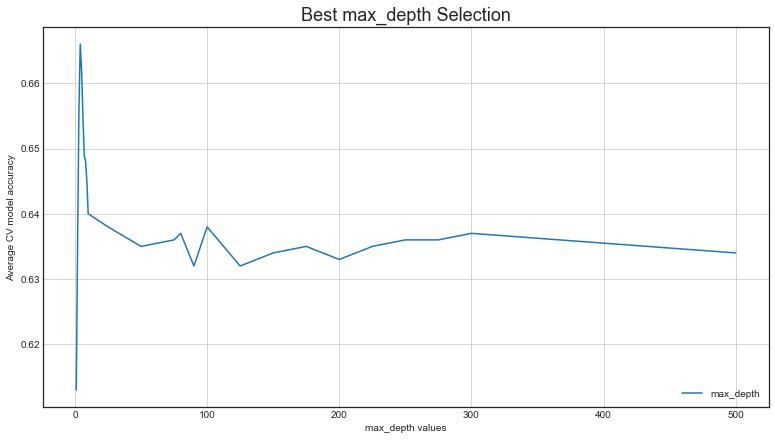

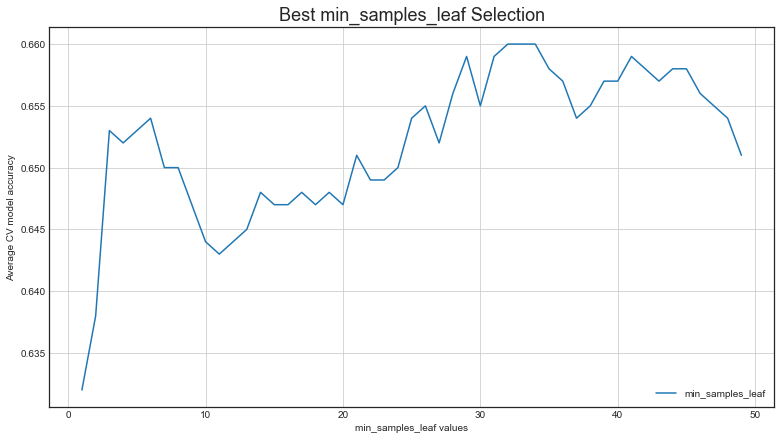

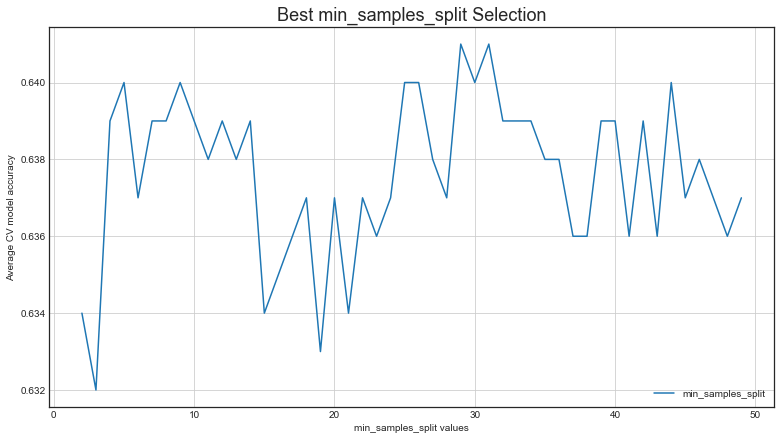

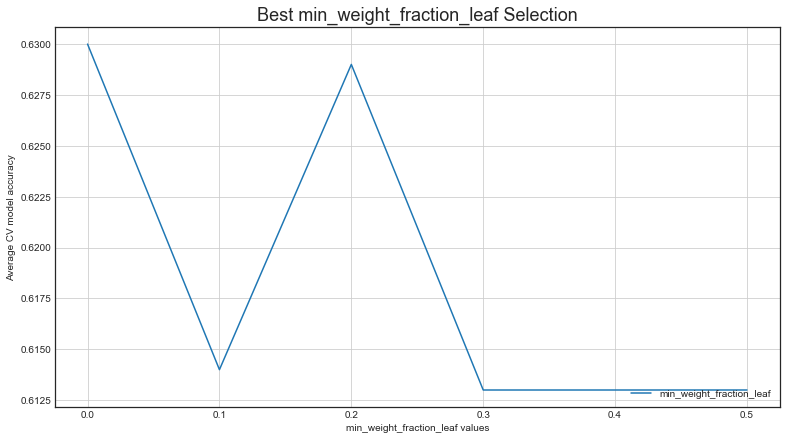

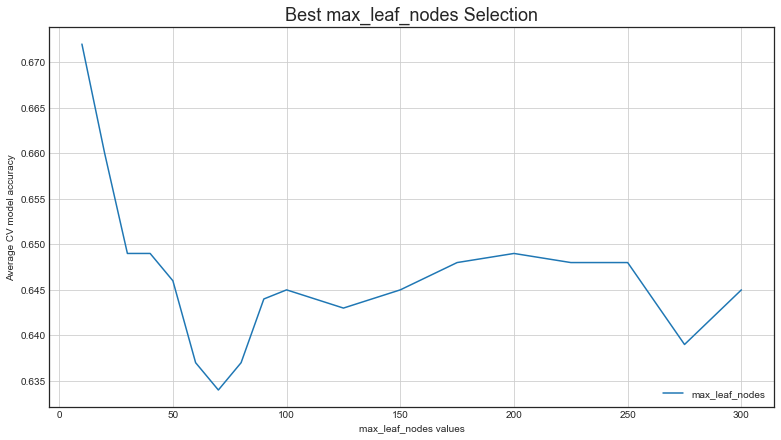

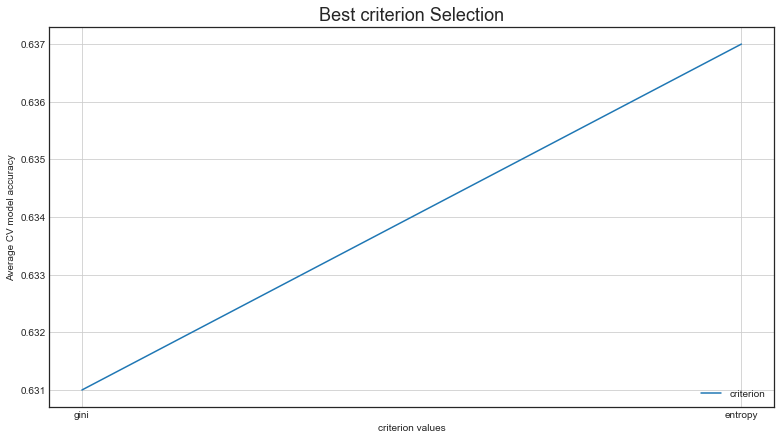

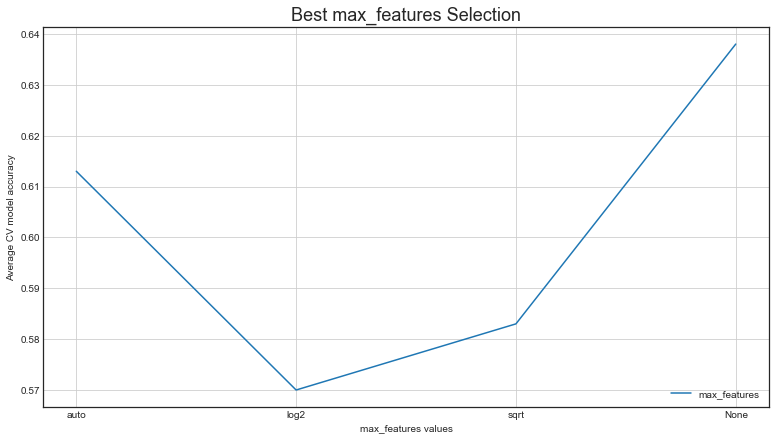

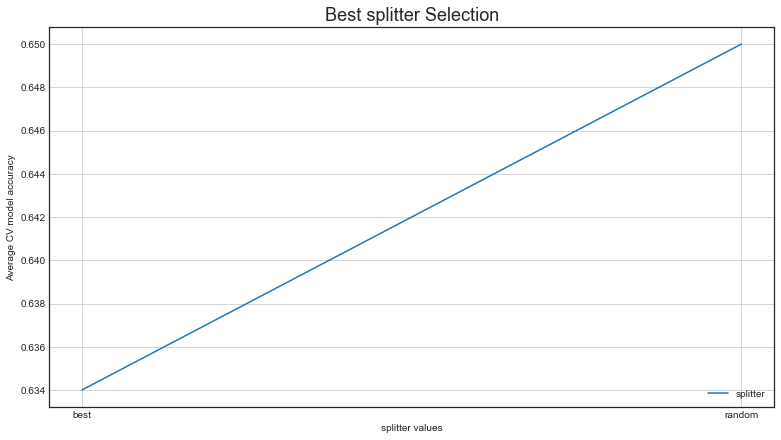

In [93]:
DecisionTree_plot_Values(X,y, max_depth_list, min_samples_leaf_list, min_samples_split_list, min_weight_fraction_leaf_list, \
                             max_leaf_nodes_list, criterion_list,max_features_list, splitter_list)  # PLots Cross Val score

# Over Sampled X and y values

## Plotting the KNN's with a average Cross-val score

max_depth  [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 25, 50, 75, 80, 90, 100, 125, 150, 175, 200, 225, 250, 275, 300, 500] 
Average max_depth scores [0.925, 0.34, 0.455, 0.519, 0.562, 0.612, 0.664, 0.689, 0.736, 0.754, 0.768, 0.903, 0.926, 0.927, 0.927, 0.927, 0.926, 0.928, 0.926, 0.926, 0.926, 0.927, 0.926, 0.927, 0.927, 0.926]
The hyperparameter 125 gives the best result : 0.928



min_samples_leaf  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49] 
Average min_samples_leaf scores [0.926, 0.919, 0.918, 0.911, 0.913, 0.909, 0.907, 0.905, 0.9, 0.898, 0.895, 0.893, 0.89, 0.887, 0.886, 0.885, 0.883, 0.882, 0.88, 0.879, 0.878, 0.875, 0.874, 0.873, 0.871, 0.871, 0.87, 0.87, 0.87, 0.868, 0.866, 0.863, 0.86, 0.858, 0.859, 0.859, 0.857, 0.854, 0.853, 0.851, 0.85, 0.85, 0.847, 0.847, 0.846, 0.844, 0.841, 0.841, 0.841]
The hyperparameter 1 gives the best result :

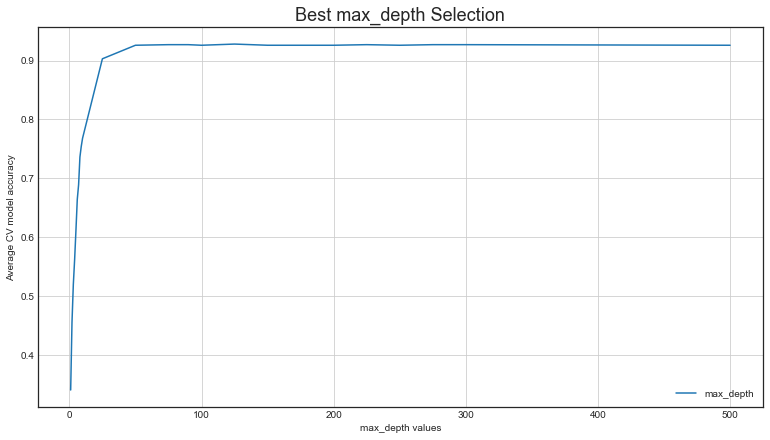

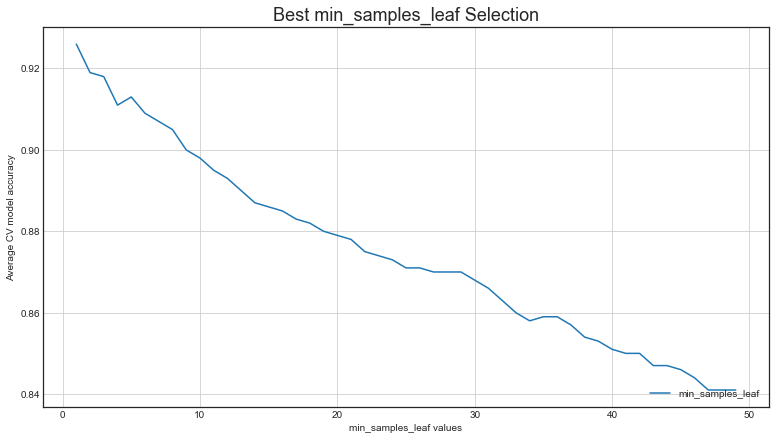

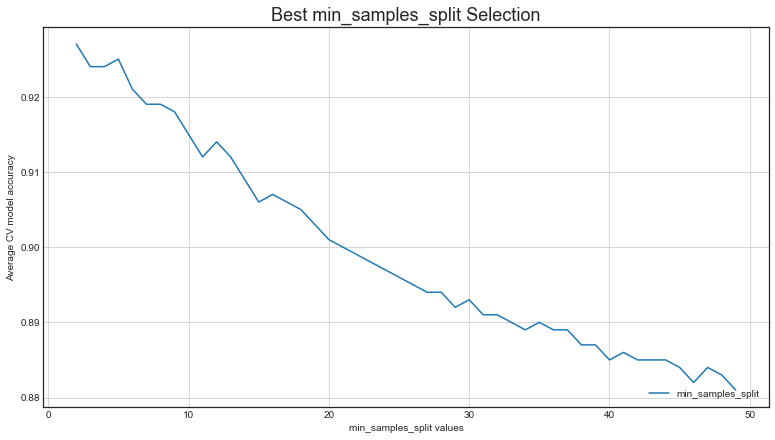

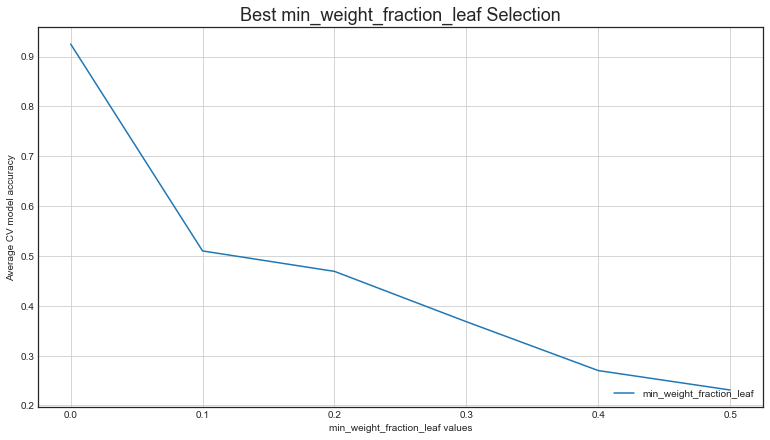

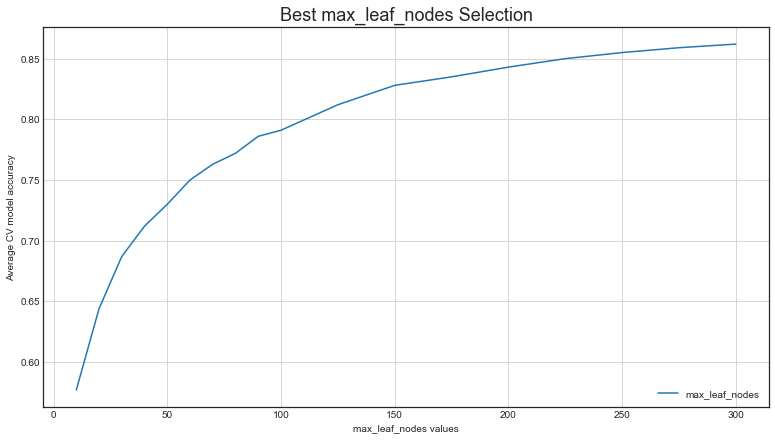

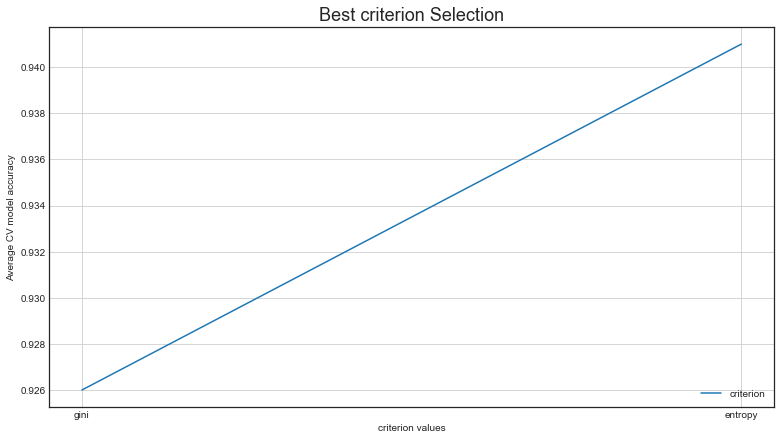

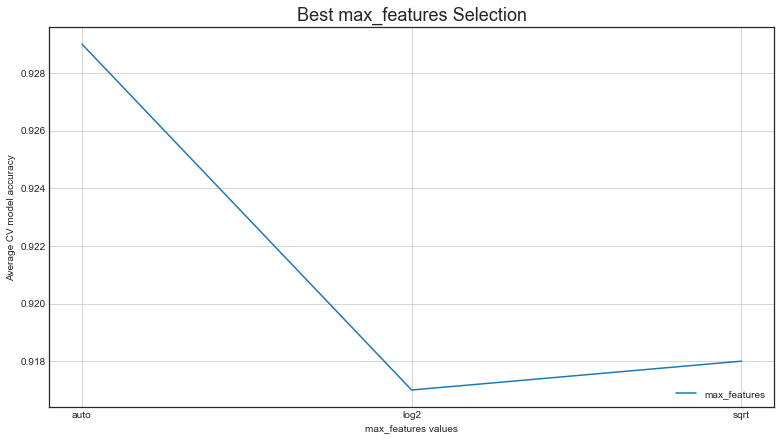

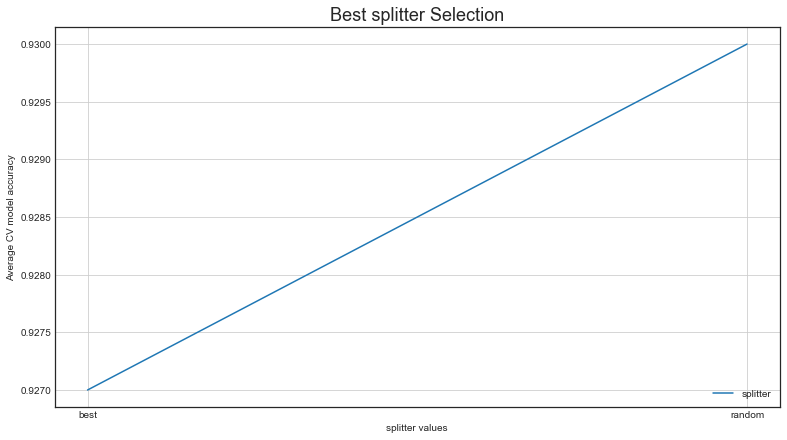

In [97]:
DecisionTree_plot_Values(X_over,y_over, max_depth_list, min_samples_leaf_list, min_samples_split_list, \
    min_weight_fraction_leaf_list, max_leaf_nodes_list, criterion_list,max_features_list, splitter_list)  # PLots Cross
                                                                                                          # Val score

#  X and y obtained by using Corelation matrix

## Plotting the KNN's with a average Cross-val score

max_depth  [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149] 
Average max_depth scores [0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64, 0.64]
The hyperparameter 101 gives the best result : 0.64
The hyperparameter 102 gives the best result : 0.64
The hyperparameter 103 gives the best result : 0.64
The hyperparameter 104 gives the best result : 0.64
The hyperparameter 105 gives the best result : 0.64
The hyperparameter 106 gives the best result : 0.64
The hyperparameter 107 gives the best result : 0.64
The hyperparameter 108 gives the best result : 0.64
The hy

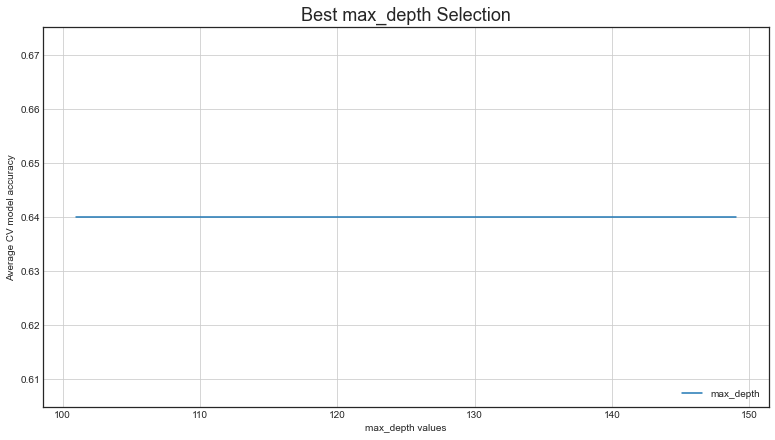

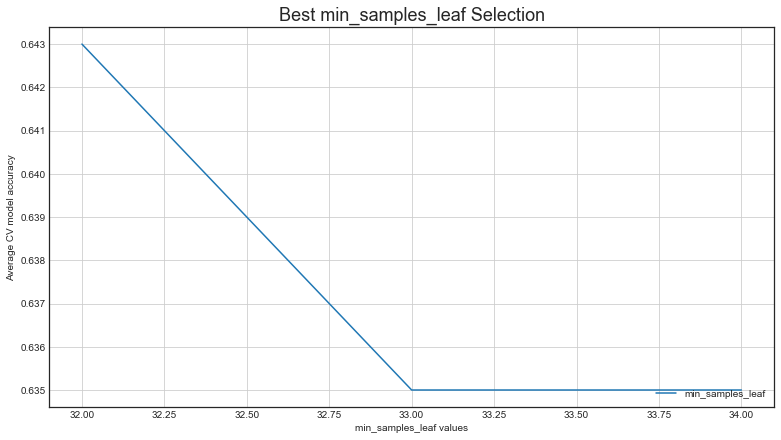

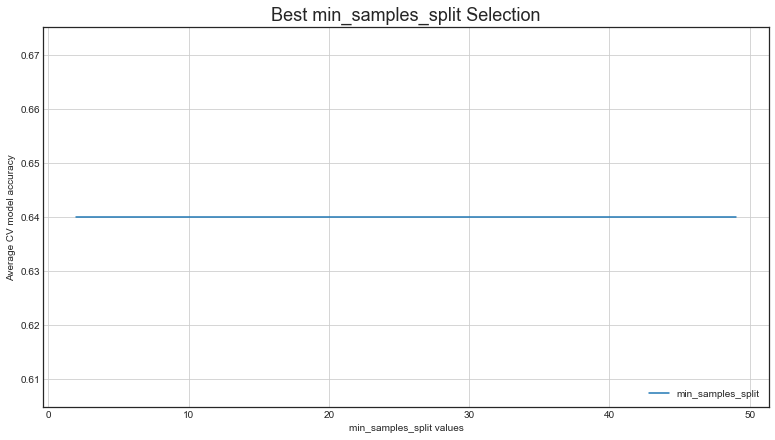

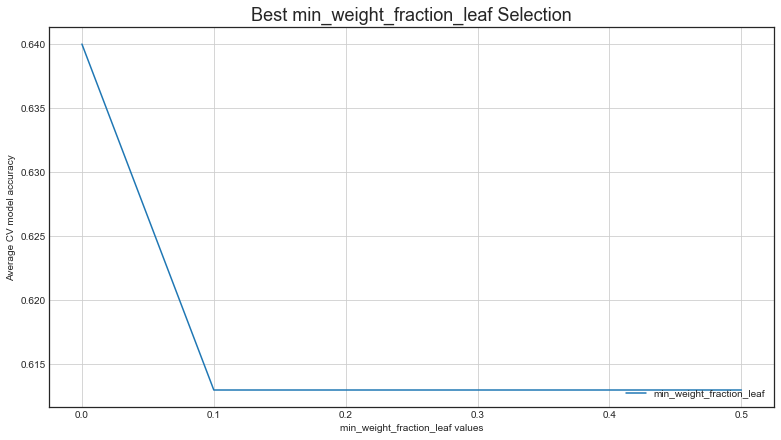

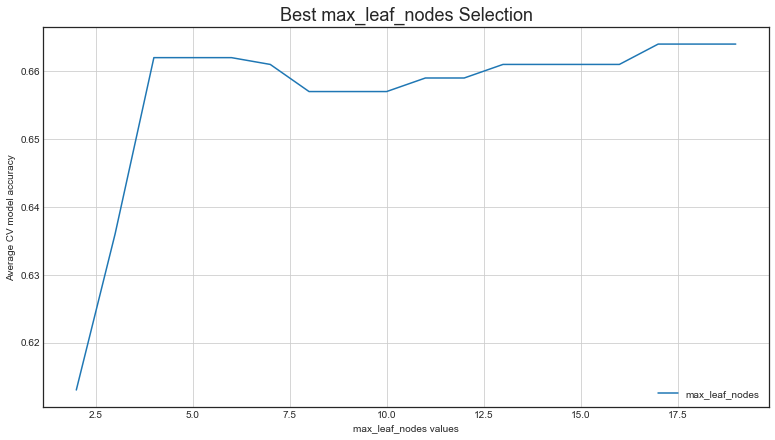

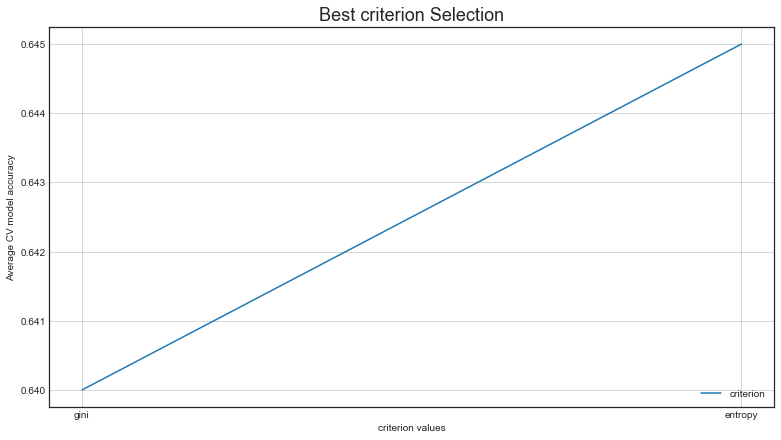

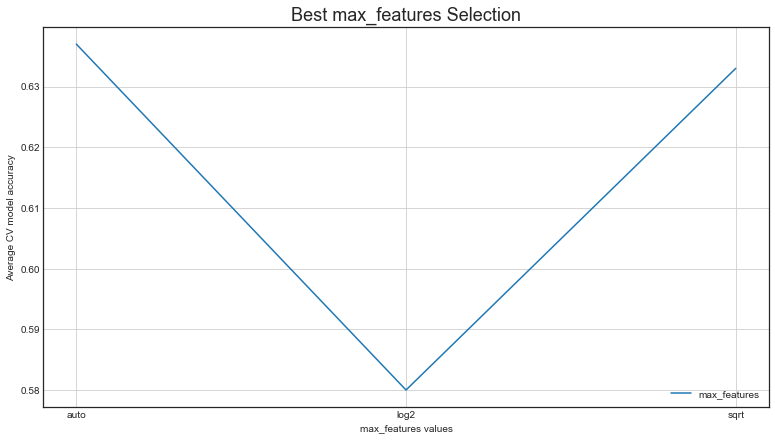

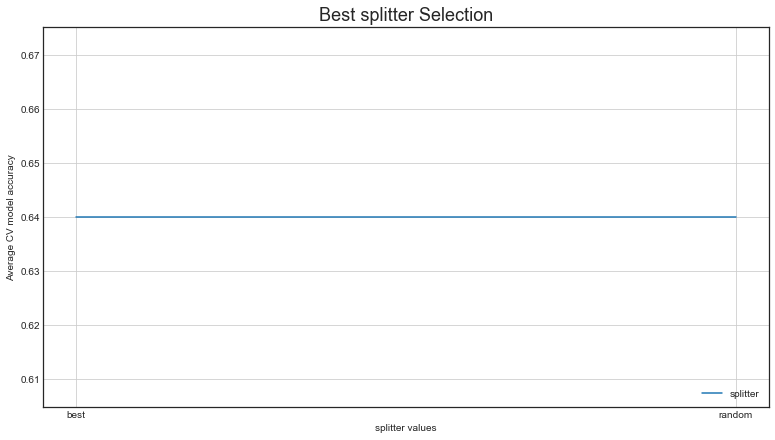

In [171]:
DecisionTree_plot_Values(X2,y, max_depth_list, min_samples_leaf_list, min_samples_split_list, min_weight_fraction_leaf_list, \
                             max_leaf_nodes_list, criterion_list,max_features_list, splitter_list)
# PLots Cross Val score

# X and y un_edited

# Without any model Tuning

In [119]:
crossvalscore(DecisionTreeClassifier(), X, y, 10)  # Performs cross validation.


Accuracy: 62.93 %
Standard Deviation: 5.36 %


'Accuracy: 62.93 %'

# Using Cross Validation hyperparameter selection

In [117]:
msl_list =  [32, 33, 34]  # a list of min_samples_leaf
mss_list = [31, 29]  # a list of min_samples_split 
for msl in msl_list:  # looping through a list
    for mss in mss_list:  # looping through a list
        print("Result when min_samples_leaf = ", msl)  # printing output
        print("Result when min_samples_split = ", mss)  # printing output
        crossvalscore(DecisionTreeClassifier(min_samples_leaf = msl, min_samples_split = mss, max_leaf_nodes = 10, \
                                            min_weight_fraction_leaf = 0.0,  max_depth = 4, criterion = 'entropy', \
                                            max_features = "auto", splitter = "random"), X, y, 10) 
        # gives Cross Val score
        print("\n")  # printing a new line

Result when min_samples_leaf =  32
Result when min_samples_split =  31
Accuracy: 57.41 %
Standard Deviation: 8.80 %


Result when min_samples_leaf =  32
Result when min_samples_split =  29
Accuracy: 59.48 %
Standard Deviation: 4.97 %


Result when min_samples_leaf =  33
Result when min_samples_split =  31
Accuracy: 59.11 %
Standard Deviation: 3.73 %


Result when min_samples_leaf =  33
Result when min_samples_split =  29
Accuracy: 61.31 %
Standard Deviation: 4.26 %


Result when min_samples_leaf =  34
Result when min_samples_split =  31
Accuracy: 61.26 %
Standard Deviation: 4.60 %


Result when min_samples_leaf =  34
Result when min_samples_split =  29
Accuracy: 59.99 %
Standard Deviation: 4.31 %




# Over Sampled X and y values

# Without any model Tuning

In [58]:
crossvalscore(DecisionTreeClassifier(), X_over, y_over, 10) 
                                      # Performs cross validation.

Accuracy: 93.10 %
Standard Deviation: 0.83 %


'Accuracy: 93.10 %'

# Using Cross Validation hyperparameter selection

In [110]:
crossvalscore(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = None, \
                                    min_weight_fraction_leaf = 0.0,  max_depth = 125, criterion = 'entropy', \
                                    max_features = None, splitter = "random"), X_over, y_over, 10) 
 # Performs cross validation.

Accuracy: 94.46 %
Standard Deviation: 1.16 %


'Accuracy: 94.46 %'

#  X and y obtained by using Corelation matrix

# Without any model Tuning

In [120]:
crossvalscore(DecisionTreeClassifier(), X2, y, 10)  # Performs cross validation.

Accuracy: 61.46 %
Standard Deviation: 6.53 %


'Accuracy: 61.46 %'

# Using Cross Validation hyperparameter selection

In [112]:
crossvalscore(DecisionTreeClassifier(min_samples_leaf = 10, min_samples_split = 30, max_leaf_nodes = 20, \
                                        min_weight_fraction_leaf = 0.0,  max_depth = 3, criterion = 'entropy', \
                                        max_features = "sqrt", splitter = "random"), X2, y, 10) 
# Performs cross validation.

Accuracy: 60.87 %
Standard Deviation: 0.89 %


'Accuracy: 60.87 %'

# X and y un_edited

## Random search 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.070954      0.016334         0.003907        0.007325   
1       0.088323      0.011102         0.002497        0.004175   
2       0.071326      0.017272         0.000048        0.000095   
3       0.068797      0.010574         0.004411        0.007330   
4       0.066288      0.017406         0.000400        0.000799   
5       0.064780      0.006269         0.008400        0.007061   
6       0.058542      0.007354         0.002132        0.002149   
7       0.058539      0.009827         0.003594        0.006100   
8       0.048507      0.010485         0.000200        0.000399   
9       0.040324      0.007398         0.006610        0.006969   

  param_min_samples_split param_min_samples_leaf param_max_leaf_nodes  \
0                      29                     32                    3   
1                      29                     32                    2   
2                      29                  

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.061104      0.006599         0.000000        0.000000   
1       0.071307      0.033036         0.004648        0.006280   
2       0.081446      0.026242         0.027653        0.026522   
3       0.061779      0.018817         0.002757        0.005515   
4       0.047611      0.004788         0.003133        0.006266   
5       0.043371      0.006980         0.003699        0.006065   
6       0.042561      0.008251         0.006659        0.008180   
7       0.044120      0.005286         0.002147        0.004294   
8       0.048788      0.001759         0.000000        0.000000   
9       0.043822      0.004680         0.003525        0.007050   

  param_min_samples_split param_min_samples_leaf param_max_leaf_nodes  \
0                      29                     34                    3   
1                      29                     34                    2   
2                      29                  

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.074230      0.017305         0.002522        0.003278   
1       0.066511      0.013624         0.001664        0.003328   
2       0.056730      0.010608         0.003952        0.006945   
3       0.062507      0.014452         0.003253        0.003174   
4       0.076765      0.006346         0.007700        0.003521   
5       0.076741      0.008454         0.012402        0.015124   
6       0.071106      0.012186         0.009484        0.014762   
7       0.047085      0.005943         0.004726        0.006271   
8       0.063583      0.004184         0.008090        0.008611   
9       0.071401      0.013904         0.000000        0.000000   

  param_min_samples_split param_min_samples_leaf param_max_leaf_nodes  \
0                      31                     33                    3   
1                      31                     33                    2   
2                      31                  

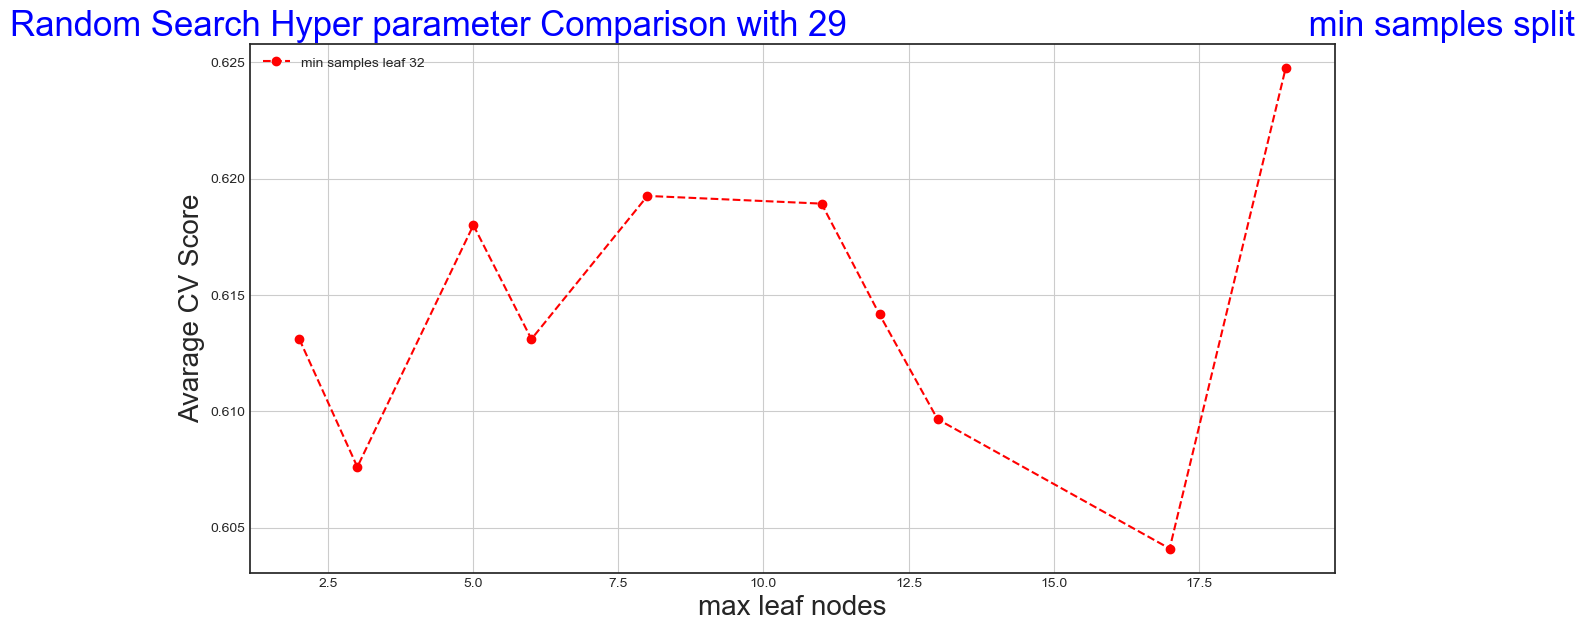

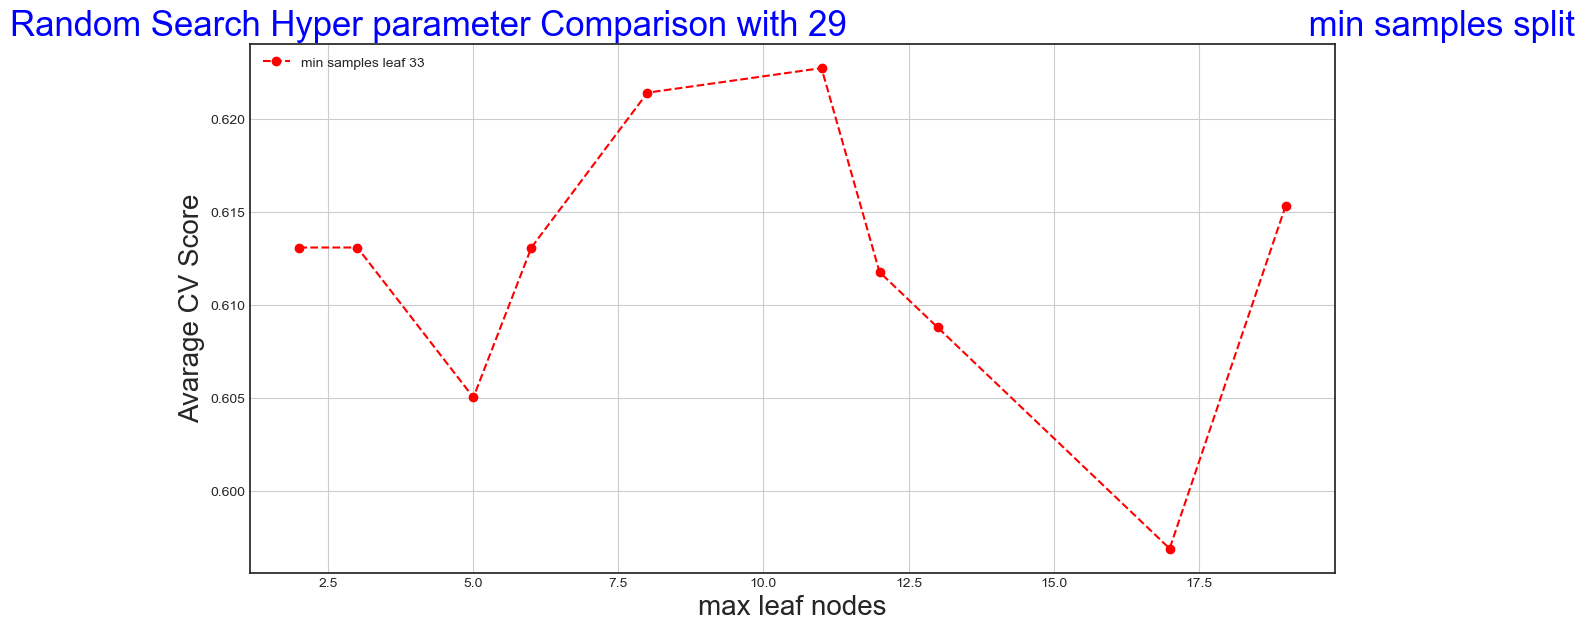

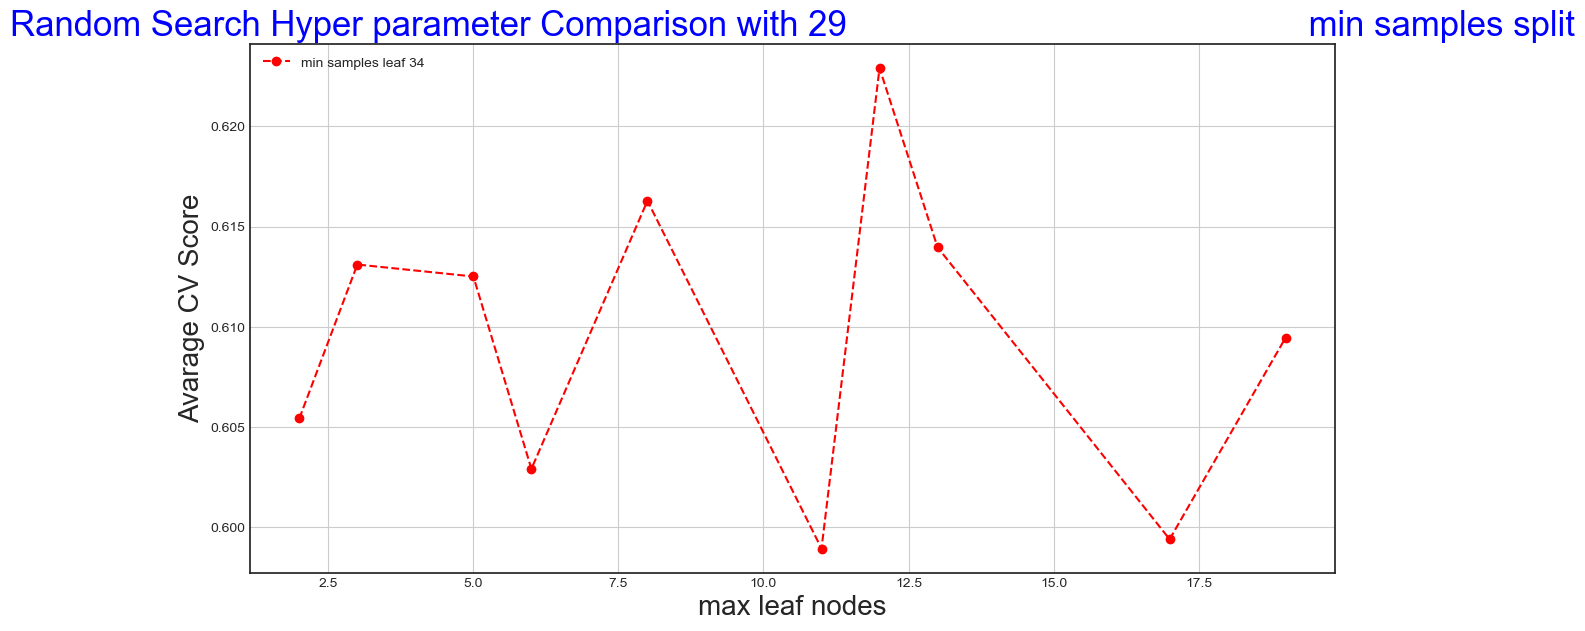

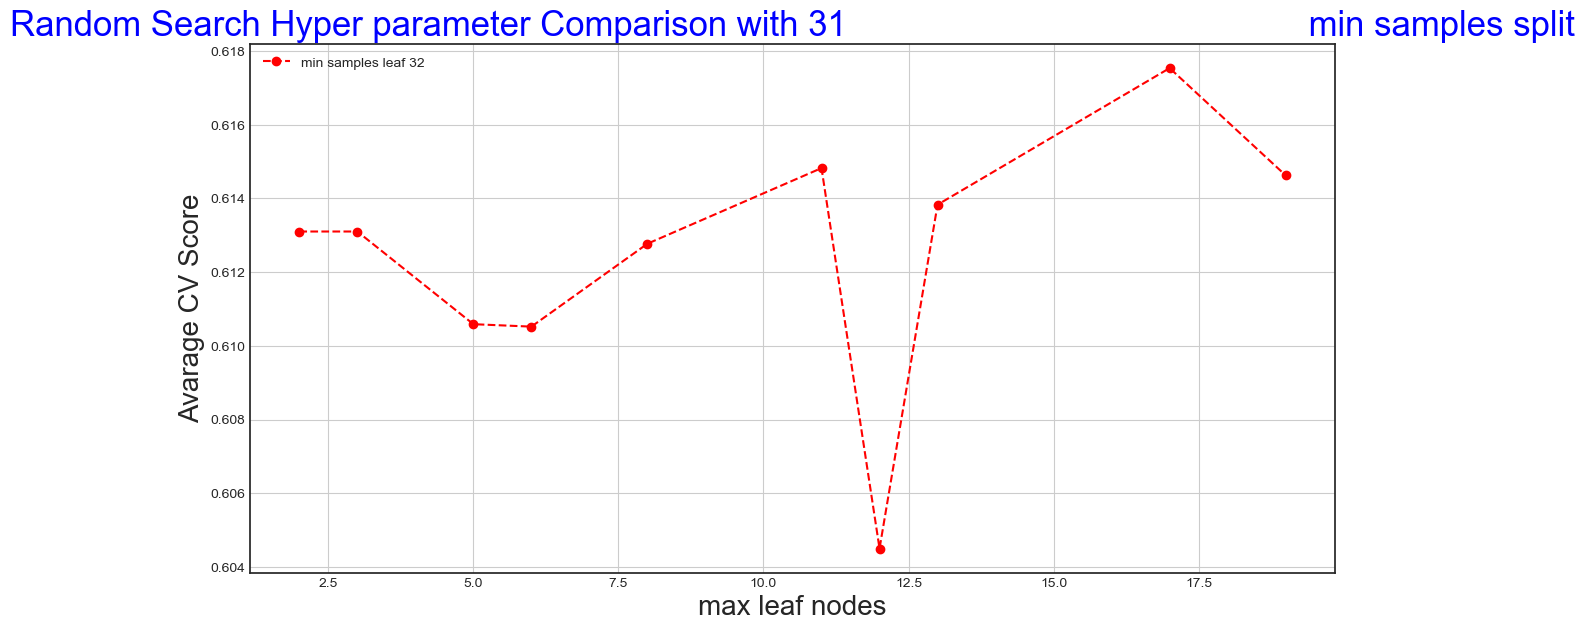

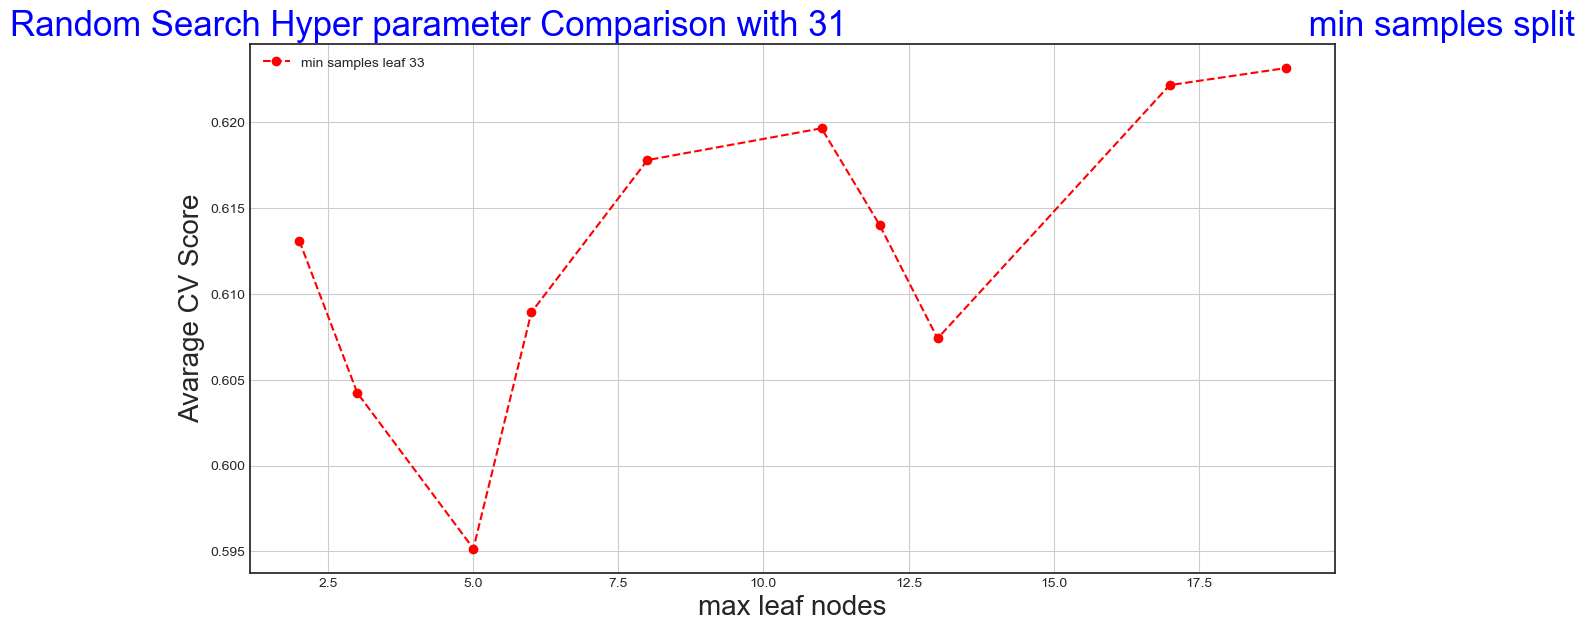

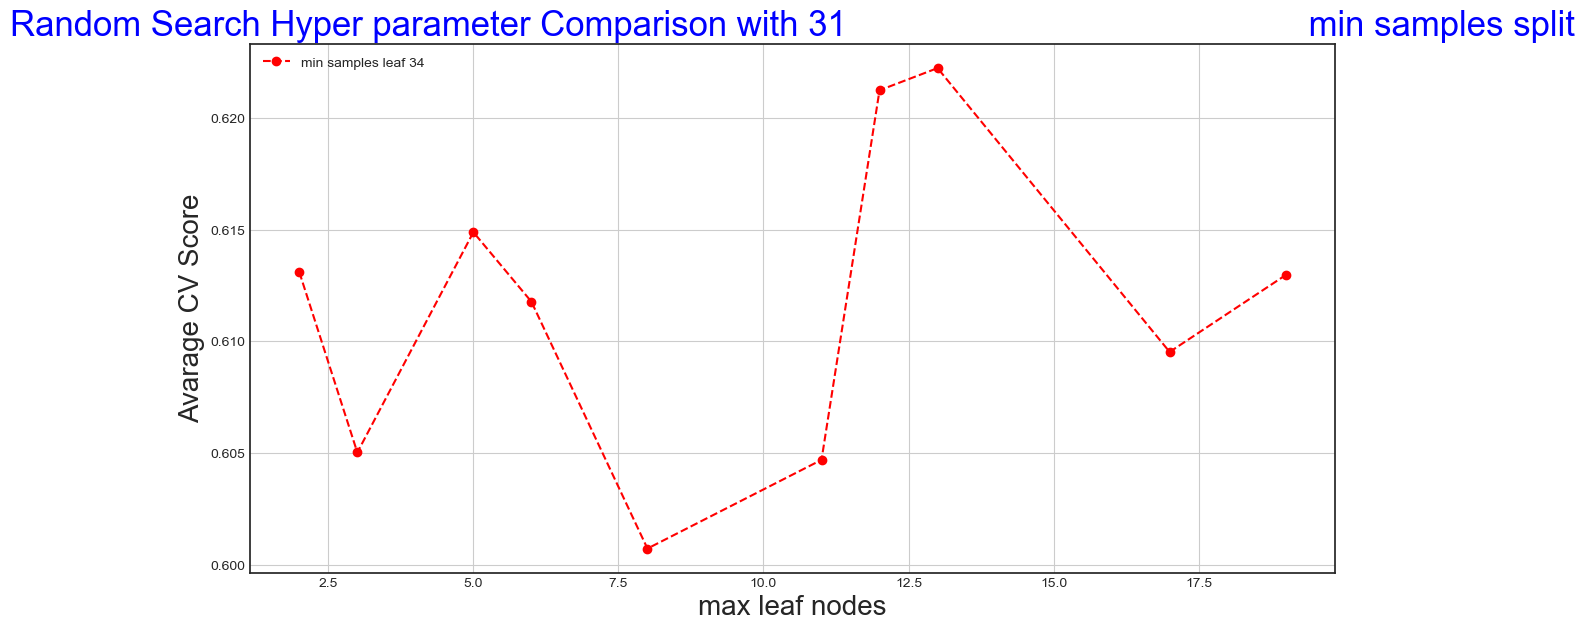

In [272]:
max_leaf_nodes_list =  list(range(1,20))    # a lsit with values specified.
min_samples_leaf_list = [32, 33, 34]   # a lsit with values specified.
min_samples_split_list = [29, 31]   # a lsit with values specified.
for i in range(len(min_samples_split_list)):
               for j in range(len(min_samples_leaf_list)):
                        list1 = []  # creating a empty list
                        list2 = []  # creating a empty list
                        para_rand = dict(max_leaf_nodes = max_leaf_nodes_list, min_samples_leaf = [min_samples_leaf_list[j]], \
                                         min_samples_split = [min_samples_split_list[i]])  # adding the above
                        # lists in a dictinary.

                        rand_search  = rand_search_fun(DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,  \
                                                            max_depth = 4, criterion = 'entropy', \
                                                            max_features = "auto", splitter = "random"), \
                                                            para_rand, 5, X, y) # X and y un_edite 
                        ## Random search # Using the grid search gunction with   
                        for m in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times 
                                                                                      # the length of
                                                                                  # the mean_test_score

                            list1.append(rand_search.cv_results_["mean_test_score"][m])  # appending the values to list 
                                                                                           
                            list2.append(rand_search.cv_results_["param_max_leaf_nodes"][m])  # appedning the
                                                                                        # values to the list2.

                            sorted_list1= []
                            sorted_list2 = list2.copy()  # creating a copy of the list2 variables values.
                            sorted_list2.sort()   # sorting the list2
                            for k in range(len(sorted_list2)):  # Looping through the lenght of the sorted_list2 variable.
                                for l in range(len(list2)):  # Looping through the lenght of the list2 variable.
                                    if sorted_list2[k] == list2[l]:  # checking that if the values of 
                                                                         # sorted_list2[i] is equal to list2[j]
                                        sorted_list1.append(list1[l])  # appeding the list1[j] values to the sorted_list1 list.
                                
                              
                        plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
                        plt.title("Random Search Hyper parameter Comparison with "+str(min_samples_split_list[i]) +" \
                                               min samples split", fontsize=25, color="blue")  # setting the plot title.
                        plt.plot(sorted_list2,sorted_list1 , "--", marker = "o", label="min samples leaf " \
                                                  +  str(min_samples_leaf_list[j]), color="red")  # setting the best
                                                                # variables values to the plot on the y axis and 
                                                                                 # max depth on the x axis.
                        plt.xlabel('max leaf nodes',fontsize=20)  # Setting the x label.
                        plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
                        plt.legend(loc='upper left')  # setting the legend.
                        plt.grid()  # setting a grid
                            

# Over Sampled X and y values

## Random search 

In [269]:
max_depth_list = list(range(101,150))   # a lsit with values specified.
splitter_list = ['best']   # a lsit with values specified.
para_rand = dict(max_depth = max_depth_list, splitter = splitter_list)  # adding the above 
                                                                                                       # lists in a dictinary.
rand_search = rand_search_fun(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = None, \
                                    min_weight_fraction_leaf = 0.0,criterion = 'entropy', \
                                    max_features = None), para_rand, 5, X_over, y_over)  
                                    # Using the random search function with 
best = []  # creating a empty list
list1 = []  # creating a empty list
for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                  # the mean_test_score

        best.append(rand_search.cv_results_["mean_test_score"][i])  # appending the best values ot the 
                                                                       # best variable.
        list1.append(rand_search.cv_results_["param_max_depth"][i])  # appedning the values to the list1.

sorted_best= []  # creating a empty list
sorted_list1 = list1.copy()  # creating a copy of the list1 variables values.
sorted_list1.sort()   # sorting the KNNs
for i in range(len(sorted_list1)):  # Looping through the lenght of the sorted_list1 variable.
    for j in range(len(list1)):  # Looping through the lenght of the list1 variable.
        if sorted_list1[i] == list1[j]:  # checking that if the values of sorted_list1[i] is equal to list1[j]
            sorted_best.append(best[j])  # appeding the best[j] values to the sorted_best list.

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.288310      0.115525         0.006680        0.000941   
1       1.139581      0.031279         0.006402        0.000490   
2       1.470768      0.131361         0.013452        0.005758   
3       1.731422      0.097127         0.007123        0.000731   
4       1.491896      0.109028         0.008231        0.001638   
5       1.845962      0.145408         0.011739        0.006777   
6       1.405827      0.133591         0.006985        0.000972   
7       1.151603      0.117836         0.007727        0.001718   
8       1.362993      0.099052         0.008996        0.003527   
9       1.282805      0.296957         0.006200        0.001325   

  param_splitter param_max_depth                                  params  \
0           best             143  {'splitter': 'best', 'max_depth': 143}   
1           best             130  {'splitter': 'best', 'max_depth': 130}   
2           best             107  

In [270]:
max_depth_list = list(range(101,150))   # a lsit with values specified.
splitter_list = ['random']   # a lsit with values specified.
para_rand = dict(max_depth = max_depth_list, splitter = splitter_list)  # adding the above 
                                                                                                       # lists in a dictinary.
rand_search = rand_search_fun(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = None, \
                                    min_weight_fraction_leaf = 0.0,criterion = 'entropy', \
                                    max_features = None), para_rand, 5, X_over, y_over)  
                                    # Using the random search function with 



random = []  # creating a empty list
list2 = []  # creating a empty list
for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                  # the mean_test_score
        random.append(rand_search.cv_results_["mean_test_score"][i])  # appending the random values ot the 
                                                                       # random variable.
        list2.append(rand_search.cv_results_["param_max_depth"][i])  # appedning the items to the list2.

sorted_random = []  # creating a empty list
sorted_list2 = list2.copy()   # creating a copy of the list2 variables values.
sorted_list2.sort()  # sorting the list
for i in range(len(sorted_list2)):  # Looping through the lenght of the sorted_list2 variable.
    for j in range(len(list2)):  # Looping through the lenght of the list2 variable.
        if sorted_list2[i] == list2[j]:  # checking that if the values of sorted_list2[i] equal  list2[j]
            sorted_random.append(random[j])  # appeding the random[j] values to the sorted_random list.


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       1.363015      0.064940         0.016552        0.010166   
1       1.362557      0.218340         0.017322        0.015034   
2       0.981531      0.124759         0.005688        0.003896   
3       0.928698      0.037464         0.006897        0.003958   
4       0.970885      0.069212         0.008131        0.003082   
5       1.022919      0.130174         0.008475        0.002020   
6       0.887076      0.067775         0.007194        0.001029   
7       0.842955      0.024722         0.006723        0.000547   
8       0.846674      0.035496         0.006671        0.000631   
9       0.779879      0.124208         0.008203        0.004920   

  param_splitter param_max_depth                                    params  \
0         random             143  {'splitter': 'random', 'max_depth': 143}   
1         random             130  {'splitter': 'random', 'max_depth': 130}   
2         random            

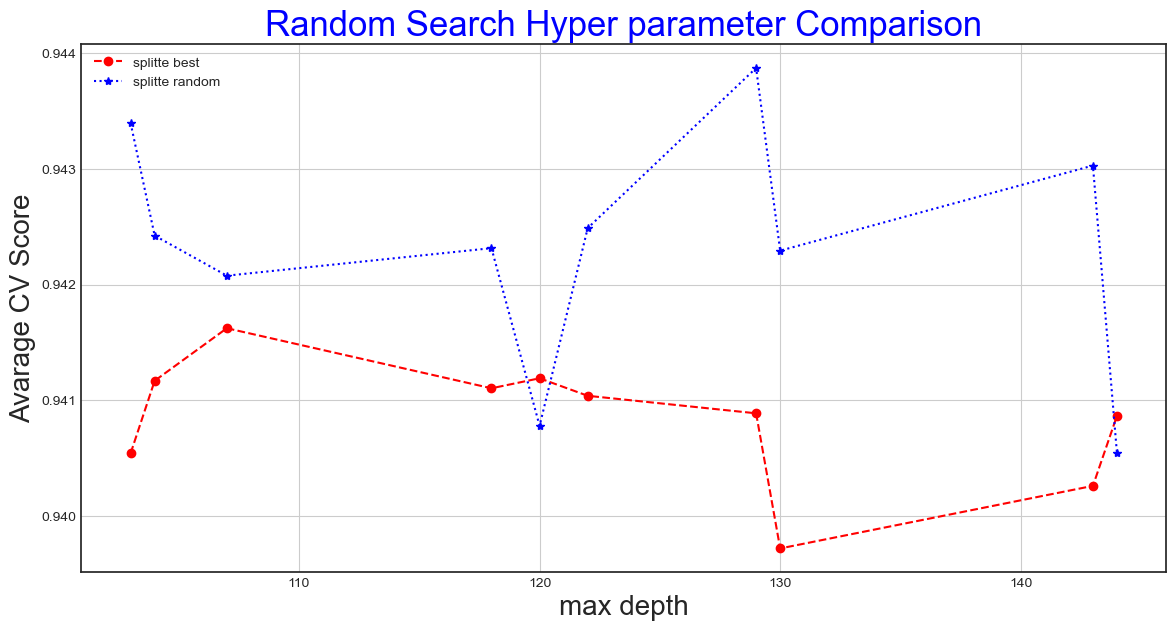

In [271]:
plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Random Search Hyper parameter Comparison", fontsize=25, color="blue")  # setting the plot title.
plt.plot(sorted_list1,sorted_best , "--", marker = "o", label="splitte best", color="red")  # setting the best
plt.plot(sorted_list2,sorted_random ,":", marker = "*", label="splitte random", color="blue")  # setting the random 
                                                # variables values to the plot on the y axis and max depth on the x axis.
plt.xlabel('max depth',fontsize=20)  # Setting the x label.
plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
plt.legend(loc='upper left')  # setting the legend.
plt.grid()  # setting a grid

#  X and y obtained by using Corelation matrix

## Random search 

In [266]:
min_samples_split_list = list(range(2,50))  # a lsit with values specified.
splitter_list =   ['best']  # a lsit with values specified.

para_rand = dict(min_samples_split = min_samples_split_list, splitter = splitter_list)  # adding the above 
                                                                                                       # lists in a dictinary.
rand_search  = rand_search_fun(DecisionTreeClassifier(min_samples_leaf = 10, max_leaf_nodes = 20, \
                                        min_weight_fraction_leaf = 0.0,  max_depth = 3, criterion = 'entropy', \
                                        max_features = "sqrt"), para_rand, 5, X2, y)  # Using the grid search function with 

best = []  # creating a empty list
list1 = []  # creating a empty list
for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                  # the mean_test_score

        best.append(rand_search.cv_results_["mean_test_score"][i])  # appending the best values ot the 
                                                                       # best variable.
        list1.append(rand_search.cv_results_["param_min_samples_split"][i])  # appedning the values to the list1.

sorted_best= []  # creating a empty list
sorted_list1 = list1.copy()  # creating a copy of the list1 variables values.
sorted_list1.sort()   # sorting the KNNs
for i in range(len(sorted_list1)):  # Looping through the lenght of the sorted_list1 variable.
    for j in range(len(list1)):  # Looping through the lenght of the list1 variable.
        if sorted_list1[i] == list1[j]:  # checking that if the values of sorted_list1[i] is equal to list1[j]
            sorted_best.append(best[j])  # appeding the best[j] values to the sorted_best list.

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.029401      0.006681         0.001999        0.000006   
1       0.030997      0.006956         0.001999        0.000003   
2       0.046798      0.012875         0.002201        0.000400   
3       0.042374      0.008150         0.002991        0.001240   
4       0.037798      0.004261         0.002200        0.000398   
5       0.028147      0.001765         0.002207        0.000396   
6       0.025957      0.003314         0.001792        0.000399   
7       0.025656      0.004575         0.002006        0.000626   
8       0.025533      0.002540         0.001802        0.000400   
9       0.023765      0.000854         0.002245        0.000388   

  param_splitter param_min_samples_split  \
0           best                      31   
1           best                      34   
2           best                       8   
3           best                      19   
4           best                      21  

In [267]:
min_samples_split_list = list(range(2,50))  # a lsit with values specified.
splitter_list =   ['random']  # a lsit with values specified.

para_rand = dict(min_samples_split = min_samples_split_list, splitter = splitter_list)  # adding the above 
                                                                                                       # lists in a dictinary.
rand_search  = rand_search_fun(DecisionTreeClassifier(min_samples_leaf = 10, max_leaf_nodes = 20, \
                                        min_weight_fraction_leaf = 0.0,  max_depth = 3, criterion = 'entropy', \
                                        max_features = "sqrt"), para_rand, 5, X2, y)  # Using the grid search function with
random = []  # creating a empty list
list2 = []  # creating a empty list
for i in range(len(rand_search.cv_results_["mean_test_score"])):  # looping through the times the length of 
                                                                  # the mean_test_score
        random.append(rand_search.cv_results_["mean_test_score"][i])  # appending the random values ot the 
                                                                       # random variable.
        list2.append(rand_search.cv_results_["param_min_samples_split"][i])  # appedning the items to the list2.

sorted_random = []  # creating a empty list
sorted_list2 = list2.copy()   # creating a copy of the list2 variables values.
sorted_list2.sort()  # sorting the list
for i in range(len(sorted_list2)):  # Looping through the lenght of the sorted_list2 variable.
    for j in range(len(list2)):  # Looping through the lenght of the list2 variable.
        if sorted_list2[i] == list2[j]:  # checking that if the values of sorted_list2[i] equal  list2[j]
            sorted_random.append(random[j])  # appeding the random[j] values to the sorted_random list.


   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.025602      0.001853         0.002202        0.000400   
1       0.033003      0.013372         0.002598        0.000493   
2       0.035002      0.010637         0.002998        0.001096   
3       0.036599      0.012081         0.002405        0.000486   
4       0.041200      0.013421         0.002402        0.000496   
5       0.034800      0.013686         0.002399        0.000490   
6       0.025001      0.003631         0.001998        0.000002   
7       0.023604      0.002414         0.002397        0.000482   
8       0.024802      0.001599         0.001999        0.000635   
9       0.025601      0.004501         0.002000        0.000007   

  param_splitter param_min_samples_split  \
0         random                      31   
1         random                      34   
2         random                       8   
3         random                      19   
4         random                      21  

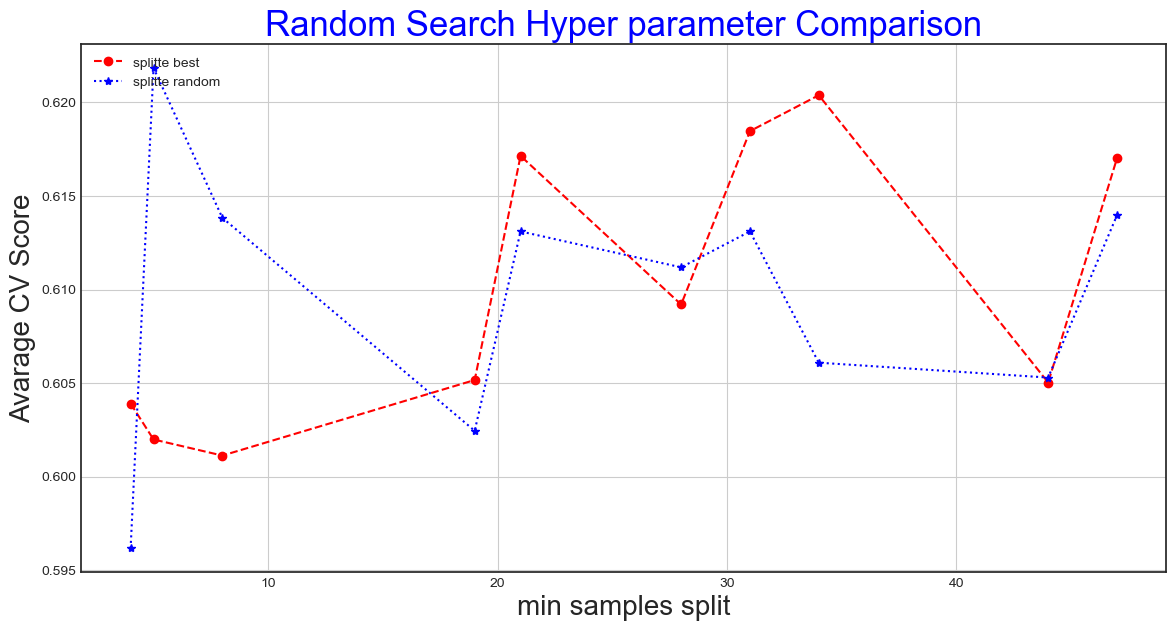

In [268]:
plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Random Search Hyper parameter Comparison", fontsize=25, color="blue")  # setting the plot title.
plt.plot(sorted_list1,sorted_best , "--", marker = "o", label="splitte best", color="red")  # setting the best
plt.plot(sorted_list2,sorted_random ,":", marker = "*", label="splitte random", color="blue")  # setting the random 
                                                # variables values to the plot on the y axis and max depth on the x axis.
plt.xlabel('min samples split',fontsize=20)  # Setting the x label.
plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
plt.legend(loc='upper left')  # setting the legend.
plt.grid()  # setting a grid

# X and y un_edited

## Grid Search

In [199]:
max_leaf_nodes_list =  list(range(1,20))  # a list with values specified.
min_samples_leaf_list = [32, 33, 34]  # a list with values specified.
min_samples_split_list = [29, 31]  # a list with values specified.
for i in range(len(min_samples_split_list)):
    if i == 0:
        para_grid = dict(max_leaf_nodes = max_leaf_nodes_list, min_samples_leaf = min_samples_leaf_list, \
                 min_samples_split = [min_samples_split_list[i]])  # adding the above 
                                                                                                       # lists in a dictinary.
        grid_search =  Grid_search_fun(DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,  max_depth = 4, \
                                                              criterion = 'entropy', \
                                       max_features = "auto", splitter = "random"), para_grid, 5, X, y)  # X and y un_edited
    if i == 1:
        para_grid = dict(max_leaf_nodes = max_leaf_nodes_list, min_samples_leaf = min_samples_leaf_list, \
                 min_samples_split = [min_samples_split_list[i]])  # adding the above 
                                                                                          # lists in a dictinary.
        grid_search2 = Grid_search_fun(DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,  max_depth = 4, \
                                                              criterion = 'entropy', \
                                       max_features = "auto", splitter = "random"), para_grid, 5, X, y)  # X and y un_edited        

## Random search # Using the grid search gunction with        

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.028987      0.001879         0.000000        0.000000   
1        0.027797      0.002456         0.000000        0.000000   
2        0.028060      0.002864         0.000000        0.000000   
3        0.033763      0.001472         0.002760        0.000389   
4        0.034098      0.000768         0.001998        0.000009   
5        0.035155      0.001894         0.002495        0.001106   
6        0.037237      0.003501         0.002533        0.000686   
7        0.034458      0.002823         0.002399        0.000490   
8        0.036202      0.003394         0.002530        0.000470   
9        0.035824      0.002356         0.002136        0.000273   
10       0.035955      0.004371         0.002399        0.000490   
11       0.039399      0.005179         0.002314        0.000579   
12       0.035543      0.004862         0.002002        0.000633   
13       0.034862      0.002461         0.002002

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.026288      0.001895         0.000000        0.000000   
1        0.027116      0.004808         0.000000        0.000000   
2        0.022457      0.003210         0.000000        0.000000   
3        0.030265      0.003507         0.001998        0.000631   
4        0.035462      0.009840         0.002601        0.001197   
5        0.038401      0.007813         0.001802        0.000394   
6        0.041800      0.008181         0.002402        0.000486   
7        0.044864      0.008833         0.002210        0.000391   
8        0.033260      0.003595         0.002238        0.000789   
9        0.033438      0.002079         0.001602        0.000486   
10       0.033078      0.004530         0.002102        0.000490   
11       0.035207      0.005440         0.001994        0.000011   
12       0.036451      0.003481         0.002196        0.000406   
13       0.033665      0.001605         0.002209

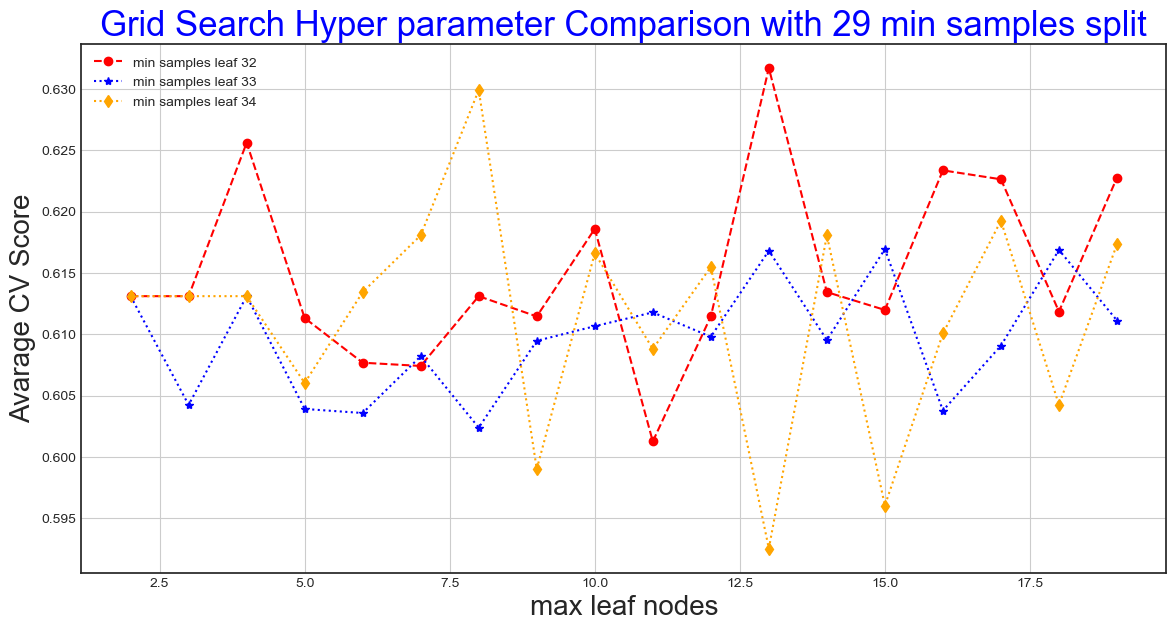

In [206]:
list1 = []  # a empty list is created
for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all even number 
                                                                       # indexes using a for loop.
    if grid_search.cv_results_["param_min_samples_leaf"][i] == 32:

        list1.append(grid_search.cv_results_["mean_test_score"][i])  # appending the 32 values to the
                                                                      # varibale list1.

list2 = []  # a empty list is created
for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                       # using a for loop.
    if grid_search.cv_results_["param_min_samples_leaf"][i] == 33:
        list2.append(grid_search.cv_results_["mean_test_score"][i])  # appending the 33 values to the 
                                                                    # varibale list2.
            
list3 = []  # a empty list is created
for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                       # using a for loop.
    if grid_search.cv_results_["param_min_samples_leaf"][i] == 34:
        list3.append(grid_search.cv_results_["mean_test_score"][i])  # appending the 34 values to the 
                                                                    # varibale lst3.





plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Grid Search Hyper parameter Comparison with 29 min samples split", fontsize=25, color="blue")  # setting the
                                                                                                         #  plot title.
plt.plot(max_leaf_nodes_list,list1 , "--", marker = "o", label="min samples leaf 32", color="red")  # setting the best
plt.plot(max_leaf_nodes_list,list2 ,":", marker = "*", label="min samples leaf 33", color="blue")  # setting the random 
plt.plot(max_leaf_nodes_list,list3 ,":", marker = "d", label="min samples leaf 34", color="orange")  # setting the random 
                                                # variables values to the plot on the y axis and max depth on the x axis.
plt.xlabel('max leaf nodes',fontsize=20)  # Setting the x label.
plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
plt.legend(loc='upper left')  # setting the legend.
plt.grid()  # setting a grid

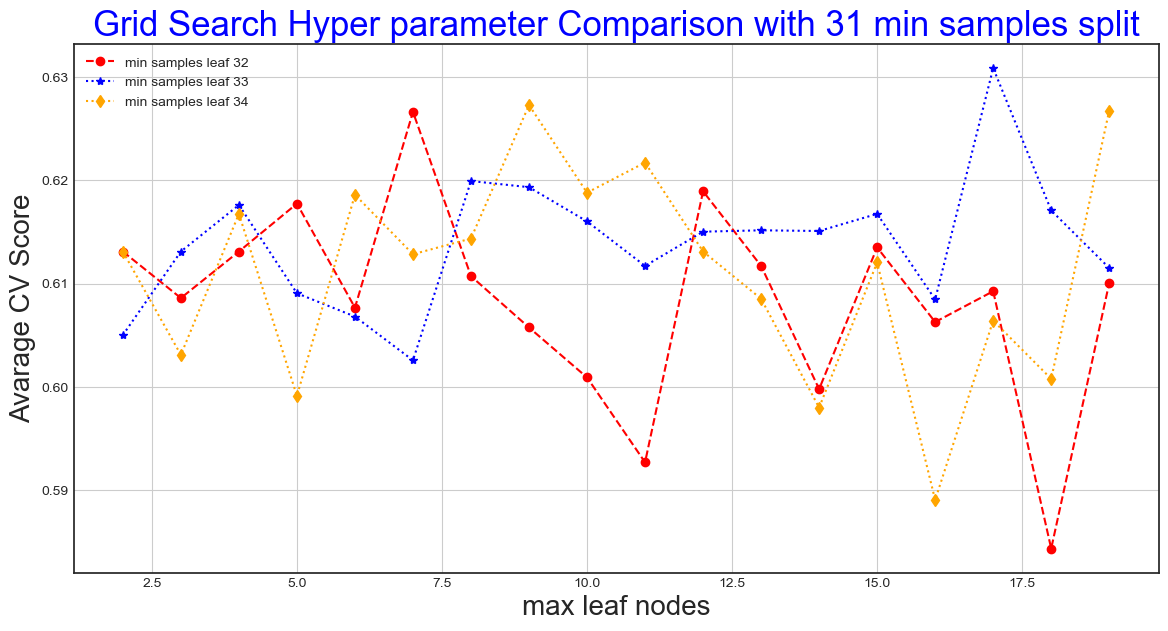

In [208]:
list1 = []  # a empty list is created
for i in range(len(grid_search2.cv_results_["mean_test_score"])):  # getting all even number 
                                                                       # indexes using a for loop.
    if grid_search2.cv_results_["param_min_samples_leaf"][i] == 32:

        list1.append(grid_search2.cv_results_["mean_test_score"][i])  # appending the 32 values to the
                                                                      # varibale list1.

list2 = []  # a empty list is created
for i in range(len(grid_search2.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                       # using a for loop.
    if grid_search2.cv_results_["param_min_samples_leaf"][i] == 33:
        list2.append(grid_search2.cv_results_["mean_test_score"][i])  # appending the 33 values to the 
                                                                    # varibale list2.
            
list3 = []  # a empty list is created
for i in range(len(grid_search2.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                       # using a for loop.
    if grid_search2.cv_results_["param_min_samples_leaf"][i] == 34:
        list3.append(grid_search2.cv_results_["mean_test_score"][i])  # appending the 34 values to the 
                                                                    # varibale list3.





plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Grid Search Hyper parameter Comparison with 31 min samples split", fontsize=25, color="blue")  # setting the
                                                                                                       #  plot title.
plt.plot(max_leaf_nodes_list,list1 , "--", marker = "o", label="min samples leaf 32", color="red")  # setting the best
plt.plot(max_leaf_nodes_list,list2 ,":", marker = "*", label="min samples leaf 33", color="blue")  # setting the random 
plt.plot(max_leaf_nodes_list,list3 ,":", marker = "d", label="min samples leaf 34", color="orange")  # setting the random 
                                                # variables values to the plot on the y axis and max depth on the x axis.
plt.xlabel('max leaf nodes',fontsize=20)  # Setting the x label.
plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
plt.legend(loc='upper left')  # setting the legend.
plt.grid()  # setting a grid

# Over Sampled X and y values

## Grid Search

In [183]:
max_depth_list = list(range(101,150))  # a list with values specified.
splitter_list = ['best', 'random']  # a list with values specified.
para_grid = dict(max_depth = max_depth_list, splitter = splitter_list)  # adding the above 
                                                                                                       # lists in a dictinary.
grid_search = Grid_search_fun(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = None, \
                                    min_weight_fraction_leaf = 0.0,criterion = 'entropy', \
                                    max_features = None), para_grid, 5, X_over, y_over)  # Using the grid search gunction with 

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.068720      0.032671         0.007002        0.001042   
1        0.814682      0.046723         0.006398        0.000323   
2        1.064241      0.033658         0.006591        0.000327   
3        0.811594      0.028609         0.006662        0.000625   
4        1.059275      0.021376         0.006401        0.000490   
..            ...           ...              ...             ...   
93       0.829794      0.045346         0.006403        0.001020   
94       1.401854      0.080254         0.007202        0.001168   
95       0.993000      0.059984         0.007397        0.001855   
96       1.334996      0.128753         0.007400        0.001856   
97       0.793214      0.058820         0.006601        0.000491   

   param_max_depth param_splitter                                    params  \
0              101           best    {'max_depth': 101, 'splitter': 'best'}   
1              101       

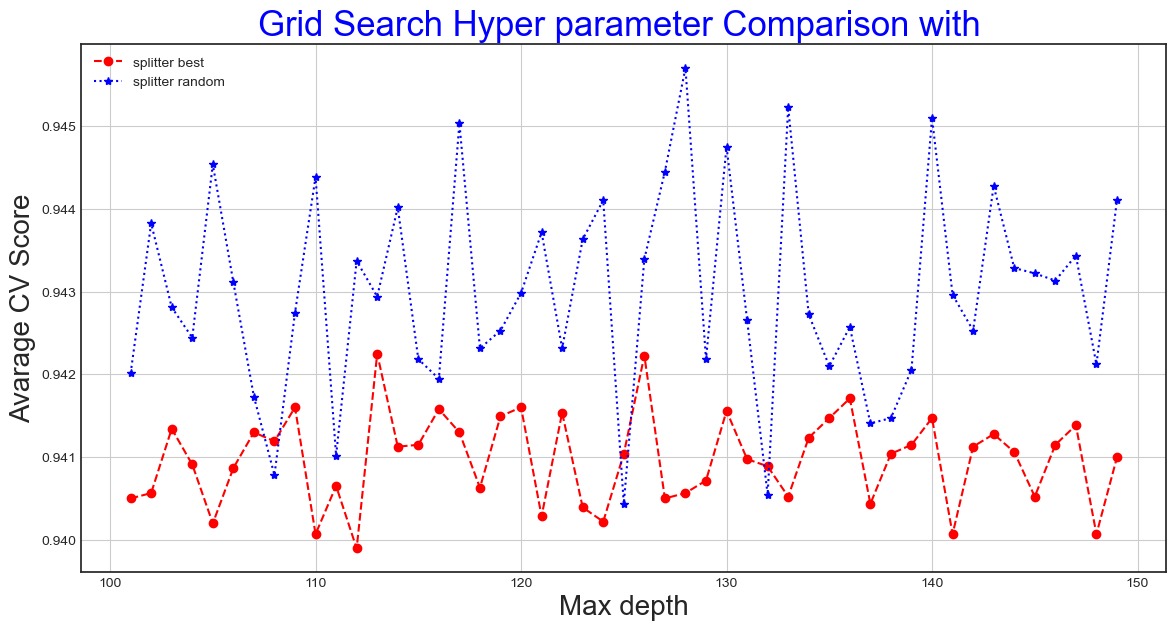

In [191]:
best = []  # a empty list is created
for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all even number 
                                                                       # indexes using a for loop.
    if grid_search.cv_results_["param_splitter"][i] == "best":

        best.append(grid_search.cv_results_["mean_test_score"][i])  # appending the best values to the
                                                                      # varibale best.

random = []  # a empty list is created
for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                       # using a for loop.
    if grid_search.cv_results_["param_splitter"][i] == "random":
        random.append(grid_search.cv_results_["mean_test_score"][i])  # appending the random values to the 
                                                                    # varibale random.





plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Grid Search Hyper parameter Comparison with ", fontsize=25, color="blue")  # setting the plot title.
plt.plot(max_depth_list,best , "--", marker = "o", label="splitter best", color="red")  # setting the best
plt.plot(max_depth_list,random ,":", marker = "*", label="splitter random", color="blue")  # setting the random 
                                                # variables values to the plot on the y axis and max depth on the x axis.
plt.xlabel('Max depth',fontsize=20)  # Setting the x label.
plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
plt.legend(loc='upper left')  # setting the legend.
plt.grid()  # setting a grid

#  X and y obtained by using Corelation matrix

## Grid Search

In [194]:
min_samples_split_list = list(range(2,50))  # a list with values specified.
splitter_list =   ['best', 'random']   # a list with values specified.

para_grid = dict(min_samples_split = min_samples_split_list, splitter = splitter_list)  # adding the above 
                                                                                                       # lists in a dictinary.
grid_search = Grid_search_fun(DecisionTreeClassifier(min_samples_leaf = 10, max_leaf_nodes = 20, \
                                        min_weight_fraction_leaf = 0.0,  max_depth = 3, criterion = 'entropy', \
                                        max_features = "sqrt"), para_grid, 5, X2, y)  # Using the grid search gunction with 

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.025406      0.002332         0.002195        0.000401   
1        0.024804      0.001936         0.002196        0.000398   
2        0.038801      0.010612         0.001803        0.000402   
3        0.031998      0.007240         0.002802        0.001719   
4        0.035514      0.006880         0.002001        0.000004   
..            ...           ...              ...             ...   
91       0.029061      0.008137         0.002996        0.001545   
92       0.027660      0.004629         0.002529        0.000449   
93       0.028556      0.006612         0.003400        0.002330   
94       0.038195      0.010537         0.002004        0.000008   
95       0.029600      0.007043         0.001993        0.000631   

   param_min_samples_split param_splitter  \
0                        2           best   
1                        2         random   
2                        3           best   
3  

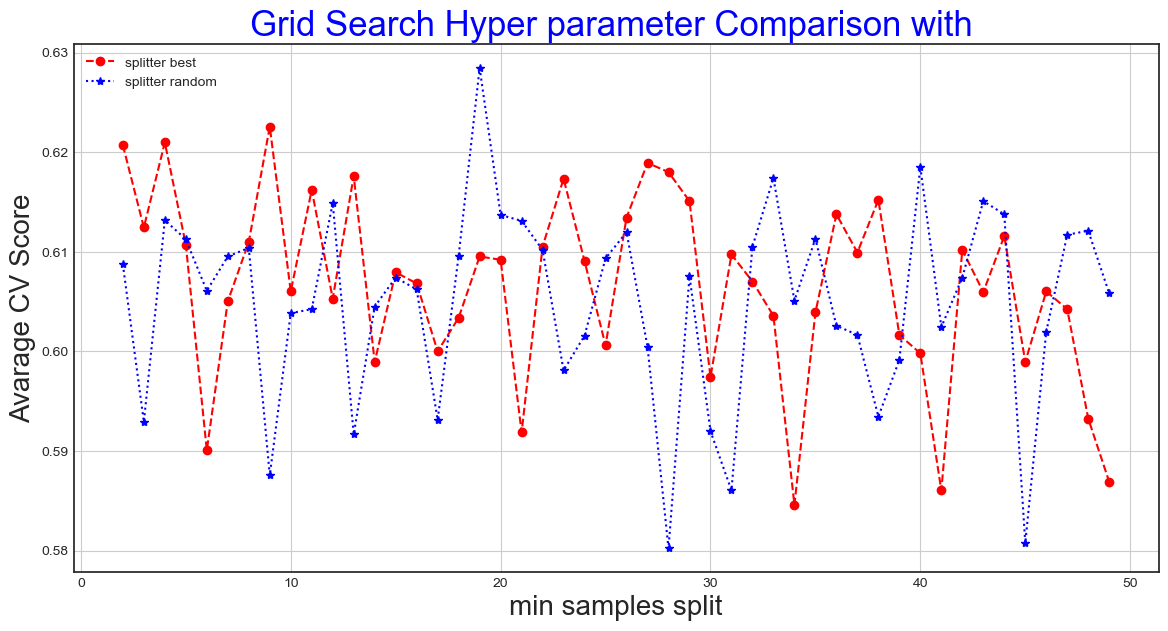

In [195]:
best = []  # a empty list is created
for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all even number 
                                                                       # indexes using a for loop.
    if grid_search.cv_results_["param_splitter"][i] == "best":

        best.append(grid_search.cv_results_["mean_test_score"][i])  # appending the best values to the
                                                                      # varibale best.

random = []  # a empty list is created
for i in range(len(grid_search.cv_results_["mean_test_score"])):  # getting all odd number indexes 
                                                                       # using a for loop.
    if grid_search.cv_results_["param_splitter"][i] == "random":
        random.append(grid_search.cv_results_["mean_test_score"][i])  # appending the random values to the 
                                                                    # varibale random.





plt.figure(dpi=100, figsize=(14, 7))  # setting the plot size
plt.title("Grid Search Hyper parameter Comparison with ", fontsize=25, color="blue")  # setting the plot title.
plt.plot(min_samples_split_list,best , "--", marker = "o", label="splitter best", color="red")  # setting the best
plt.plot(min_samples_split_list,random ,":", marker = "*", label="splitter random", color="blue")  # setting the random 
                                                # variables values to the plot on the y axis and max depth on the x axis.
plt.xlabel('min samples split',fontsize=20)  # Setting the x label.
plt.ylabel("Avarage CV Score",fontsize=20)  # setting the y label.
plt.legend(loc='upper left')  # setting the legend.
plt.grid()  # setting a grid

# X and y un_edited

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

  results
pred-Actual
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 4]]
Model train accuracy:  62.0 %
Model test accuracy:  61.0 %



              precision    recall  f1-score   support

           0       0.61      1.00      0.76      1838
           1       0.00      0.00      0.00       598
           2       0.33      0.01      0.02       438
           3       0.00      0.00      0.00       119
           4       0.00      0.00      0.00        29

    accuracy                           0.61      3022
   macro avg       0.19      0.20      0.16      3022
weighted avg       0.42      0.61      0.46      3022



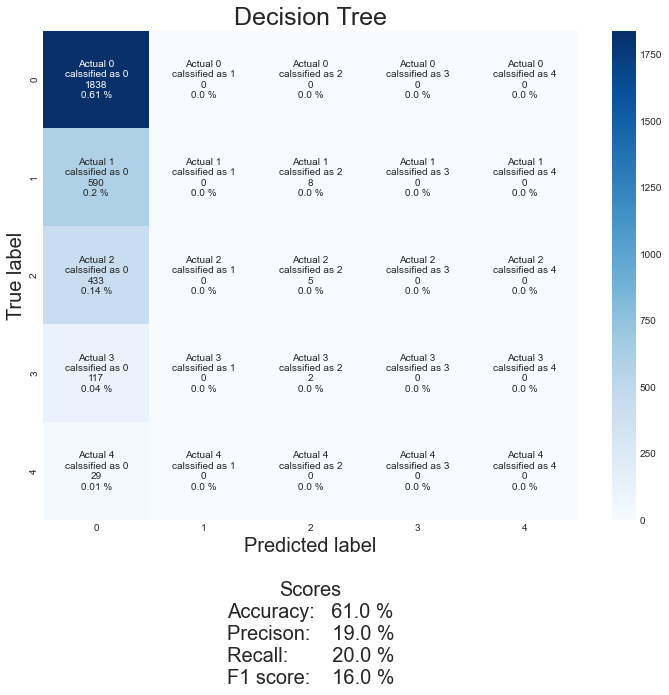

Area under the curve:  0.5903999964274903


(62.0, 61.0, 19.0, 20.0, 16.0)

In [133]:
Classifier_function(DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,  max_depth = 4, criterion = 'entropy', \
                                       max_features = "auto", splitter = "random", max_leaf_nodes = 6, \
                                       min_samples_leaf = 33, min_samples_split = 31), X_train, y_train,X_test,\
                                       y_test, "Decision Tree")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results after feature scaling

# StandardScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

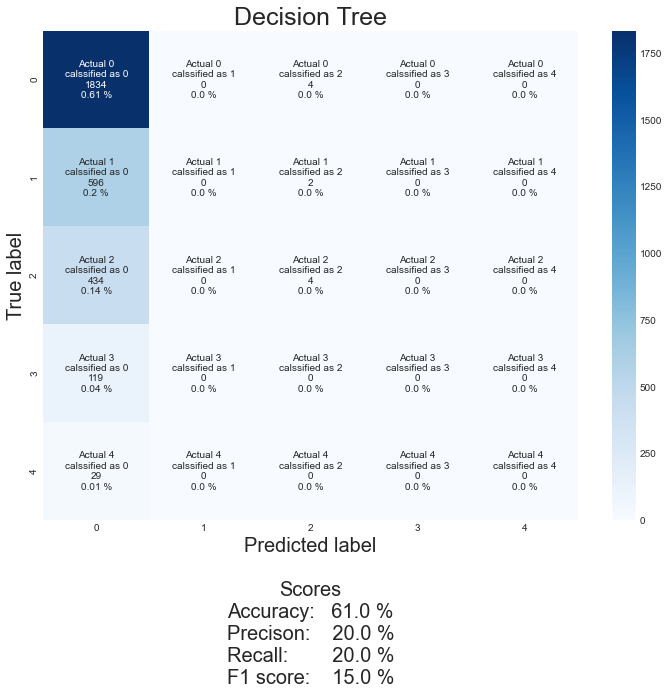

Area under the curve:  0.6850561595765677


In [134]:
featurescaling(StandardScaler(), X_train, X_test, y_train, y_test,DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,\
                                       max_depth = 4, criterion = 'entropy', max_features = "auto",\
                                       splitter = "random", max_leaf_nodes = 6,min_samples_leaf = 33,\
                                       min_samples_split = 31) ,"Decision Tree")

    # performs standard scaling
    # Performs traing, testing prediction.
    # performs precision, recall, f1-score and support prediction
    # plots a confusion matrix
    # returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

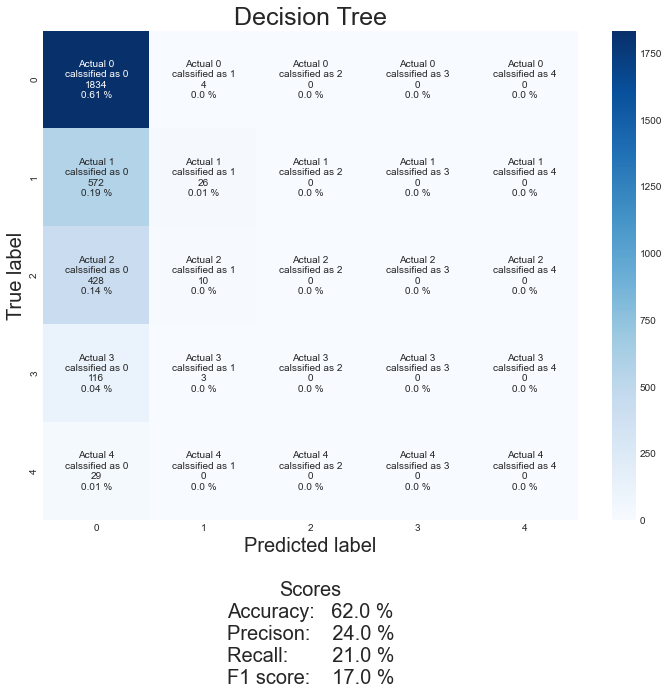

Area under the curve:  0.6825208233942515


In [135]:
featurescaling(MinMaxScaler(), X_train, X_test, y_train, y_test, DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,\
                                       max_depth = 4, criterion = 'entropy', max_features = "auto",\
                                       splitter = "random", max_leaf_nodes = 6,min_samples_leaf = 33,\
                                       min_samples_split = 31) ,"Decision Tree")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

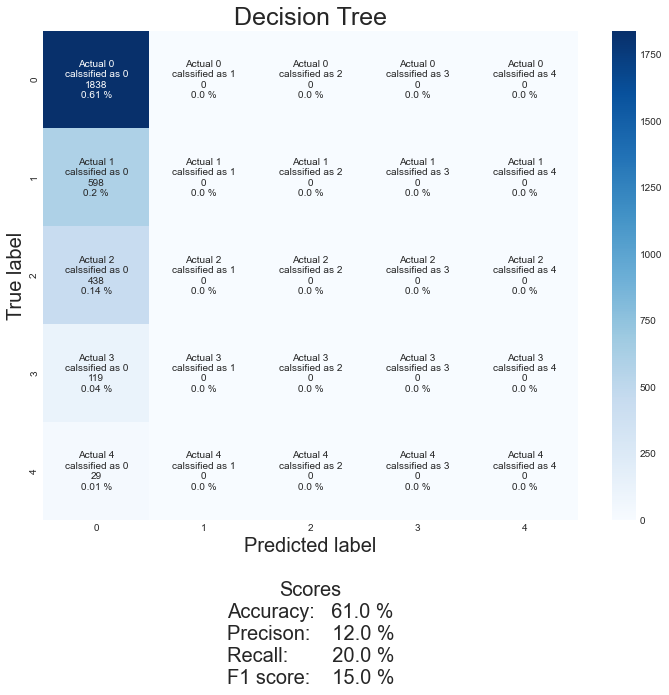

Area under the curve:  0.6350924703812911


In [136]:
featurescaling(RobustScaler(), X_train, X_test, y_train, y_test,DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,\
                                       max_depth = 4, criterion = 'entropy', max_features = "auto",\
                                       splitter = "random", max_leaf_nodes = 6,min_samples_leaf = 33,\
                                       min_samples_split = 31) ,"Decision Tree")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

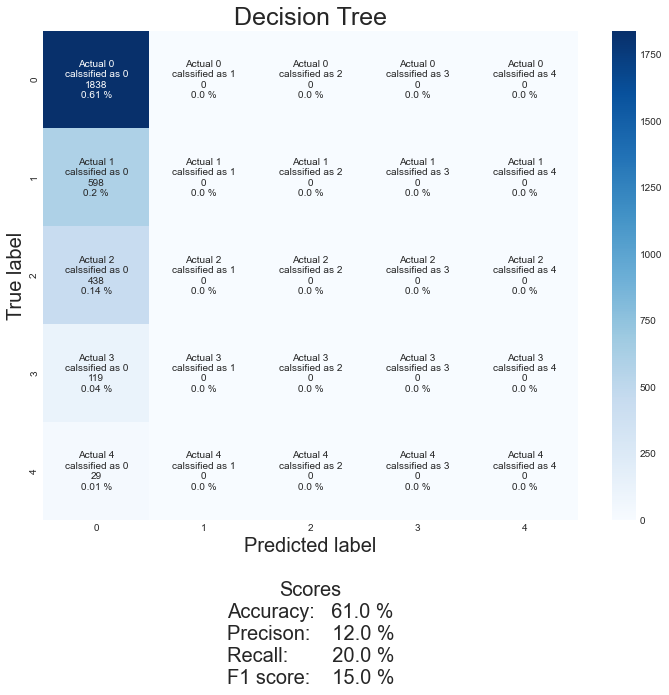

Area under the curve:  0.6569739516333468


In [137]:
featurescaling(Normalizer(), X_train, X_test, y_train, y_test, DecisionTreeClassifier(min_weight_fraction_leaf = 0.0,\
                                       max_depth = 4, criterion = 'entropy', max_features = "auto",\
                                       splitter = "random", max_leaf_nodes = 6,min_samples_leaf = 33,\
                                       min_samples_split = 31) ,"Decision Tree")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Over Sampled X and y values

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1942
           1       0.95      0.99      0.97      1840
           2       0.99      0.99      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



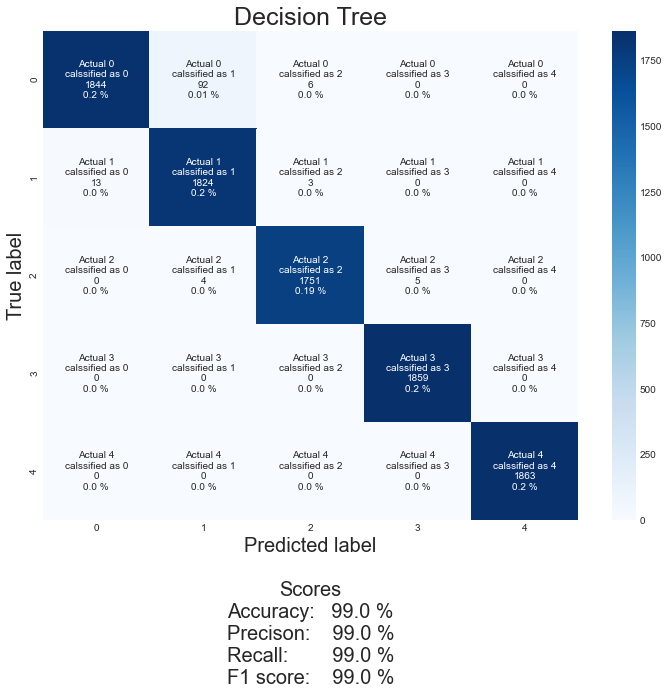

Area under the curve:  0.9919146186256651


(100.0, 99.0, 99.0, 99.0, 99.0)

In [141]:
Classifier_function(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_leaf_nodes = None, \
                                    min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
                                    max_depth =  121, splitter = 'random'), X_train_over, y_train_over, X_test_over,\
                                    y_test_over, "Decision Tree")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Feature scaling

# StandardScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

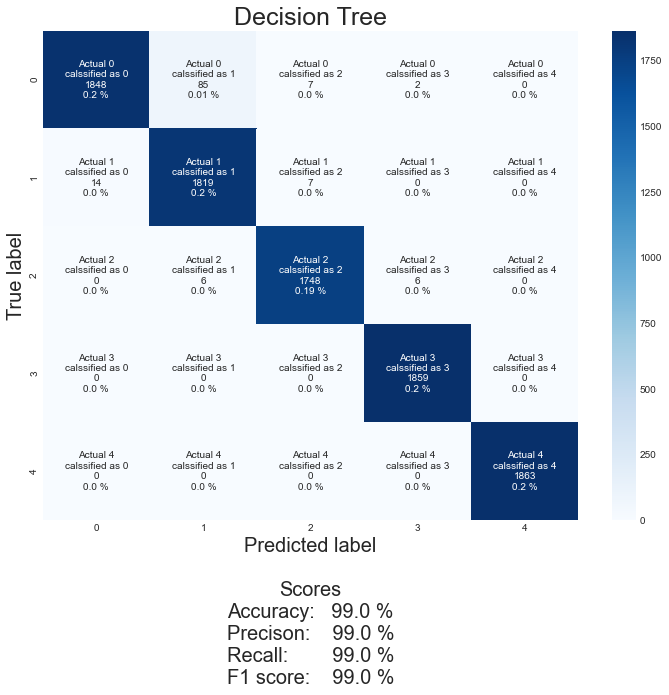

Area under the curve:  0.9916249455437083


In [151]:
featurescaling(StandardScaler(), X_train_over, X_test_over, y_train_over, \
               y_test_over,DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random'), "Decision Tree")

# performs standard scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# MinMaxScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

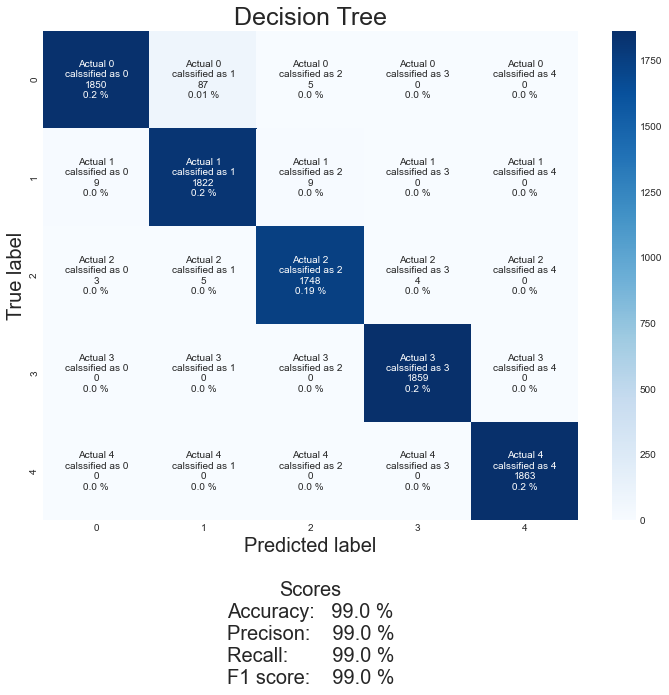

Area under the curve:  0.9919588383031017


In [150]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over,\
               y_test_over,DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random') ,"Decision Tree")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# RobustScaler

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

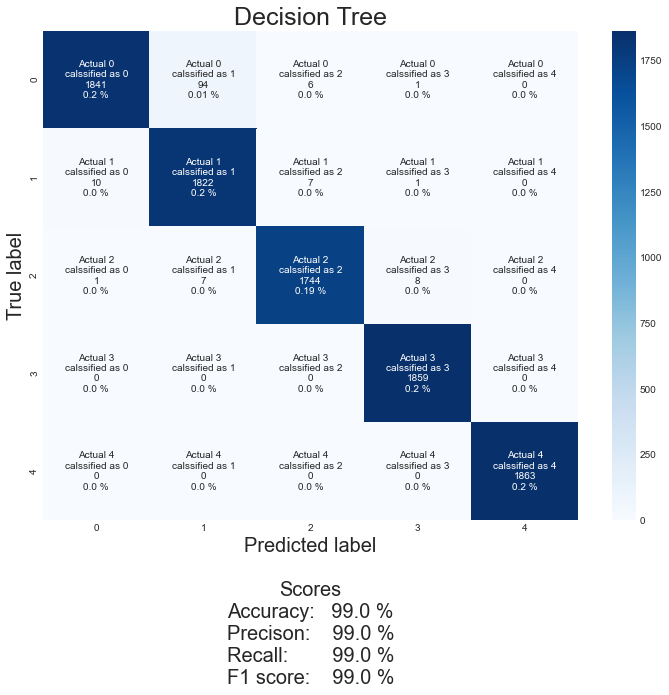

Area under the curve:  0.991092854737812


In [149]:
featurescaling(RobustScaler(), X_train_over, X_test_over, y_train_over,\
               y_test_over,DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random') ,"Decision Tree")
# performs robust scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Normalizer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

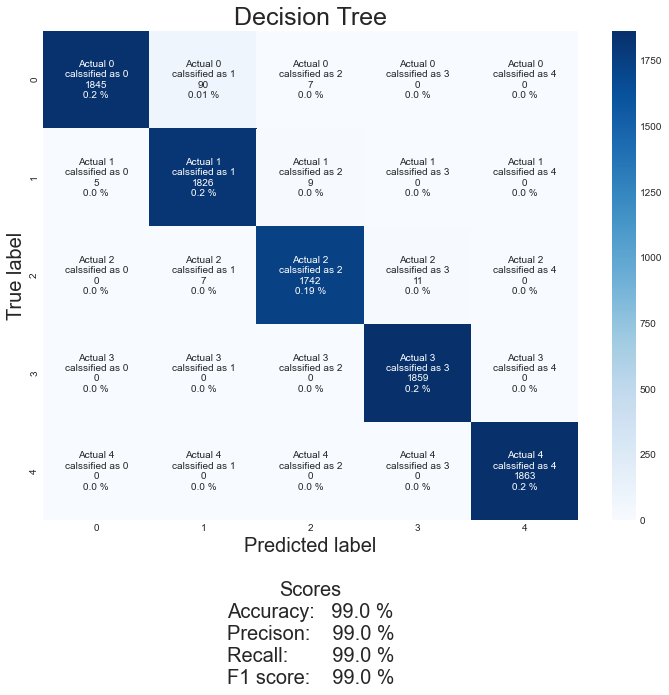

Area under the curve:  0.991484923969203


In [148]:
featurescaling(Normalizer(), X_train_over, X_test_over, y_train_over,\
               y_test_over,DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random') ,"Decision Tree")
# Performs normalization scaling 
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

#  X and y obtained by using Corelation matrix

# Without any model Tuning

## Checking predicted/actual results
## Checking testing and traning scores
## Checking Actual values classified correctly and wrongly.
## Checking accuracy, precision, recall and f1 scores

  results
pred-Actual
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 4]]
Model train accuracy:  62.0 %
Model test accuracy:  62.0 %



              precision    recall  f1-score   support

           0       0.62      1.00      0.76      1838
           1       0.00      0.00      0.00       598
           2       0.62      0.01      0.02       438
           3       0.46      0.16      0.24       119
           4       0.33      0.17      0.23        29

    accuracy                           0.62      3022
   macro avg       0.41      0.27      0.25      3022
weighted avg       0.49      0.62      0.48      3022



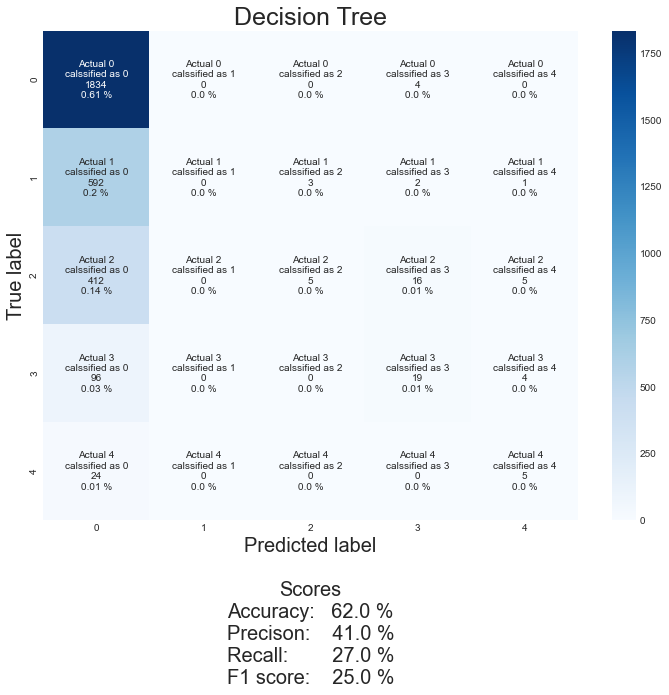

Area under the curve:  0.6842534173575627


(62.0, 62.0, 41.0, 27.0, 25.0)

In [152]:
Classifier_function(DecisionTreeClassifier(min_samples_leaf = 10, max_leaf_nodes = 20, min_weight_fraction_leaf = 0.0,\
                                           max_depth = 3, criterion = 'entropy',max_features = "sqrt",\
                                           min_samples_split = 2, splitter = 'best'), X2_train, y2_train,X2_test, \
                                           y2_test, "Decision Tree")
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Results

# Original Results without hyperparameter Improvement

  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  98.0 %



              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1942
           1       0.94      0.99      0.97      1840
           2       0.99      0.99      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.98      9264
   macro avg       0.98      0.98      0.98      9264
weighted avg       0.98      0.98      0.98      9264



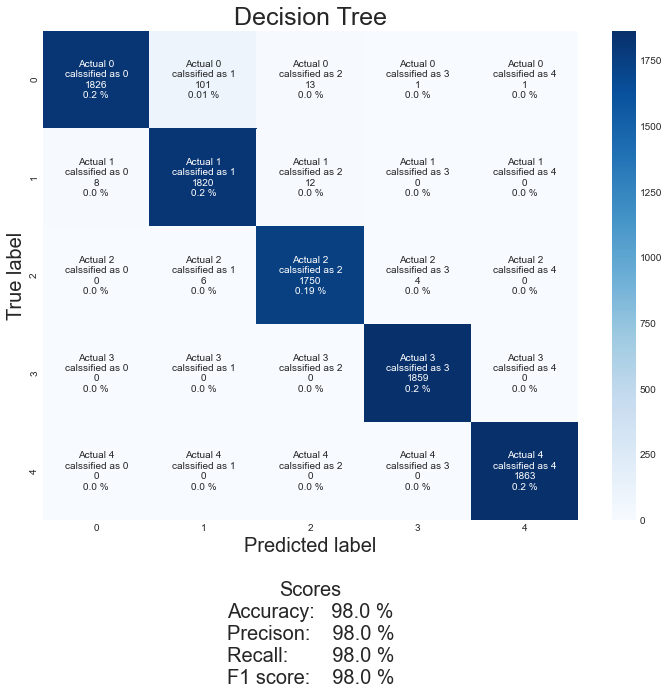

Area under the curve:  0.9904069175797543


(100.0, 98.0, 98.0, 98.0, 98.0)

In [153]:
Classifier_function(DecisionTreeClassifier(), X_train_over, y_train_over, X_test_over, y_test_over, "Decision Tree")  
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

# Best Score and model

# Over Sampled X and y values

# MinMaxScaler

# Results with hyparameters improved

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

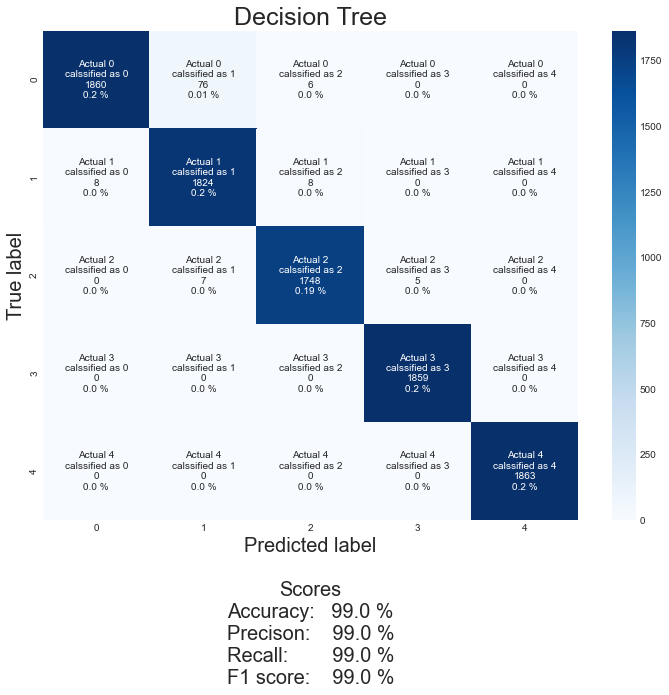

Area under the curve:  0.9927448209558734


In [154]:
featurescaling(MinMaxScaler(), X_train_over, X_test_over, y_train_over,\
               y_test_over,DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random') ,"Decision Tree")
# performs Minmax scaling
# Performs traing, testing prediction.
# performs precision, recall, f1-score and support prediction
# plots a confusion matrix
# returns the traing, testing, precision, recall, f1-score

In [157]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 65 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Argentina                                             15110 non-null  int32  
 1   Armenia                                               15110 non-null  int32  
 2   Australia                                             15110 non-null  int32  
 3   Austria                                               15110 non-null  int32  
 4   Azerbaijan                                            15110 non-null  int32  
 5   Belgium                                               15110 non-null  int32  
 6   Brazil                                                15110 non-null  int32  
 7   Bulgaria                                              15110 non-null  int32  
 8   Canada                                                15

# Un_edited full model evaluation

when Random state =  1
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  98.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1942
           1       0.95      0.98      0.97      1840
           2       0.98      1.00      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.98      9264
   macro avg       0.98      0.98      0.98      9264
weighted avg       0.98      0.98      0.98      9264



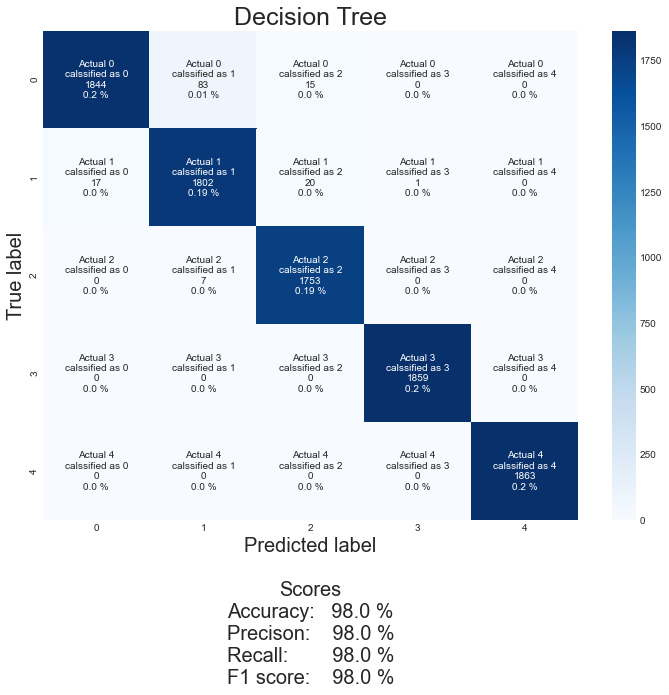

Area under the curve:  0.9905663275777329
when Random state =  1
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [3 3]
 [1 1]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1864
           1       0.96      0.99      0.98      1878
           2       0.99      0.99      0.99      1822
           3       1.00      1.00      1.00      1824
           4       1.00      1.00      1.00      1876

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



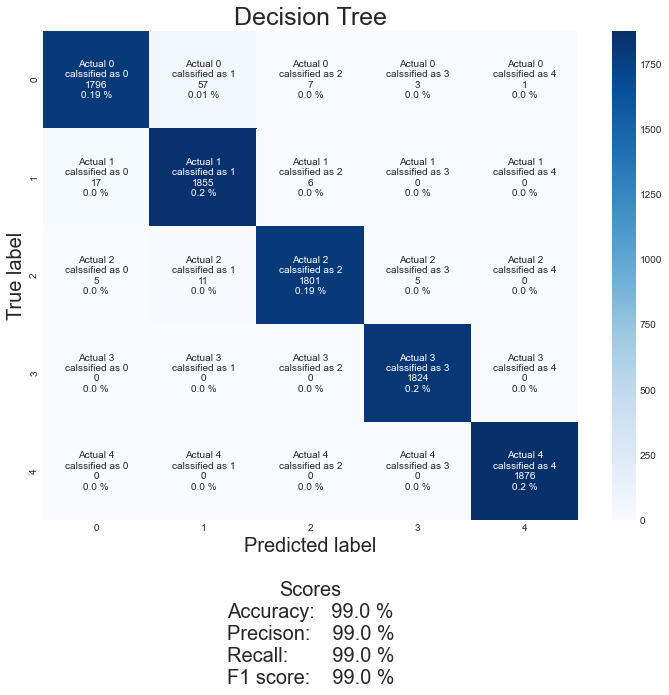

Area under the curve:  0.9924609400362941
when Random state =  1
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [2 2]
 [4 4]
 [2 2]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1874
           1       0.95      0.98      0.97      1828
           2       0.99      0.99      0.99      1838
           3       1.00      1.00      1.00      1872
           4       1.00      1.00      1.00      1852

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



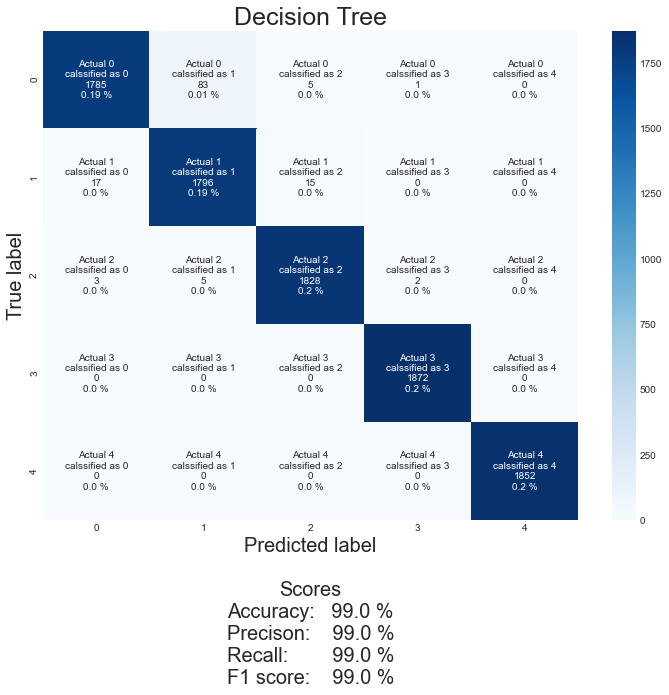

Area under the curve:  0.9911922073804259
when Random state =  1
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [3 3]
 [2 2]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1848
           1       0.96      0.99      0.97      1838
           2       0.99      0.99      0.99      1849
           3       1.00      1.00      1.00      1890
           4       1.00      1.00      1.00      1839

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



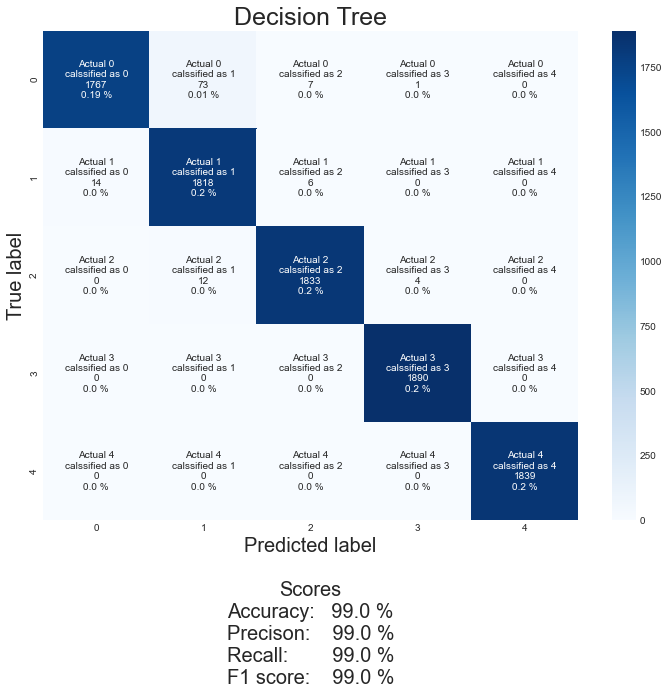

Area under the curve:  0.9920868771216714
when Random state =  1
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [0 1]
 [2 2]
 ...
 [4 4]
 [4 4]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  98.0 %



              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1836
           1       0.95      0.98      0.96      1803
           2       0.99      0.99      0.99      1896
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1893

    accuracy                           0.98      9264
   macro avg       0.98      0.98      0.98      9264
weighted avg       0.98      0.98      0.98      9264



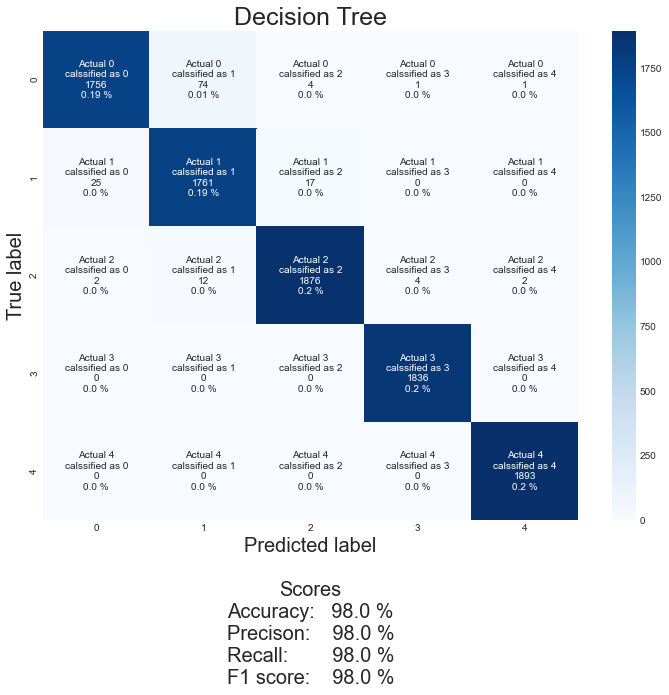

Area under the curve:  0.9903492190912067
when Random state =  7
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1942
           1       0.96      0.98      0.97      1840
           2       0.98      1.00      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



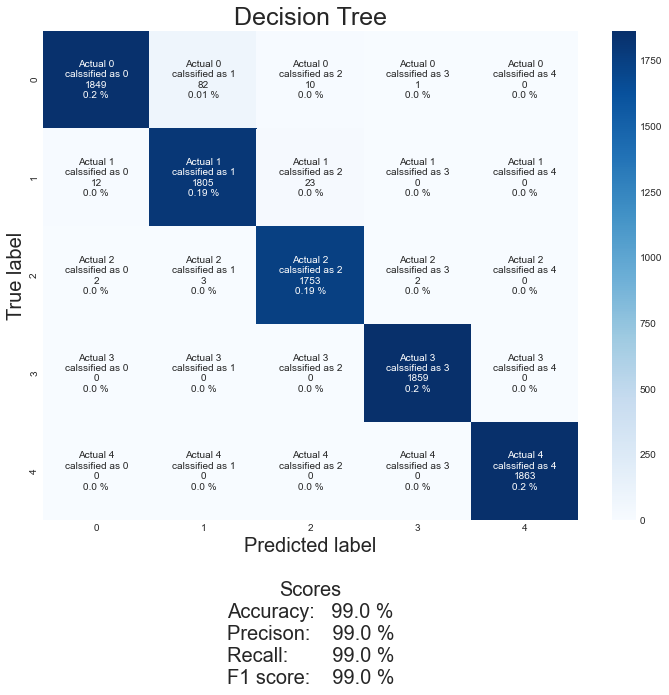

Area under the curve:  0.9910948028093582
when Random state =  7
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [3 3]
 [1 1]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1864
           1       0.96      0.99      0.97      1878
           2       0.99      0.99      0.99      1822
           3       1.00      1.00      1.00      1824
           4       1.00      1.00      1.00      1876

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



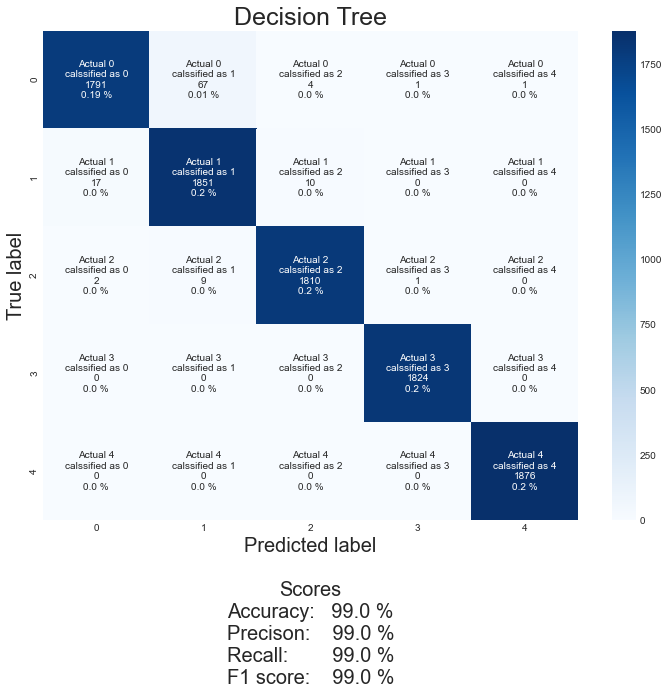

Area under the curve:  0.992473105255199
when Random state =  7
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 2]
 [4 4]
 [2 2]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1874
           1       0.95      0.98      0.97      1828
           2       0.99      0.99      0.99      1838
           3       1.00      1.00      1.00      1872
           4       1.00      1.00      1.00      1852

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



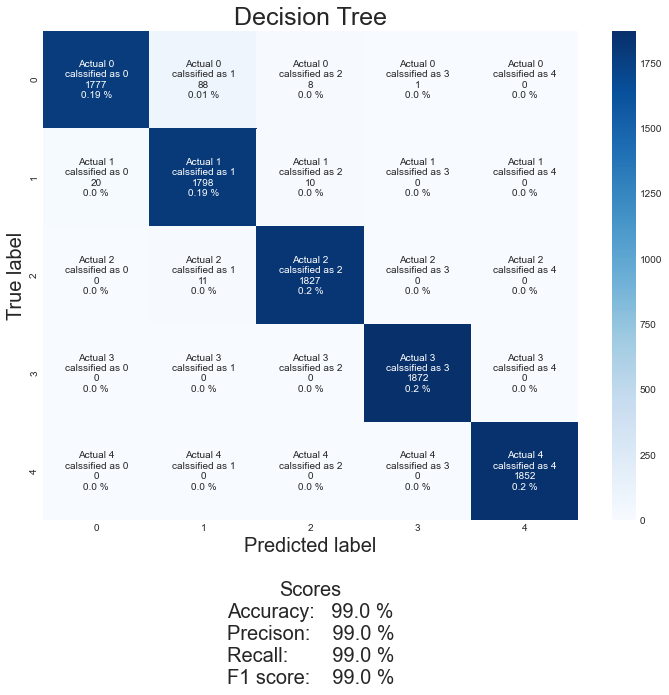

Area under the curve:  0.9907263749457069
when Random state =  7
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [3 3]
 [2 2]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  98.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1848
           1       0.95      0.98      0.96      1838
           2       0.98      0.99      0.99      1849
           3       1.00      1.00      1.00      1890
           4       1.00      1.00      1.00      1839

    accuracy                           0.98      9264
   macro avg       0.98      0.98      0.98      9264
weighted avg       0.98      0.98      0.98      9264



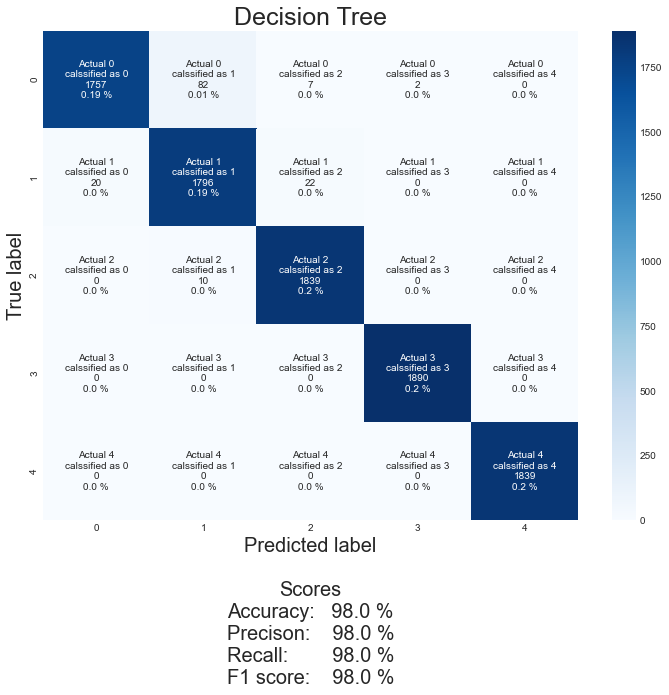

Area under the curve:  0.9903230332081858
when Random state =  7
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [1 1]
 [2 2]
 ...
 [4 4]
 [4 4]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1836
           1       0.95      0.98      0.97      1803
           2       0.99      1.00      0.99      1896
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1893

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.98      9264
weighted avg       0.99      0.99      0.99      9264



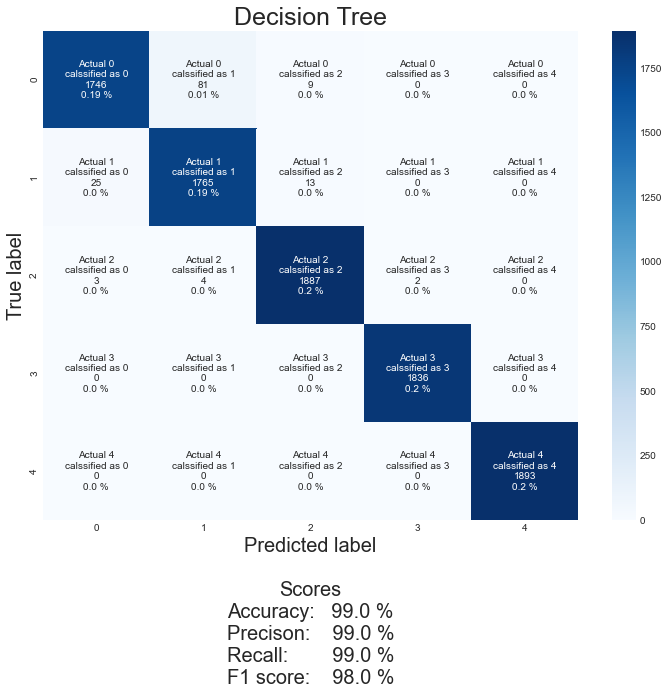

Area under the curve:  0.9906740340400653
when Random state =  26
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1942
           1       0.95      0.98      0.97      1840
           2       0.99      0.99      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



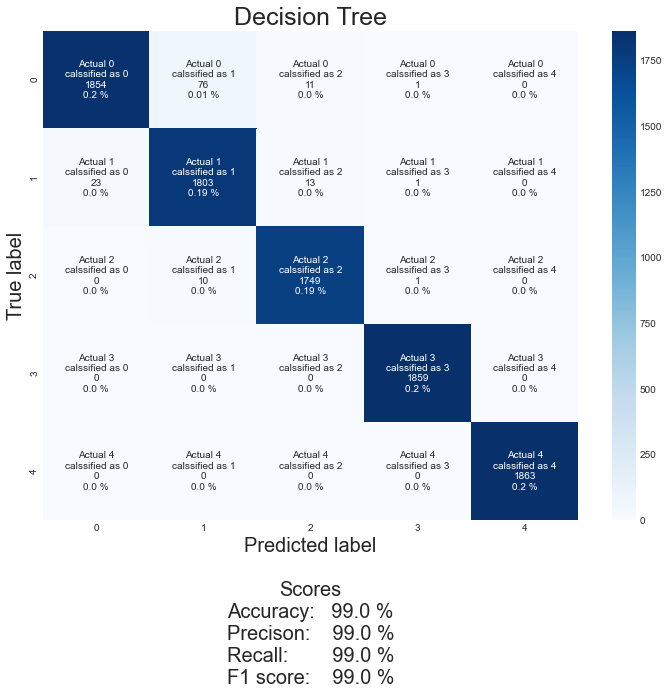

Area under the curve:  0.9909998499300636
when Random state =  26
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [3 3]
 [1 1]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1864
           1       0.97      0.98      0.97      1878
           2       0.99      1.00      0.99      1822
           3       1.00      1.00      1.00      1824
           4       1.00      1.00      1.00      1876

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



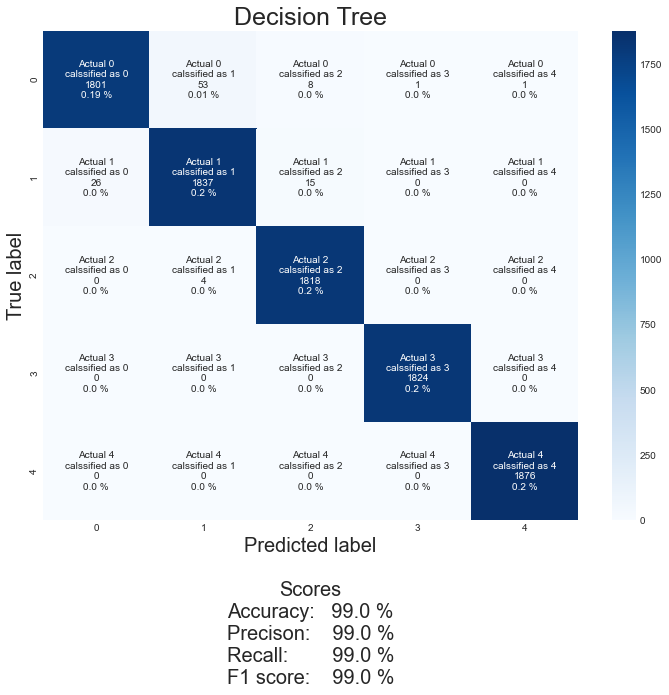

Area under the curve:  0.9927583444364938
when Random state =  26
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [2 2]
 [4 4]
 [2 2]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1874
           1       0.95      0.99      0.97      1828
           2       0.99      0.99      0.99      1838
           3       1.00      1.00      1.00      1872
           4       1.00      1.00      1.00      1852

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



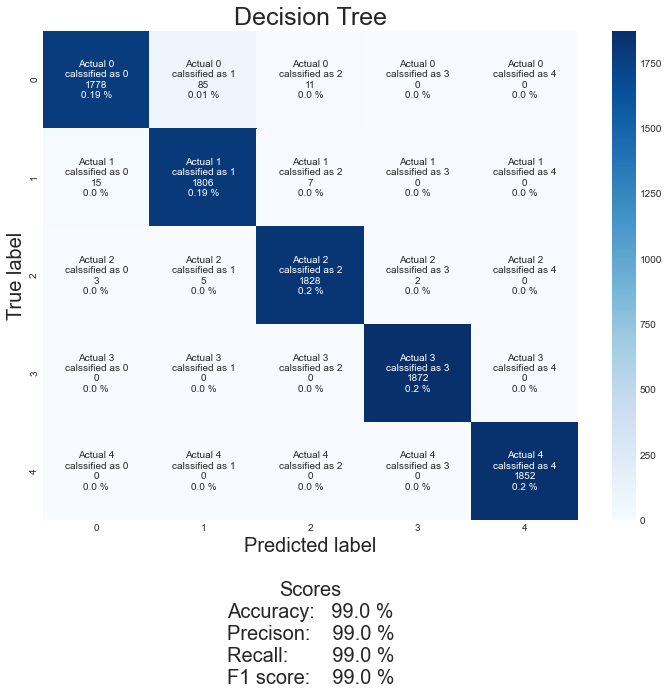

Area under the curve:  0.9914063487385135
when Random state =  26
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [3 3]
 [2 2]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1848
           1       0.95      0.99      0.97      1838
           2       0.99      1.00      0.99      1849
           3       1.00      1.00      1.00      1890
           4       1.00      1.00      1.00      1839

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



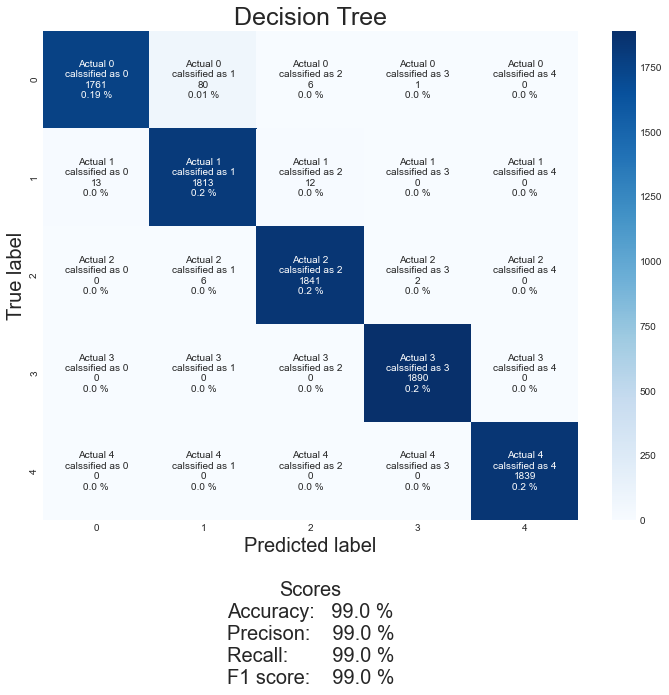

Area under the curve:  0.9918825428792827
when Random state =  26
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [1 1]
 [2 2]
 ...
 [4 4]
 [4 4]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1836
           1       0.96      0.98      0.97      1803
           2       0.99      1.00      0.99      1896
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1893

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



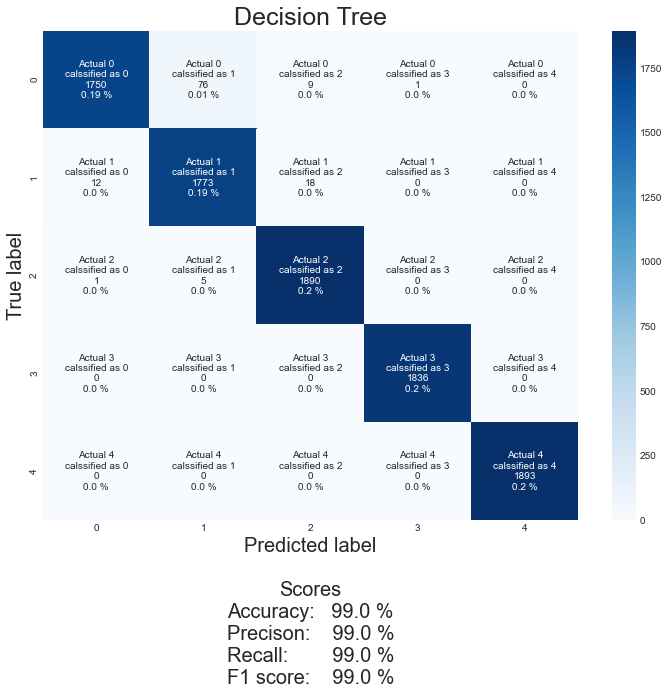

Area under the curve:  0.9916949840285465
when Random state =  14
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1942
           1       0.95      0.98      0.97      1840
           2       0.98      1.00      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



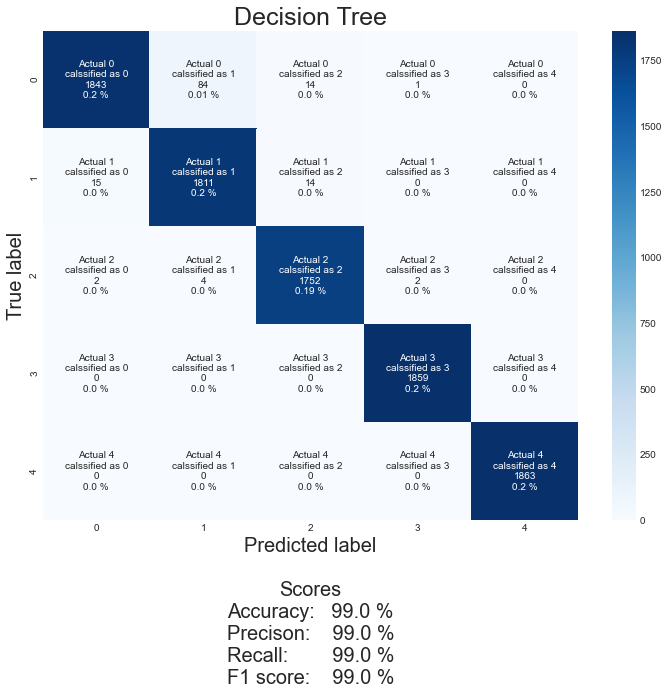

Area under the curve:  0.9910403609842364
when Random state =  14
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [3 3]
 [1 1]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1864
           1       0.96      0.97      0.97      1878
           2       0.98      0.99      0.99      1822
           3       1.00      1.00      1.00      1824
           4       1.00      1.00      1.00      1876

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



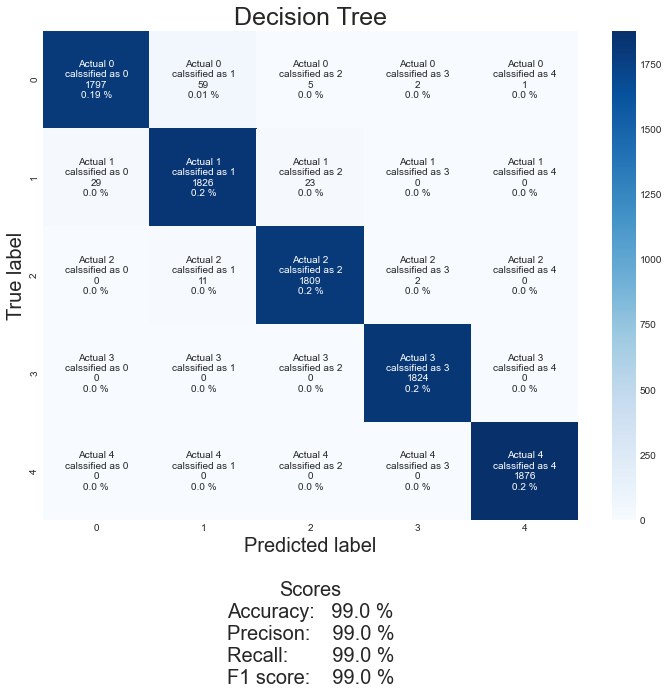

Area under the curve:  0.9911400019574872
when Random state =  14
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [2 2]
 [4 4]
 [2 2]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1874
           1       0.96      0.98      0.97      1828
           2       0.99      0.99      0.99      1838
           3       1.00      1.00      1.00      1872
           4       1.00      1.00      1.00      1852

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



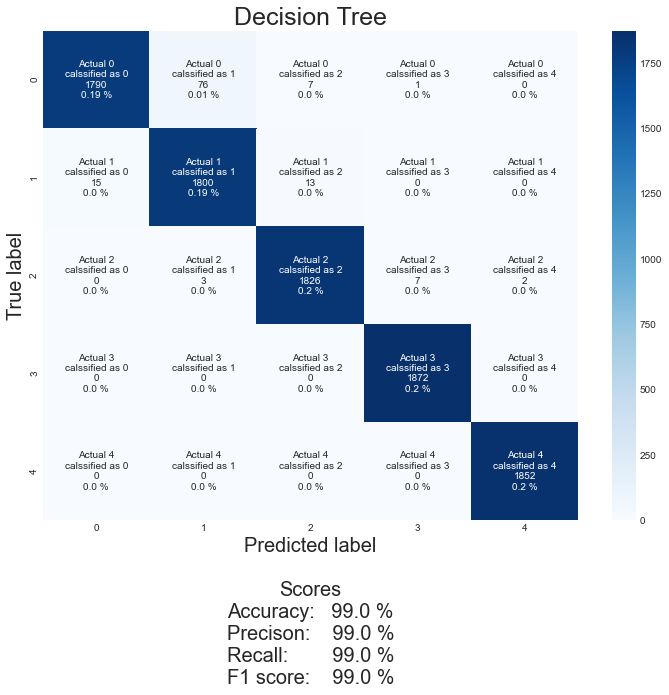

Area under the curve:  0.9916630886467426
when Random state =  14
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [3 3]
 [2 2]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1848
           1       0.96      0.98      0.97      1838
           2       0.99      1.00      0.99      1849
           3       1.00      1.00      1.00      1890
           4       1.00      1.00      1.00      1839

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



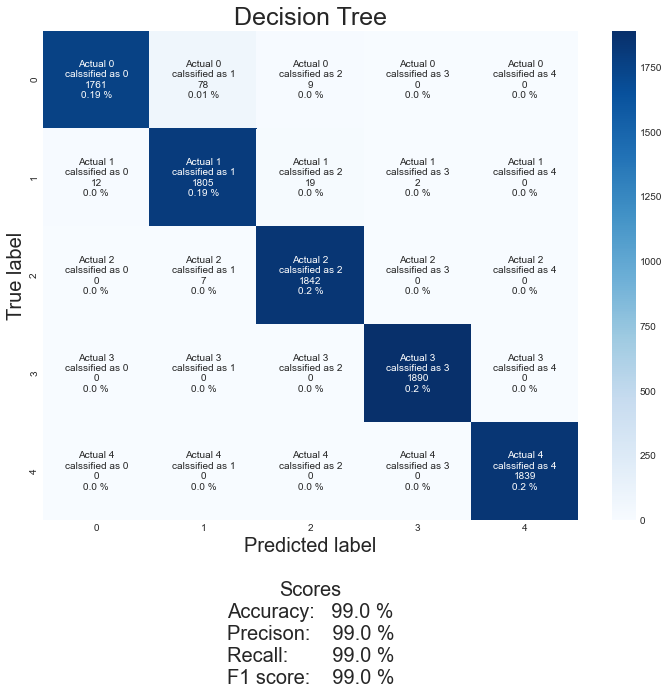

Area under the curve:  0.9914070204069445
when Random state =  14
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [1 1]
 [2 2]
 ...
 [4 4]
 [4 4]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  98.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1836
           1       0.95      0.98      0.96      1803
           2       0.99      0.99      0.99      1896
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1893

    accuracy                           0.98      9264
   macro avg       0.98      0.98      0.98      9264
weighted avg       0.98      0.98      0.98      9264



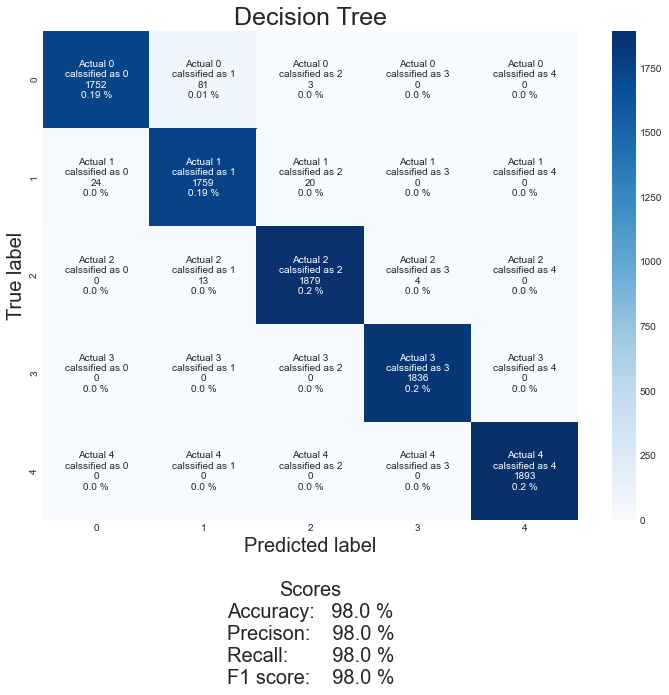

Area under the curve:  0.9901388374774545
when Random state =  66
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [4 4]
 [2 2]
 ...
 [2 2]
 [3 3]
 [0 0]]
Model train accuracy:  100.0 %
Model test accuracy:  98.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1942
           1       0.95      0.98      0.97      1840
           2       0.98      0.99      0.99      1760
           3       1.00      1.00      1.00      1859
           4       1.00      1.00      1.00      1863

    accuracy                           0.98      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.98      0.98      9264



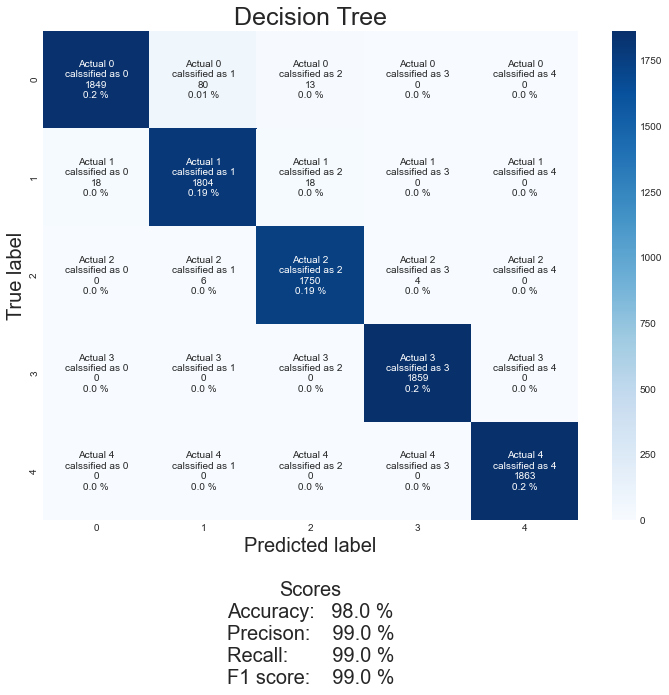

Area under the curve:  0.990815048790784
when Random state =  66
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[3 3]
 [3 3]
 [1 1]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1864
           1       0.96      0.98      0.97      1878
           2       0.99      1.00      0.99      1822
           3       1.00      1.00      1.00      1824
           4       1.00      1.00      1.00      1876

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



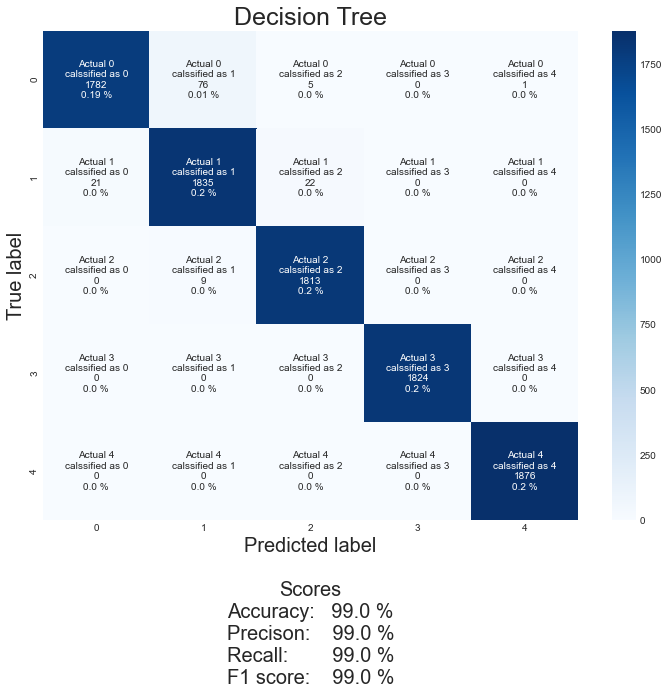

Area under the curve:  0.9910062749982659
when Random state =  66
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[1 1]
 [1 1]
 [1 1]
 ...
 [2 2]
 [4 4]
 [2 2]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1874
           1       0.95      0.99      0.97      1828
           2       0.99      1.00      0.99      1838
           3       1.00      1.00      1.00      1872
           4       1.00      1.00      1.00      1852

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



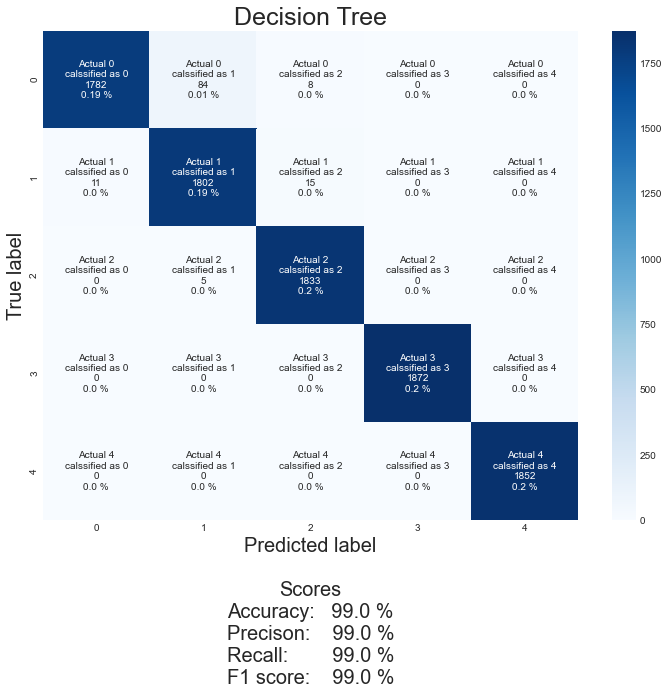

Area under the curve:  0.9917409083163925
when Random state =  66
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [3 3]
 [2 2]
 ...
 [3 3]
 [1 1]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1848
           1       0.96      0.98      0.97      1838
           2       0.99      0.99      0.99      1849
           3       1.00      1.00      1.00      1890
           4       1.00      1.00      1.00      1839

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



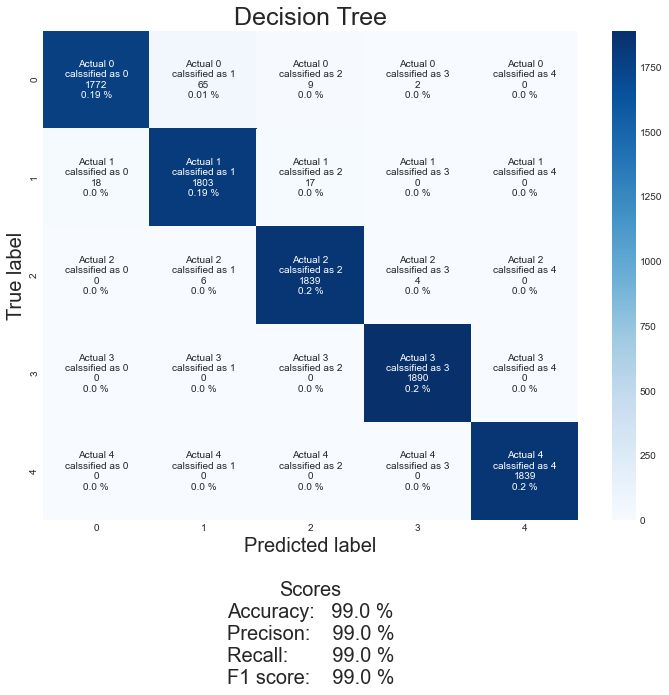

Area under the curve:  0.9918115430680746
when Random state =  66
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
  results
pred-Actual
[[2 2]
 [1 1]
 [2 2]
 ...
 [4 4]
 [4 4]
 [3 3]]
Model train accuracy:  100.0 %
Model test accuracy:  99.0 %



              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1836
           1       0.96      0.99      0.97      1803
           2       0.99      1.00      0.99      1896
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1893

    accuracy                           0.99      9264
   macro avg       0.99      0.99      0.99      9264
weighted avg       0.99      0.99      0.99      9264



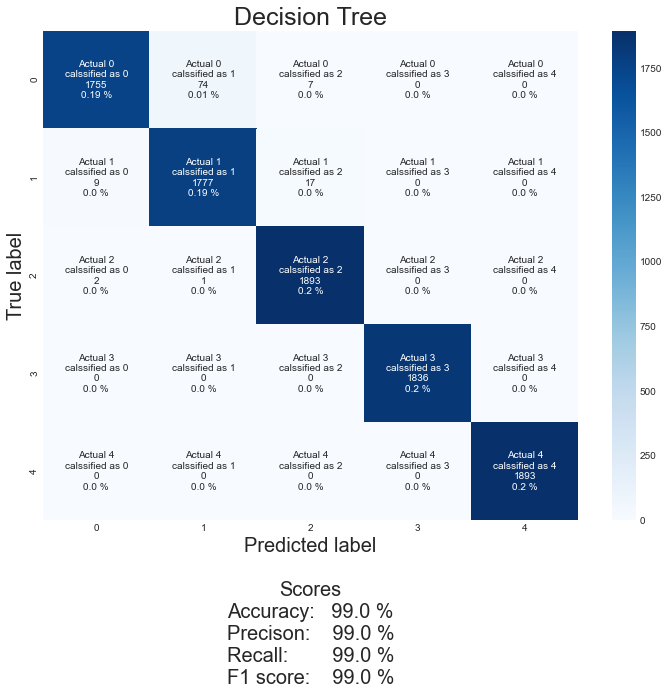

Area under the curve:  0.9925089180084583


Cross Valadation Results
Accuracy: 93.03 %
Standard Deviation: 1.13 %


Area_under_the_curve  0.9925089180084583
Standard Deviation :  0.0


Train Accuracy  100.0 %
Standard Deviation:  0.0 %

Test Accuracy  98.8 %
Standard Deviation:  0.4 %

precision  98.84 %
Standard Deviation:  0.36660605559646725 %

recall  98.84 %
Standard Deviation:  0.36660605559646725 %

f1_score  98.8 %
Standard Deviation:  0.4 %


In [162]:
un_edited_model_evaluation(DecisionTreeClassifier(),"Decision Tree") # function with argumnts given

In [173]:
crossvalscore(DecisionTreeClassifier(), X_over, y_over, 10)  # Performs cross validation.

Accuracy: 93.24 %
Standard Deviation: 0.91 %


'Accuracy: 93.24 %'

# Improved model full Evaluation with feature scaling

when Random state =  1
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.64687718e+01
  1.80745977e+00 5.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.80144659e+01
  3.00000000e+00 9.77000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.01091924e+01
  1.80745977e+00 6.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.11957117e+01
  2.84280000e+00 6.58610000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.09832874e+01
  3.79300000e+00 9.87000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+0

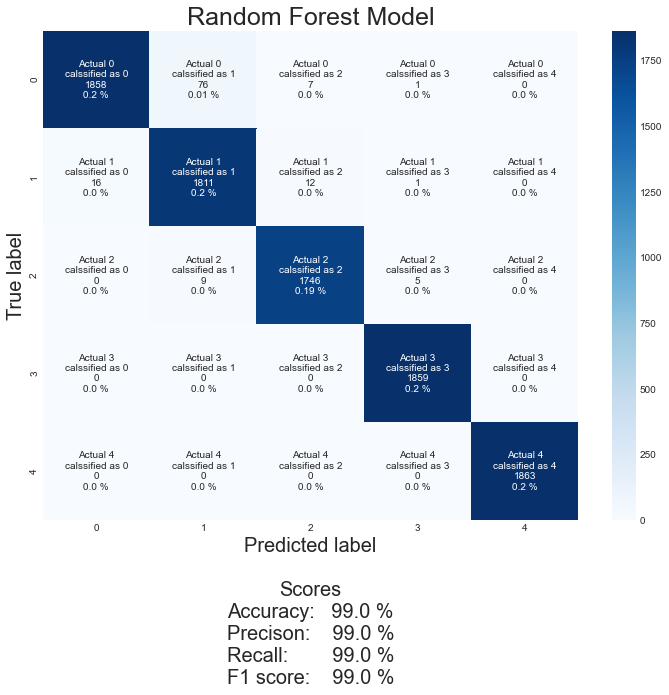

Area under the curve:  0.9915918369131853
when Random state =  1
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.30166253e+01
  1.80745977e+00 8.95790000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.43177307e+01
  3.70000000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.41951596e+01
  3.67460000e+00 1.01000000e+02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.68071278e+01
  3.64830000e+00 6.22000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.07535079e+01
  1.80745977e+00 9.53000000e+02]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.000

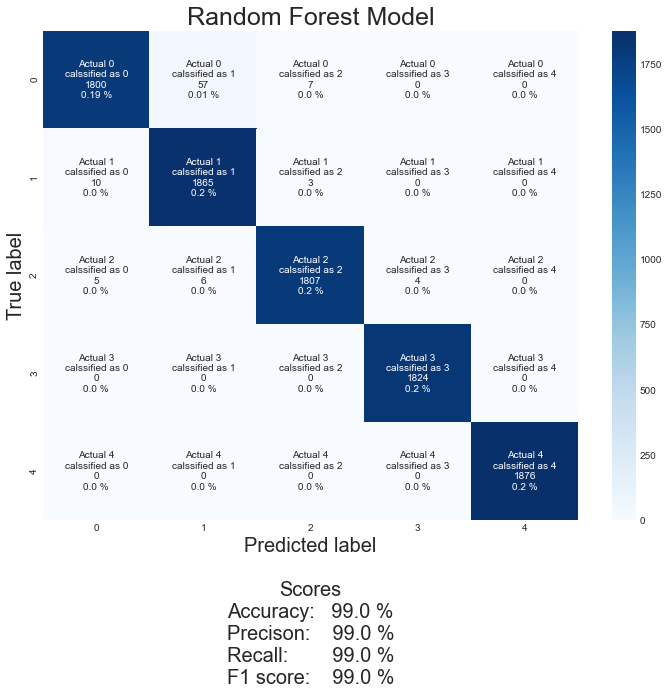

Area under the curve:  0.9938072230092981
when Random state =  1
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   27.84774971
     3.483       129.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...   19.6165586
     3.449      3122.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   42.86496326
     3.9          13.        ]] 

X_train  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  42.30401227   4.2
  164.        ]
 [  0.           0.   

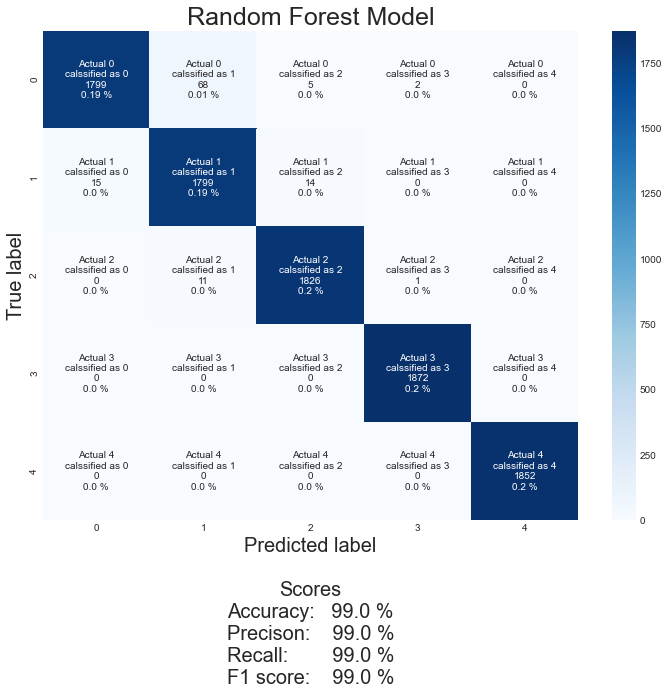

Area under the curve:  0.9921967303510142
when Random state =  1
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.83424435e+01
  1.80745977e+00 1.57000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.90928654e+01
  3.44000000e+00 1.14000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.60610202e+01
  1.76800000e+00 1.69780000e+04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.72585629e+01
  3.90000000e+00 1.21000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00

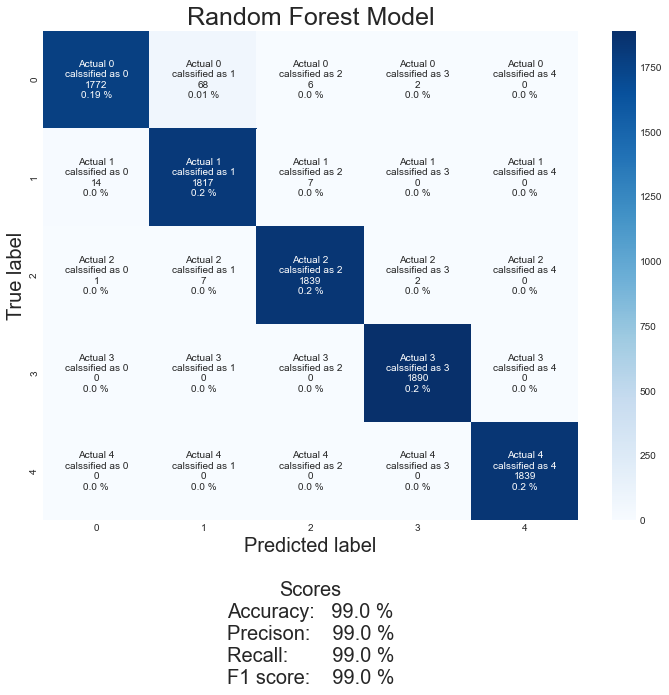

Area under the curve:  0.9927622714588011
when Random state =  1
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.97427516e+01
  2.95100000e+00 9.41480000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.03975661e+01
  2.97270000e+00 6.26060000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.16583838e+01
  3.20000000e+00 6.88000000e+02]
 [0.00000000e+00 0.00

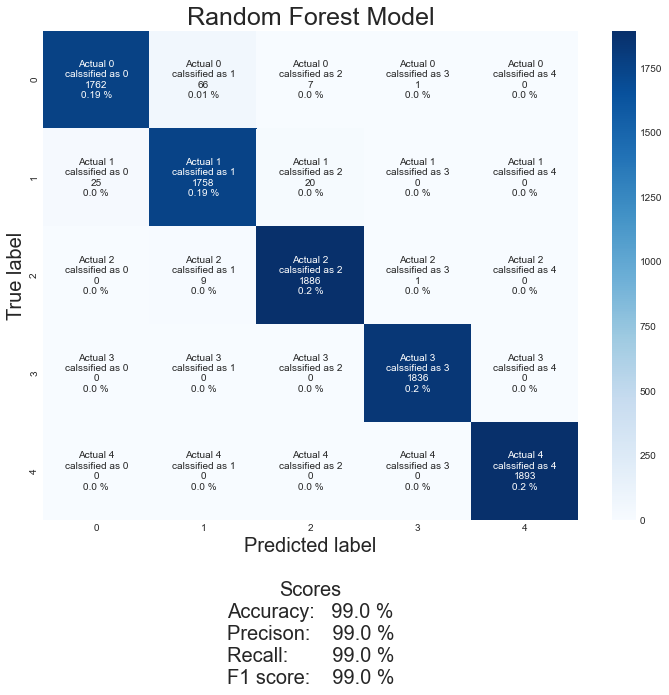

Area under the curve:  0.991211066292179
when Random state =  7
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   44.28322
     3.612      1614.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   36.79341075
     1.80745977   25.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]] 

X_train  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ... 34.63

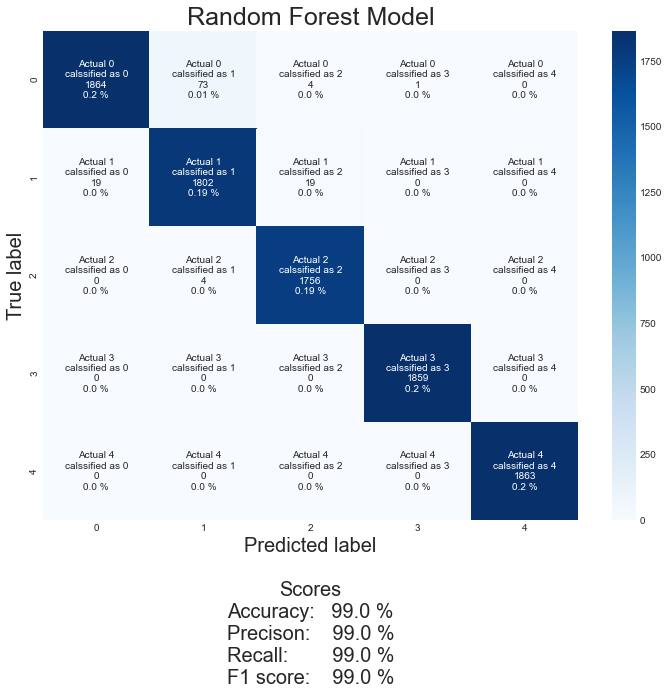

Area under the curve:  0.9920743557700934
when Random state =  7
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.73823552e+01
  1.80745977e+00 6.10000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99480999e+01
  4.00000000e+00 1.03037000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.87211973e+01
  3.30000000e+00 7.70000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.33505442e+01
  3.80000000e+00 1.60000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.000

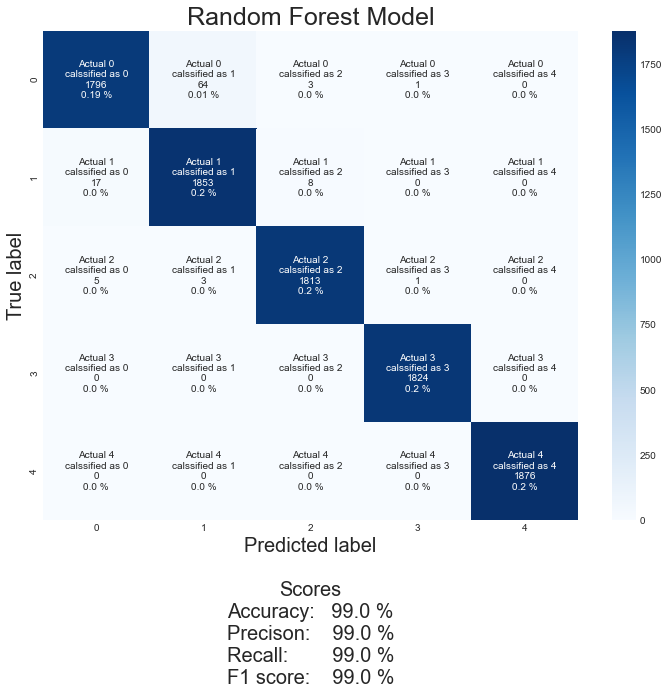

Area under the curve:  0.993147654916551
when Random state =  7
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.78477497e+01
  3.48300000e+00 1.29000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.26002806e+01
  2.54700000e+00 1.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.02534198e+01
  8.95600000e-01 1.70900000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67514192e+01
  3.38970000e+00 3.08300000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.000

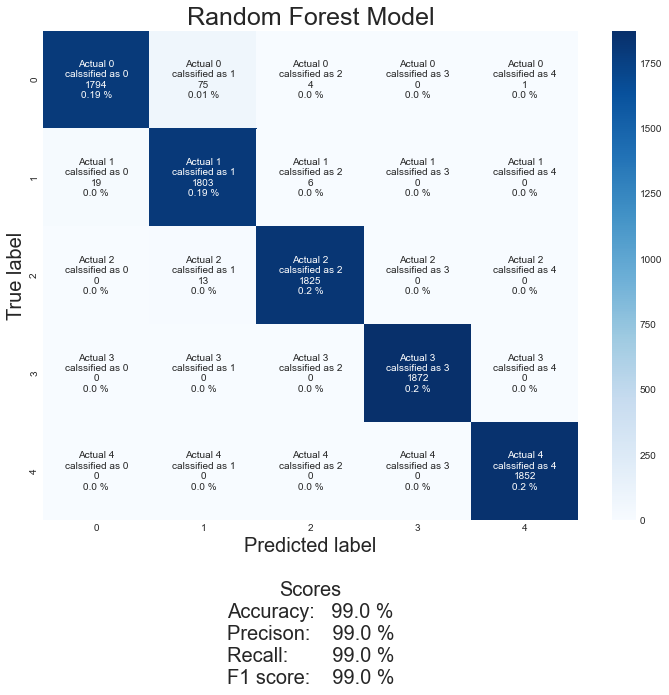

Area under the curve:  0.9920674613695717
when Random state =  7
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.43177307e+01
  3.70000000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.85377863e+01
  3.20000000e+00 3.30000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.17607287e+01
  1.80745977e+00 6.10000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.25352477e+01
  4.00000000e+00 9.16260000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00

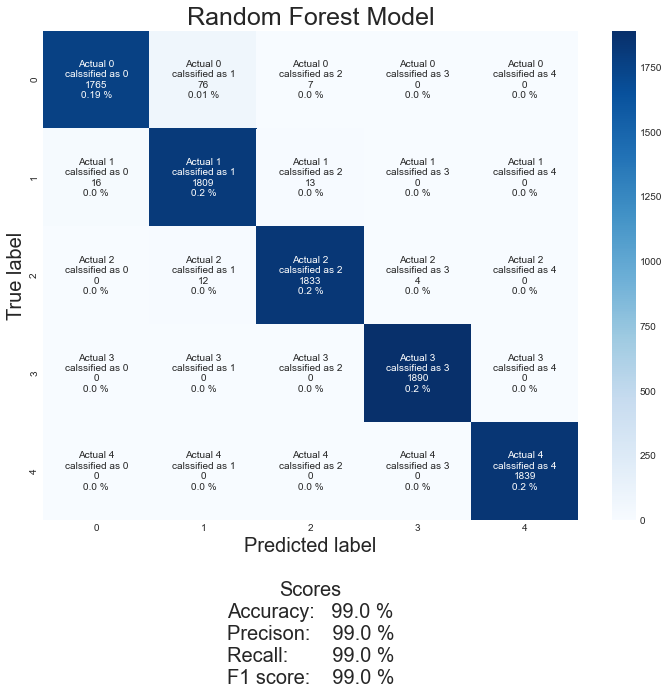

Area under the curve:  0.9913407799449722
when Random state =  7
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.75228026e+01
  2.90000000e+00 5.50000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.15738427e+01
  4.00000000e+00 1.07975000e+05]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.63622593e+01
  2.05380000e+00 1.90000000e+01]
 [0.00000000e+00 0.00

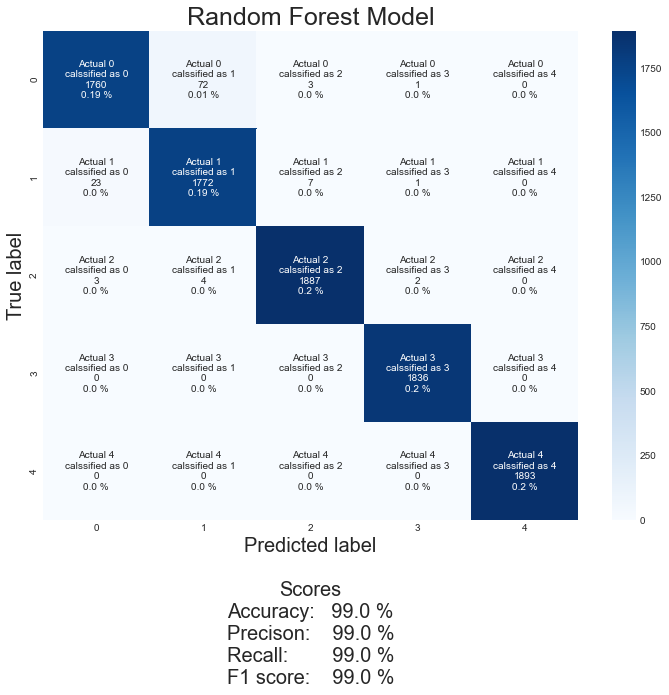

Area under the curve:  0.9921082968036437
when Random state =  26
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.15640493e+01
  3.85900000e+00 2.07034000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  1.80745977e+00 2.12100000e+03]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.70999201e+01
  1.80745977e+00 1.50000000e+01]
 [0.00000000e+00 0.00

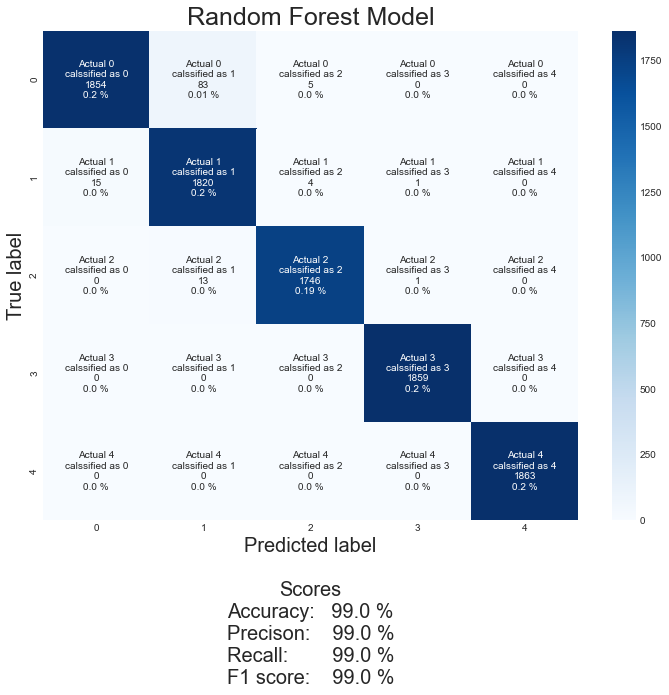

Area under the curve:  0.9919412676964351
when Random state =  26
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.51413508e+01
  1.80745977e+00 2.86000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.09352751e+01
  3.57190000e+00 2.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.23666369e+01
  3.10000000e+00 4.20000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.97427516e+01
  2.95100000e+00 9.41480000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67514192e+01
  3.38970000e+00 3.08300000e+03]
 [0.00000000e+00 0.00

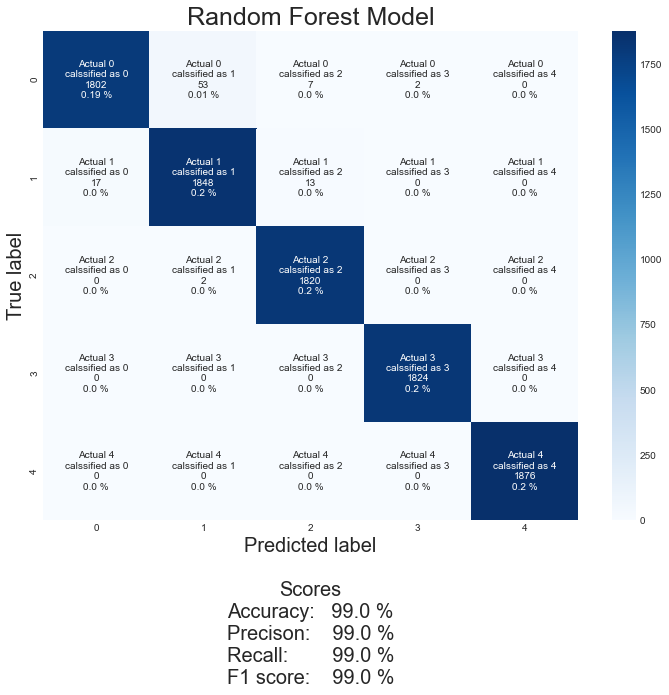

Area under the curve:  0.9936965977133487
when Random state =  26
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  27.84774971   3.483
  129.        ]
 [  0.           0.           0.         ...  44.37674828   3.91
  363.        ]
 ...
 [  0.           0.           0.         ...  42.18519586   3.8608
   66.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  41.08521946   3.9
   27.        ]] 

X_train  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   42.30401227
     4.2         164.        ]
 [   0.            0.            0.         ...   1

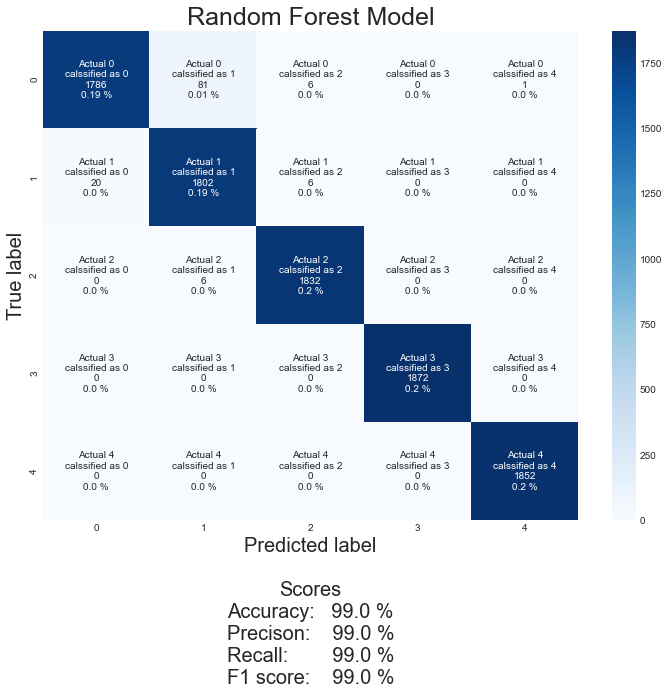

Area under the curve:  0.9919396950703405
when Random state =  26
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99480999e+01
  4.00000000e+00 1.03037000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.66216192e+01
  4.93160000e+00 1.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.94163238e+01
  3.45220000e+00 5.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.0

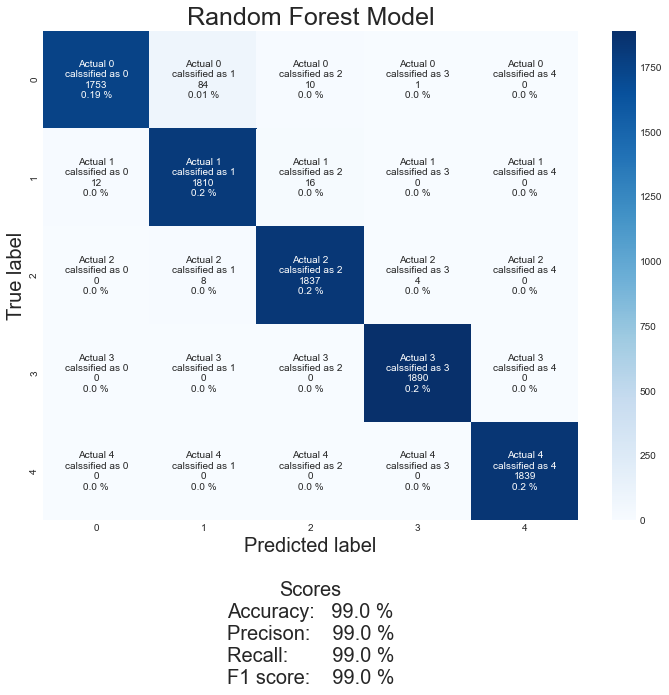

Area under the curve:  0.9908677638251444
when Random state =  26
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.26273265e+01
  1.41330000e+00 4.41000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.68020286e+01
  3.82410000e+00 2.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.30166253e+01
  1.80745977e+00 8.95790000e+04]
 [0.00000000e+00 0.0

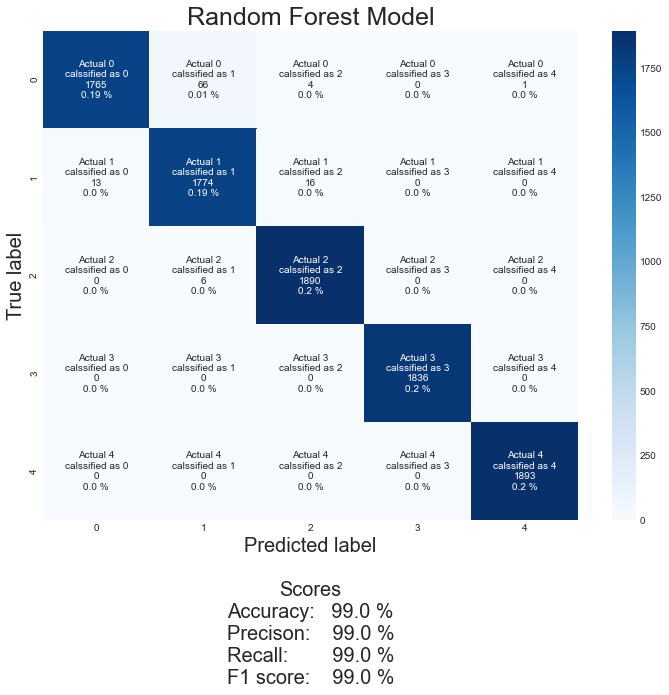

Area under the curve:  0.9927829691940795
when Random state =  14
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05375380e+01
  2.30000000e+00 1.25582508e+04]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.87633625e+01
  2.90000000e+00 5.70000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.  

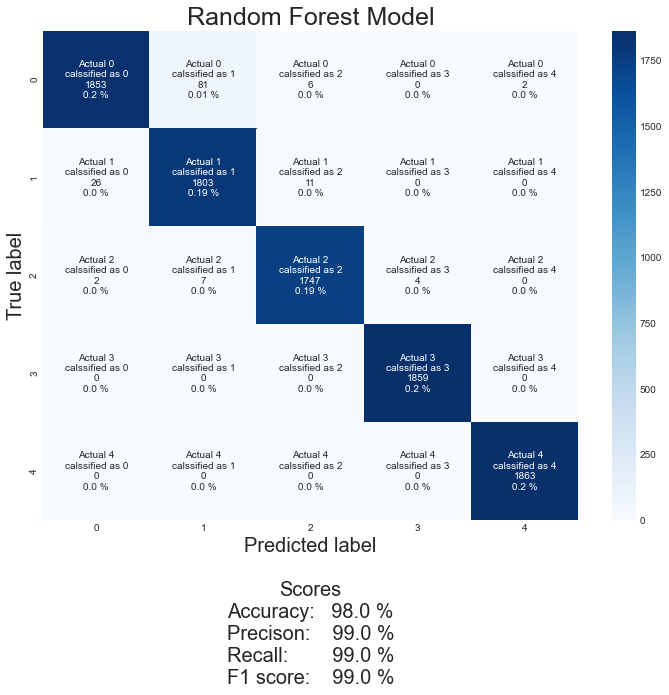

Area under the curve:  0.990792249070146
when Random state =  14
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[  0.           0.           0.         ...  16.46877181   1.80745977
    5.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...  20.00539568   2.
  143.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.70999201e+01
  1.80745977e+00 1.50000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0

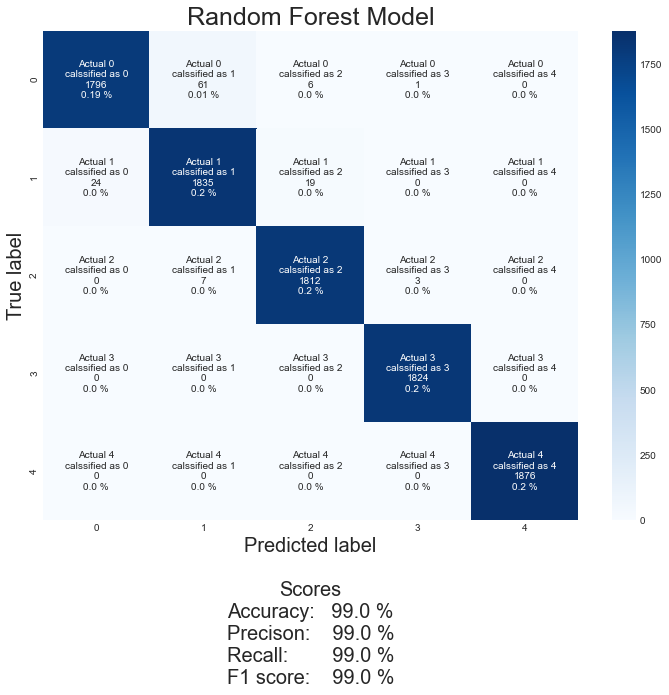

Area under the curve:  0.9918787343725753
when Random state =  14
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.78477497e+01
  3.48300000e+00 1.29000000e+02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  5.92900000e+00 1.89590000e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.78228891e+01
  3.20000000e+00 2.70000000e+01]] 

X_train  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.        

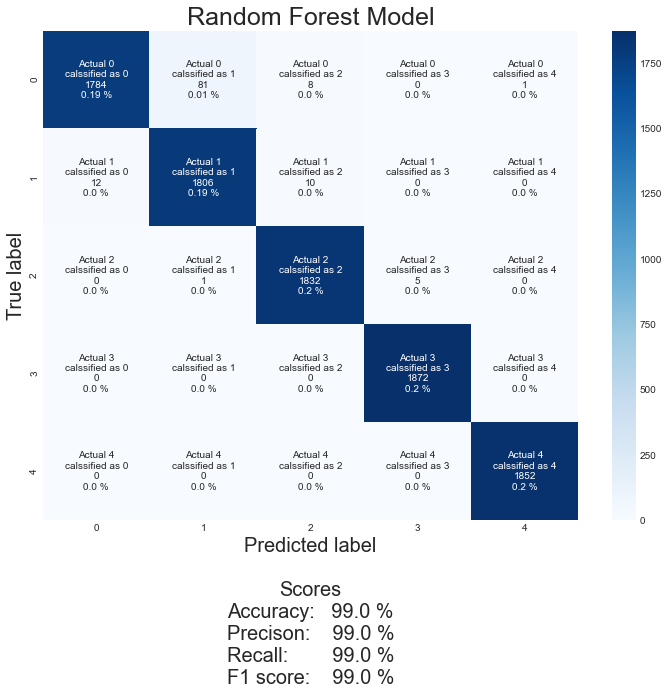

Area under the curve:  0.9920788468231916
when Random state =  14
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.86251471e+01
  2.20000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.50143332e+01
  3.51580000e+00 1.24200000e+03]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.0

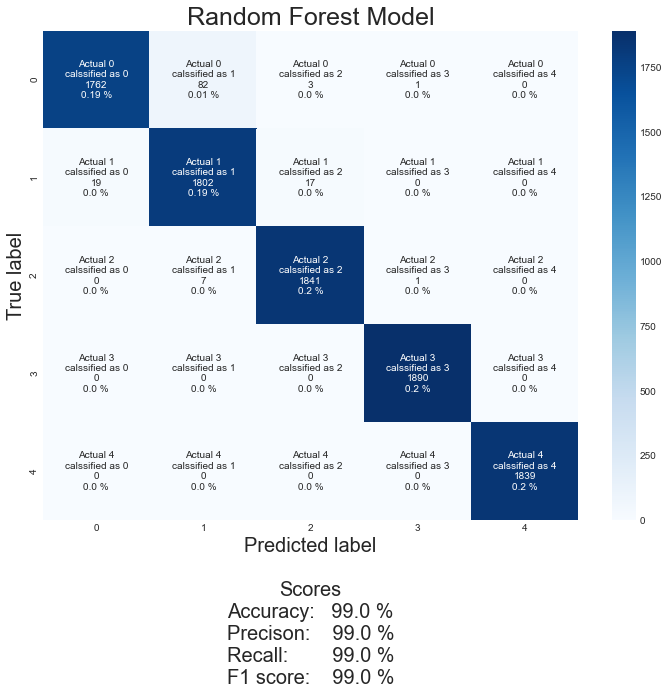

Area under the curve:  0.9912034628875048
when Random state =  14
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 2.58559446e+01
  3.29630000e+00 3.90000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.60806628e+01
  1.80745977e+00 8.42280000e+04]
 [0.00000000e+00 0.0

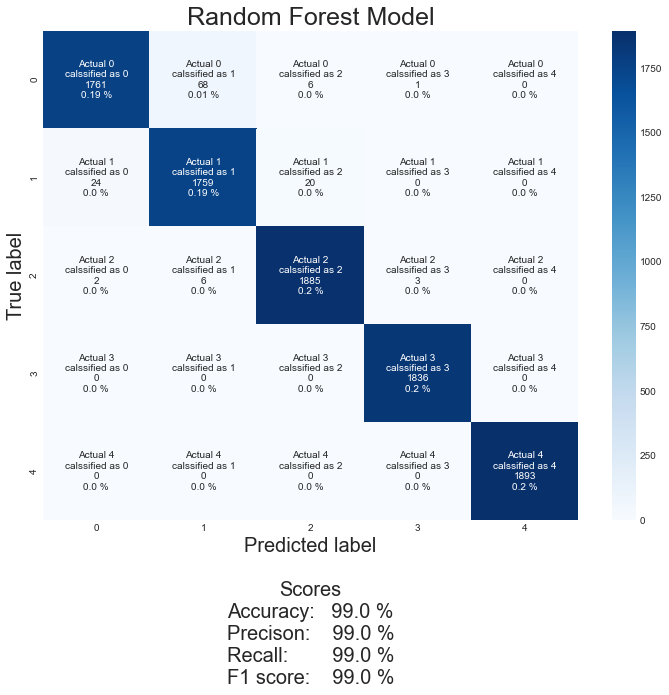

Area under the curve:  0.9911459080733136
when Random state =  66
when Random state2 =  1
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[ 0.          0.          0.         ... 49.32403627  1.80745977
  92.        ]
 [ 0.          0.          0.         ... 46.03611986  3.378
  66.        ]
 [ 0.          0.          1.         ... 24.34824044  1.80745977
  43.        ]
 ...
 [ 0.          0.          1.         ... 24.49758097  1.80745977
  63.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.91296595e+01
  2.03840000e+00 9.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 

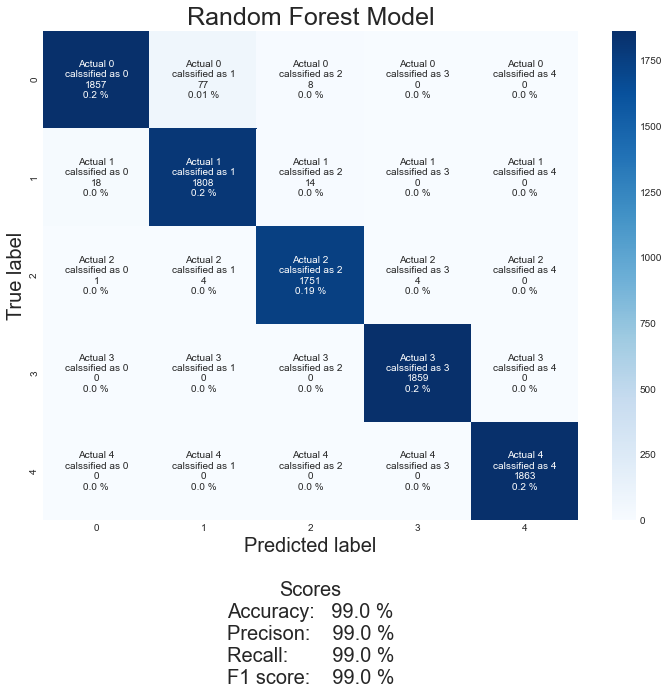

Area under the curve:  0.9916748324253216
when Random state =  66
when Random state2 =  7
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.99480999e+01
  4.00000000e+00 1.03037000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.75687395e+01
  2.40000000e+00 6.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.43767483e+01
  3.91000000e+00 3.63000000e+02]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  1.80745977e+00 2.21500000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.76422979e+01
  1.80745977e+00 2.67160000e+04]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00

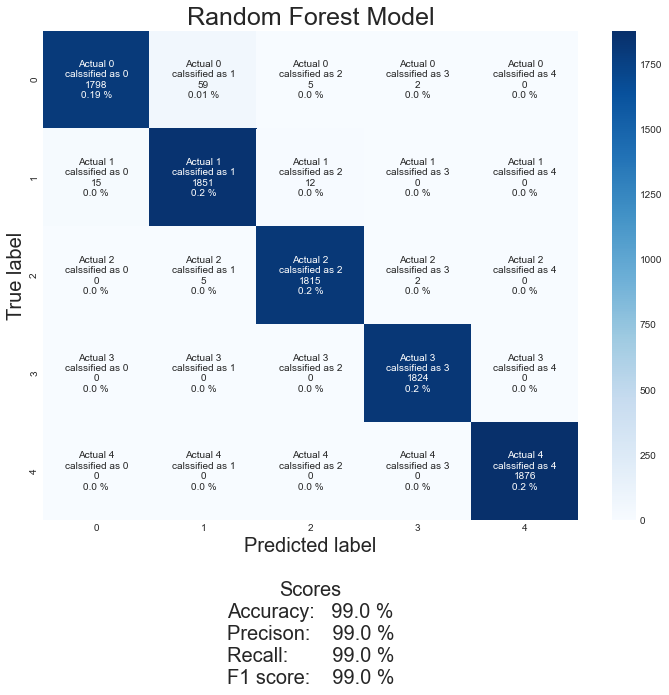

Area under the curve:  0.993285931035438
when Random state =  66
when Random state2 =  26
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   27.84774971
     3.483       129.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...    0.
     0.            0.        ]
 [   0.            0.            0.         ...   45.01433323
     3.5158     1242.        ]
 [   0.            0.            0.         ...    0.
     0.            0.        ]] 

X_train  [[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...  42.30401227   4.2
  164.        ]
 [  0.           0.          

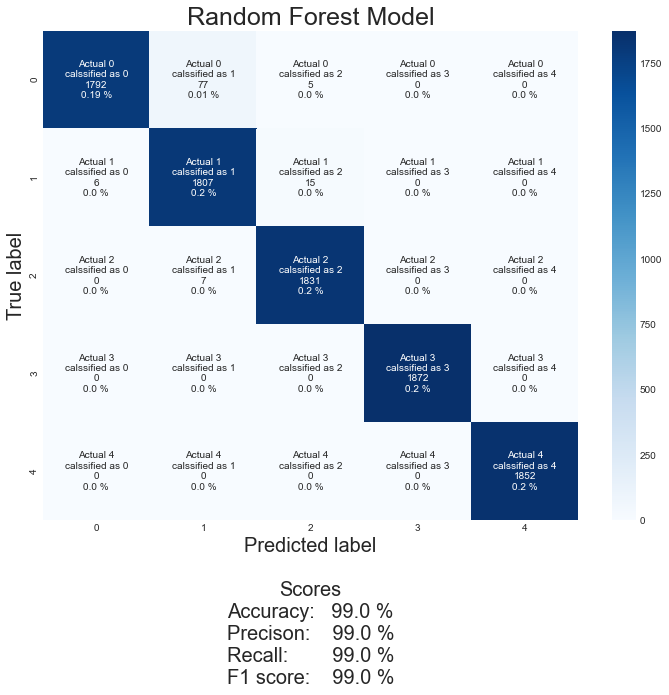

Area under the curve:  0.99261453334372
when Random state =  66
when Random state2 =  14
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  1.80745977e+00 2.65300000e+03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.50606832e+01
  2.05520000e+00 3.49307000e+05]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.80111276e+01
  1.80745977e+00 1.60000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.53714512e+01
  1.80745977e+00 9.00000000e+01]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.000

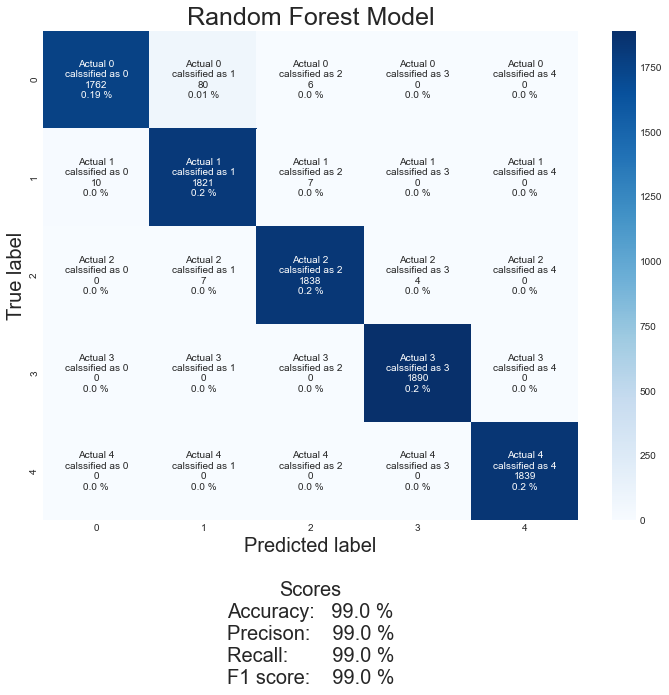

Area under the curve:  0.992290517878439
when Random state =  66
when Random state2 =  66
Original dataset shape Counter({0: 9264, 1: 2850, 2: 2177, 3: 678, 4: 141})
Resampled dataset shape Counter({3: 9264, 2: 9264, 1: 9264, 0: 9264, 4: 9264})
Before scaling:
X_test  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.14137695e+01
  3.63950000e+00 1.00000000e+01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.11310266e+01
  2.20000000e+00 1.25582508e+04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.19424059e+01
  3.40130000e+00 1.00000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.96165586e+01
  4.09600000e+00 1.73723000e+05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.73772390e+01
  2.39840000e+00 1.11948000e+05]] 

X_train  [[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.53154697e+01
  1.80745977e+00 1.30000000e+01]
 [0.00000000e+00 0.00

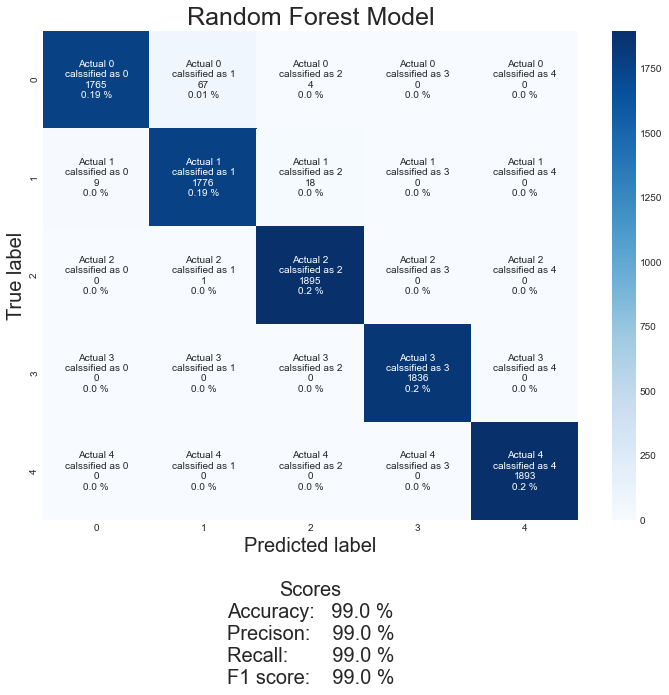

Area under the curve:  0.993251493192799


Cross Valadation Results
Accuracy: 94.54 %
Standard Deviation: 1.05 %


Area_under_the_curve  0.993251493192799
Standard Deviation :  0.0


Train Accuracy  100.0 %
Standard Deviation:  0.0 %

Test Accuracy  98.96 %
Standard Deviation:  0.19595917942265423 %

precision  99.0 %
Standard Deviation:  0.0 %

recall  99.0 %
Standard Deviation:  0.0 %

f1_score  99.0 %
Standard Deviation:  0.0 %


In [163]:
model_evaluation(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random'),"Decision Tree")  # function with argumnts given

In [174]:
crossvalscore(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random'), X_over, y_over, 10)  # Performs cross validation.

Accuracy: 94.70 %
Standard Deviation: 1.04 %


'Accuracy: 94.70 %'

# Results and Evaluation

In [9]:
model_name = ["KNN","Decision Tree", "Random Forest"]  # a list of models used.
Sampling = ["Over Sampled", "Over Sampled", "Over Sampled"]  # a list of sampling techniwues used.
scalars = ["MInMax Scalar", "MinMax Scalar", "MinMax Scalar"]  # a list of types of scaling techniques used.

mean_train_accuracy = [100.0,100.0,100.0]  # a list of model train accuracy
train_standard_deaviation = [0.0,0.0,0.0]  # a list of model train standard deveation.

mean_test_accuracy = [99.0, 98.96,99.0]  # a list of model test accuracy
test_standard_deaviation  = [0.0,0.19595917942265423,0.0]  # a list of model test standard deveation.

mean_precision = [99.0,99.0,99.0]  # a list of model precision score
precision_standard_deaviation  = [0.0,0.0,0.0]  # a list of model precision standard deveation.

mean_recall = [99.0,99.0,99.0]  # a list of model recall score
recall_standard_deaviation  = [0.0,0.0,0.0]  # a list of model recall standard deveation.

mean_f1_score = [99.0,99.0,99.0]  # a list of model f1 score
f1_score_standard_deaviation  = [0.0,0.0,0.0]  # a list of model f1 score standard deveation.

mean_Area_under_curve = [0.9925699687245763,0.993251493192799,0.9996135616416033]  # a list of model area under curve score
Area_under_curve_standard_deaviation  = [0.0,0.0,0.0]  # a list of model area under curve standard deveation. 

In [10]:
Evaluation = pd.DataFrame({
    'Model':model_name,
    'Sampling': Sampling,
    'scalar type':scalars,
    'Mean Train Accuracy':mean_train_accuracy,
    'Train Standard Deaviation':train_standard_deaviation ,
    'Mean Test Accuracy': mean_test_accuracy,
    'Test Standard Deaviation': test_standard_deaviation ,
    'Mean Precision':mean_precision,
    'Precision Standard Deaviation':precision_standard_deaviation ,
    'Mean Recall':mean_recall, 
    'Recall Standard Deaviation':recall_standard_deaviation , 
    'Mean f1 score':mean_f1_score,
    'f1 score Standard Deaviation':f1_score_standard_deaviation ,
    'Mean Area under curve':mean_Area_under_curve, 
    'Area under curve Standard Deaviation':Area_under_curve_standard_deaviation 
})   # using lists to make a dataframe

In [11]:
Evaluation   # viewing dataframe information

Model      Sampling    scalar type  Mean Train Accuracy  \
0            KNN  Over Sampled  MInMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
2  Random Forest  Over Sampled  MinMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
0                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
2                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
0            99.0                            0.0         99.0   
1            99.0                            0.0         99.0   
2            99.0                            0.0         99.0   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
0                         0.0           99.0                           0.0   
1                         0.0           99.0                           0.0   
2                         0.0           99.0                           0.0   

   Mean Area under curve  Area under curve Standard Deaviation  
0               0.992570                                   0.0  
1               0.993251                                   0.0  
2               0.999614                                   0.0

In [13]:
Evaluation.sort_values(by='Mean f1 score', ascending=False)  # viewing dataframe information by f1 score in decending order.

Model      Sampling    scalar type  Mean Train Accuracy  \
0            KNN  Over Sampled  MInMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
2  Random Forest  Over Sampled  MinMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
0                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
2                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
0            99.0                            0.0         99.0   
1            99.0                            0.0         99.0   
2            99.0                            0.0         99.0   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
0                         0.0           99.0                           0.0   
1                         0.0           99.0                           0.0   
2                         0.0           99.0                           0.0   

   Mean Area under curve  Area under curve Standard Deaviation  
0               0.992570                                   0.0  
1               0.993251                                   0.0  
2               0.999614                                   0.0

In [14]:
Evaluation.sort_values(by='Mean Recall', ascending=False)  # viewing dataframe information by recall in decending order.

Model      Sampling    scalar type  Mean Train Accuracy  \
0            KNN  Over Sampled  MInMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
2  Random Forest  Over Sampled  MinMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
0                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
2                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
0            99.0                            0.0         99.0   
1            99.0                            0.0         99.0   
2            99.0                            0.0         99.0   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
0                         0.0           99.0                           0.0   
1                         0.0           99.0                           0.0   
2                         0.0           99.0                           0.0   

   Mean Area under curve  Area under curve Standard Deaviation  
0               0.992570                                   0.0  
1               0.993251                                   0.0  
2               0.999614                                   0.0

In [15]:
Evaluation.sort_values(by='Mean Area under curve', ascending=False)  # viewing dataframe information by area under the curve
                                                                    # in decending order.

Model      Sampling    scalar type  Mean Train Accuracy  \
2  Random Forest  Over Sampled  MinMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
0            KNN  Over Sampled  MInMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
2                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
0                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
2            99.0                            0.0         99.0   
1            99.0                            0.0         99.0   
0            99.0                            0.0         99.0   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
2                         0.0           99.0                           0.0   
1                         0.0           99.0                           0.0   
0                         0.0           99.0                           0.0   

   Mean Area under curve  Area under curve Standard Deaviation  
2               0.999614                                   0.0  
1               0.993251                                   0.0  
0               0.992570                                   0.0

In [71]:
def plot_bar_graph(list_for_plot, list_for_plot2,Accuracy_type, colour):  # funstion with given parameters.
    
    """
    The function plot_bar_graph plots a bar graph.
    
    The first parameter list_for_plot is the x axis.
    
    The second parameter list_for_plot2 is the y axis.
    
    The third parameter Accuracy_type takes a string. 
    for example "F1 score"
    
    The fourth parameter colour is the color for the bar plot.
    
    """
    
    
    plt.figure()  # plots figure
    plt.title("Model Evaluation",fontsize=18)  # Displays plot title
    plt.bar(list_for_plot, list_for_plot2, color = colour)  # Displays description of the plots x and y labels.
    plt.xlabel("Models")  # Displays the x axis for the plot
    plt.ylabel(Accuracy_type)  # Displays the y axis for the plot.
    plt.grid()  # adds a gird to the plot

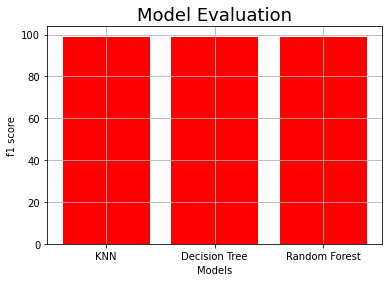

In [16]:
plot_bar_graph(model_name, mean_f1_score, "f1 score", "red")  # functions argents given. plots output using given data.

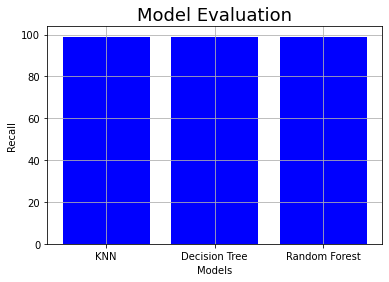

In [17]:
plot_bar_graph(model_name, mean_recall, "Recall", "blue")  # functions argents given. plots output using given data.

In [21]:
def plot_graph(list_for_plot, list_for_plot2,Accuracy_type, colour):  # funstion with given parameters.
    
    """
    The function plot_graph plots a lineargraph.
    
    The first parameter list_for_plot is the x axis.
    
    The second parameter list_for_plot2 is the y axis.
    
    The third parameter Accuracy_type takes a string. 
    for example "F1 score"
    
    The fourth parameter colour is the color for the bar plot.
    
    """
    
    
    plt.figure()  # plots figure
    plt.title("Model Evaluation",fontsize=18)  # Displays plot title
    plt.plot(list_for_plot, list_for_plot2, color = colour)  # Displays description of the plots x and y labels.
    plt.xlabel("Models")  # Displays the x axis for the plot
    plt.ylabel(Accuracy_type)  # Displays the y axis for the plot.
    plt.grid()  # adds a gird to the plot

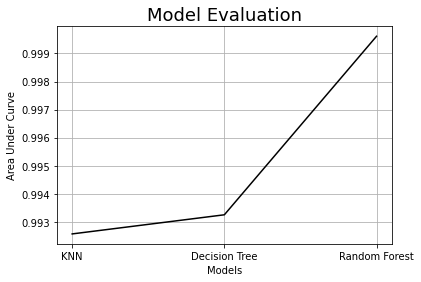

In [22]:
plot_graph(model_name, mean_Area_under_curve, "Area Under Curve", "black")  # functions argents given. plots output
                                                                           # using given data.

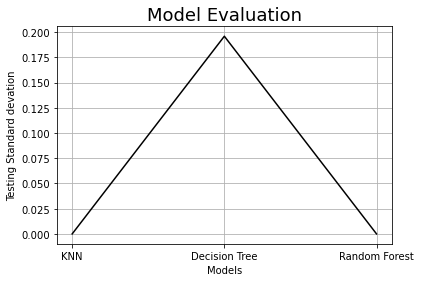

In [24]:
plot_graph(model_name, test_standard_deaviation, "Testing Standard devation", "black")  # functions argents given. plots
                                                                                # output using given data.

## k-fold cross-validation

In [67]:
def crossvalscore(model, X, y, cv_val):  # function to perform cross validation with model X, y and cv_val as parameters
    """
    The crossvalscore function finds the avarage cross validation accuracy, precison, recall, f1 score, and area uner the curve
    of a model and its standard deveation.
    
    The first parameter model is the type of model to perform the cross validation on.
    
    The second parameter X is the features.
    
    The third parameter y is the labels.
    
    the foruth parameter cv_val is the number of times to cross validate the given model.
    
    The crossvalscore function returns the cross validation accuracy, precison, recall, f1 scoer, and area uner the curve
    
    """
    
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc_ovr']  # a list with values given.
    results = []  # a empty list
    results_std = []
    for i in range(len(scoring)):  # looping to the leghth of the variable scoring
        print("score metric = ", scoring[i])  # printing output
        score = cross_val_score(estimator = model, X = X, y = y,scoring=scoring[i], cv = cv_val)   # performs different tests to get best accurecy.
        print("Score : ",score.mean())  # accuracy printed.
        print("Standard Deviation", score.std())  # standard deveation printed (std -avarage or std+ avarage )
        results.append(score.mean())
        results_std.append(score.std())
        print("\n")
    
    
    
    return results[0], results_std[0], results[1],results_std[1] ,results[2],results_std[2],\
                                        results[3],results_std[3], results[4], results_std[4]

In [68]:
DT_accuracy,DT_accuracy_std, DT_precision, DT_precision_std, DT_recall,DT_recall_std, DT_f1, DT_f1_std, DT_auc, DT_auc_std = crossvalscore(DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2,\
               max_leaf_nodes = None, min_weight_fraction_leaf = 0.0,criterion = 'entropy', max_features = None, \
               max_depth =  121, splitter = 'random'), X_over, y_over, 10)  # Performs cross validation.

score metric =  accuracy
Score :  0.9445164075993093
Standard Deviation 0.011156702990591216


score metric =  precision_macro
Score :  0.9548866523463504
Standard Deviation 0.006079832971321917


score metric =  recall_macro
Score :  0.9443266674588363
Standard Deviation 0.012427054777940608


score metric =  f1_macro
Score :  0.9433863816083996
Standard Deviation 0.010062000231837703


score metric =  roc_auc_ovr
Score :  0.9667808930311477
Standard Deviation 0.005086642832633834




In [69]:
RF_accuracy,RF_accuracy_std, RF_precision, RF_precision_std, RF_recall,RF_recall_std, RF_f1, RF_f1_std, RF_auc, RF_auc_std =  crossvalscore(RandomForestClassifier(n_estimators =90,min_samples_split = 2, min_samples_leaf = 1,\
                    max_depth = 50,bootstrap = False, max_features = 'sqrt', criterion = 'entropy'), X_over, y_over, 10) 
# Performs cross validation.

score metric =  accuracy
Score :  0.9558290155440415
Standard Deviation 0.010743923088504165


score metric =  precision_macro
Score :  0.9607157708587787
Standard Deviation 0.008657172065862166


score metric =  recall_macro
Score :  0.9549462606098308
Standard Deviation 0.01036601071062272


score metric =  f1_macro
Score :  0.9530960518633872
Standard Deviation 0.011777138711260885


score metric =  roc_auc_ovr
Score :  0.9984757558032145
Standard Deviation 0.0010646064258473082




In [70]:
KNN_accuracy,KNN_accuracy_std, KNN_precision, KNN_precision_std, KNN_recall,KNN_recall_std, KNN_f1, KNN_f1_std, KNN_auc, KNN_auc_std = crossvalscore(KNeighborsClassifier(n_neighbors = 15, weights ='distance'), X_over, y_over, 10)  # Performs cross validation.

score metric =  accuracy
Score :  0.8022020725388602
Standard Deviation 0.013974170003390386


score metric =  precision_macro
Score :  0.8024962297232312
Standard Deviation 0.04394029513285703


score metric =  recall_macro
Score :  0.8022035130393453
Standard Deviation 0.013965698611254176


score metric =  f1_macro
Score :  0.7409935137618602
Standard Deviation 0.01810851547273508


score metric =  roc_auc_ovr
Score :  0.9207138918744917
Standard Deviation 0.013821685895389717




In [72]:
model_name = ["KNN","Decision Tree", "Random Forest"]  # a list of models used.
Sampling = ["Over Sampled", "Over Sampled", "Over Sampled"]  # a list of sampling techniwues used.
scalars = ["MInMax Scalar", "MinMax Scalar", "MinMax Scalar"]  # a list of types of scaling techniques used.

mean_accuracy = [KNN_accuracy,DT_accuracy,RF_accuracy]  # a list of model train accuracy
standard_deaviation = [KNN_accuracy_std,DT_accuracy_std,RF_accuracy_std]  # a list of model train standard deveation.

mean_precision = [KNN_precision,DT_precision,RF_precision]  # a list of model precision score
precision_standard_deaviation  = [KNN_precision_std,DT_precision_std,RF_precision_std]  # a list of model precision standard deveation.

mean_recall = [KNN_recall,DT_recall,RF_recall]  # a list of model recall score
recall_standard_deaviation  = [KNN_recall_std,DT_recall_std,RF_recall_std]  # a list of model recall standard deveation.

mean_f1_score = [KNN_f1,DT_f1,RF_f1]  # a list of model f1 score
f1_score_standard_deaviation  = [KNN_f1_std,DT_f1_std,RF_f1_std]  # a list of model f1 score standard deveation.

mean_Area_under_curve = [KNN_auc,DT_auc,RF_auc]  # a list of model area under curve score
Area_under_curve_standard_deaviation  = [KNN_auc_std,DT_auc_std,RF_auc_std]  # a list of model area under curve standard deveation. 

In [73]:
Evaluation = pd.DataFrame({
    'Model':model_name,
    'Sampling': Sampling,
    'scalar type':scalars,
    'Mean Train Accuracy':mean_train_accuracy,
    'Train Standard Deaviation':train_standard_deaviation ,
    'Mean Test Accuracy': mean_test_accuracy,
    'Test Standard Deaviation': test_standard_deaviation ,
    'Mean Precision':mean_precision,
    'Precision Standard Deaviation':precision_standard_deaviation ,
    'Mean Recall':mean_recall, 
    'Recall Standard Deaviation':recall_standard_deaviation , 
    'Mean f1 score':mean_f1_score,
    'f1 score Standard Deaviation':f1_score_standard_deaviation ,
    'Mean Area under curve':mean_Area_under_curve, 
    'Area under curve Standard Deaviation':Area_under_curve_standard_deaviation 
})   # using lists to make a dataframe

In [74]:
Evaluation   # viewing dataframe information

Model      Sampling    scalar type  Mean Train Accuracy  \
0            KNN  Over Sampled  MInMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
2  Random Forest  Over Sampled  MinMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
0                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
2                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
0        0.802496                       0.043940     0.802204   
1        0.954887                       0.006080     0.944327   
2        0.960716                       0.008657     0.954946   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
0                    0.013966       0.740994                      0.018109   
1                    0.012427       0.943386                      0.010062   
2                    0.010366       0.953096                      0.011777   

   Mean Area under curve  Area under curve Standard Deaviation  
0               0.920714                              0.013822  
1               0.966781                              0.005087  
2               0.998476                              0.001065

In [75]:
Evaluation.sort_values(by='Mean f1 score', ascending=False)  # viewing dataframe information by f1 score in decending order.

Model      Sampling    scalar type  Mean Train Accuracy  \
2  Random Forest  Over Sampled  MinMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
0            KNN  Over Sampled  MInMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
2                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
0                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
2        0.960716                       0.008657     0.954946   
1        0.954887                       0.006080     0.944327   
0        0.802496                       0.043940     0.802204   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
2                    0.010366       0.953096                      0.011777   
1                    0.012427       0.943386                      0.010062   
0                    0.013966       0.740994                      0.018109   

   Mean Area under curve  Area under curve Standard Deaviation  
2               0.998476                              0.001065  
1               0.966781                              0.005087  
0               0.920714                              0.013822

In [76]:
Evaluation.sort_values(by='Mean Recall', ascending=False)  # viewing dataframe information by recall in decending order.

Model      Sampling    scalar type  Mean Train Accuracy  \
2  Random Forest  Over Sampled  MinMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
0            KNN  Over Sampled  MInMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
2                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
0                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
2        0.960716                       0.008657     0.954946   
1        0.954887                       0.006080     0.944327   
0        0.802496                       0.043940     0.802204   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
2                    0.010366       0.953096                      0.011777   
1                    0.012427       0.943386                      0.010062   
0                    0.013966       0.740994                      0.018109   

   Mean Area under curve  Area under curve Standard Deaviation  
2               0.998476                              0.001065  
1               0.966781                              0.005087  
0               0.920714                              0.013822

In [77]:
Evaluation.sort_values(by='Mean Area under curve', ascending=False)  # viewing dataframe information by area under the curve
                                                                    # in decending order.

Model      Sampling    scalar type  Mean Train Accuracy  \
2  Random Forest  Over Sampled  MinMax Scalar                100.0   
1  Decision Tree  Over Sampled  MinMax Scalar                100.0   
0            KNN  Over Sampled  MInMax Scalar                100.0   

   Train Standard Deaviation  Mean Test Accuracy  Test Standard Deaviation  \
2                        0.0               99.00                  0.000000   
1                        0.0               98.96                  0.195959   
0                        0.0               99.00                  0.000000   

   Mean Precision  Precision Standard Deaviation  Mean Recall  \
2        0.960716                       0.008657     0.954946   
1        0.954887                       0.006080     0.944327   
0        0.802496                       0.043940     0.802204   

   Recall Standard Deaviation  Mean f1 score  f1 score Standard Deaviation  \
2                    0.010366       0.953096                      0.011777   
1                    0.012427       0.943386                      0.010062   
0                    0.013966       0.740994                      0.018109   

   Mean Area under curve  Area under curve Standard Deaviation  
2               0.998476                              0.001065  
1               0.966781                              0.005087  
0               0.920714                              0.013822

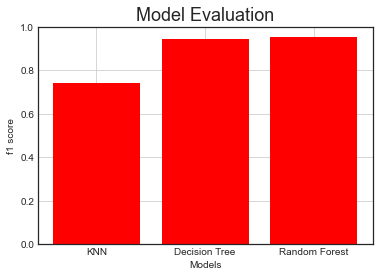

In [78]:
plot_bar_graph(model_name, mean_f1_score, "f1 score", "red")  # functions argents given. plots output using given data.

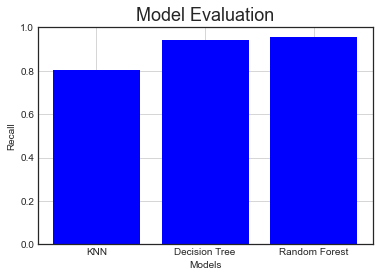

In [79]:
plot_bar_graph(model_name, mean_recall, "Recall", "blue")  # functions argents given. plots output using given data.

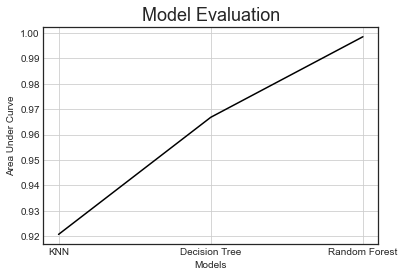

In [82]:
plot_graph(model_name, mean_Area_under_curve, "Area Under Curve", "black")  # functions argents given. plots output
                                                                           # using given data.

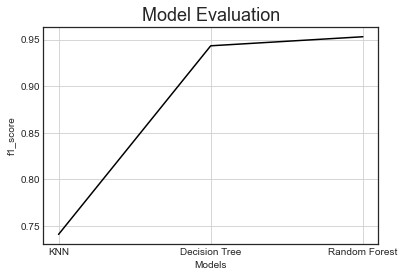

In [83]:
plot_graph(model_name, mean_f1_score, "f1_score", "black")  # functions argents given. plots output using given data.

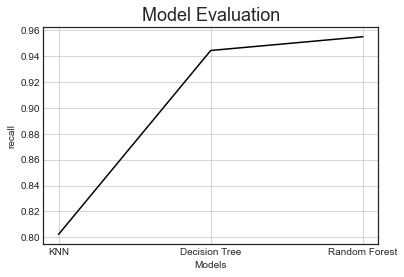

In [84]:
plot_graph(model_name, mean_recall, "recall", "black")  # functions argents given. plots output using given data.